# Exploration of Student Dropout and Academic Success data



In [ ]:
# chats:

# https://chatgpt.com/c/67acbcf6-4894-800a-8c43-a6bc23d40211
# https://chatgpt.com/c/67abc06a-86f8-800a-8a57-6343f068dfbb

## 1) Import python libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import scipy.stats as st
import IPython.display as disp

## 2) Define Utility Functions

In [ ]:
# Function to display the value counts of 'columns' in an HTML table
# 'limit' will limit the number of rows in the table
def show_value_counts_in_table(data, columns, limit=10):
    # create a data frame for the report
    value_counts_table = pd.DataFrame()
    
    # go through each column appending the counted data to the value counts table
    for col in columns:    
        counts = data[col].value_counts().reset_index()
        counts.columns = [col, 'Count']
        value_counts_table = pd.concat([value_counts_table, counts], axis=1)

    # Limit the table to 'limit' rows and blank out cells for columns with less than 'limit' unique items
    value_counts_table = value_counts_table.head(limit)
    value_counts_table = value_counts_table.fillna("")

    # Display the table in a scrollable grid
    disp.display(disp.HTML(value_counts_table.to_html()))

In [ ]:
# Function to display the relative percentage of the value counts in each column
# results will be displayed in an HTML table
# 'columns' defines which columns in 'data' to display
# 'limit' will limit the number of rows in the table
def show_value_percent_in_table(data, columns, limit=10):
    # create a data frame for the report
    value_percs_table = pd.DataFrame()
    
    # go through each column appending the counted data to the value counts table
    for col in columns:    
        percs = data[col].value_counts(normalize=True).reset_index()
        percs.columns = [col, '%']
        percs['%'] = (percs['%'] * 100).round(2)  # Convert result to a percentage to two decimal places
        value_percs_table = pd.concat([value_percs_table, percs], axis=1)

    # Limit the table to 'limit' rows and blank out cells for columns with less than 'limit' unique items
    value_percs_table = value_percs_table.head(limit)
    value_percs_table = value_percs_table.fillna("")

    # Display the table in a scrollable grid
    disp.display(disp.HTML(value_percs_table.to_html()))

In [ ]:
# define a function to display a dataframe in a html table
def show_data_in_table( data ):

    # make a copy of the data so that a row number can be inserted
    dataCopy = pd.DataFrame(data)

    # Add a row number column
    dataCopy.insert(0, "Row", range(1, len(dataCopy) + 1)) 

    # Convert DataFrame to HTML with a styled scrolling table
    html = dataCopy.to_html(classes="table table-striped", index=False)

    # Custom CSS for scrolling with sticky header and row numbers
    css = """
    <style>
        .dataframe {
            display: block;
            overflow-x: auto;
            max-height: 300px;
            border-collapse: collapse;
            width: 100%;
        }
        .dataframe th {
            position: sticky;
            top: 0;
            background-color: #f8f9fa;
            z-index: 2;
        }
        .dataframe td:first-child, .dataframe th:first-child {
        position: sticky;
        left: 0;
        background-color: #ffffff;
        z-index: 1;
    }
    </style>
    """

    # Display in Jupyter Notebook
    disp.display(disp.HTML(css + html))

## 3) Data Preparation

#### Importing the data

In [12]:
import pandas as pd

In [13]:
# Import the data, handling the semi-colon value separator
data = pd.read_csv('students_dropout_and_academic_success.csv', sep=';')

#### Improve column naming

In [ ]:
# - correct spelling mistake
data.rename(columns={'Nacionality': 'Nationality'}, inplace=True)
# - make uppercase
data.columns = data.columns.str.upper()
# - replace spaces with underscores
data.columns = data.columns.str.replace(' ', '_')
# - remove brackets and use of 's 
data.columns = data.columns.str.replace('(', '')
data.columns = data.columns.str.replace(')', '')
data.columns = data.columns.str.replace("'S", '')
# - remove tab character
data.columns = data.columns.str.replace('\t', '')
# - remove leading or trailing spaces
data.columns = data.columns.str.strip()


print('Column names and data types')
print('---------------------------')
print(data.dtypes)

Column names and data types
---------------------------
MARITAL_STATUS                                    int64
APPLICATION_MODE                                  int64
APPLICATION_ORDER                                 int64
COURSE                                            int64
DAYTIME/EVENING_ATTENDANCE                        int64
PREVIOUS_QUALIFICATION                            int64
PREVIOUS_QUALIFICATION_GRADE                    float64
NATIONALITY                                       int64
MOTHER_QUALIFICATION                              int64
FATHER_QUALIFICATION                              int64
MOTHER_OCCUPATION                                 int64
FATHER_OCCUPATION                                 int64
ADMISSION_GRADE                                 float64
DISPLACED                                         int64
EDUCATIONAL_SPECIAL_NEEDS                         int64
DEBTOR                                            int64
TUITION_FEES_UP_TO_DATE                         

#### Build lists of column types: 'categorical_columns' and 'continuous_columns'

In [ ]:
categorical_columns = [
    'MARITAL_STATUS',
    'APPLICATION_MODE',
    'APPLICATION_ORDER',
    'COURSE',
    'DAYTIME/EVENING_ATTENDANCE',
    'PREVIOUS_QUALIFICATION',
    'NATIONALITY',
    'MOTHER_QUALIFICATION',
    'FATHER_QUALIFICATION',
    'MOTHER_OCCUPATION',
    'FATHER_OCCUPATION',
    'DISPLACED',
    'EDUCATIONAL_SPECIAL_NEEDS',
    'DEBTOR',
    'TUITION_FEES_UP_TO_DATE',
    'GENDER',
    'SCHOLARSHIP_HOLDER',
    'INTERNATIONAL',
    'TARGET'
]

continuous_columns = [    
    'PREVIOUS_QUALIFICATION_GRADE',
    'ADMISSION_GRADE',
    'AGE_AT_ENROLLMENT',
    'CURRICULAR_UNITS_1ST_SEM_CREDITED',
    'CURRICULAR_UNITS_1ST_SEM_ENROLLED',
    'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS',
    'CURRICULAR_UNITS_1ST_SEM_APPROVED',
    'CURRICULAR_UNITS_1ST_SEM_GRADE',
    'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS',
    'CURRICULAR_UNITS_2ND_SEM_CREDITED',
    'CURRICULAR_UNITS_2ND_SEM_ENROLLED',
    'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS',
    'CURRICULAR_UNITS_2ND_SEM_APPROVED',
    'CURRICULAR_UNITS_2ND_SEM_GRADE',
    'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS',
    'UNEMPLOYMENT_RATE',
    'INFLATION_RATE',
    'GDP'
]

#### Validate categorical data

##### Checking for NaN and listing unique values

In [ ]:
# Look for NaN values
print("NaN Counts by column")
print("--------------------")
nans = data[categorical_columns].isnull().sum()
print(nans)
print("\n\n")


NaN Counts by column
--------------------
MARITAL_STATUS                0
APPLICATION_MODE              0
APPLICATION_ORDER             0
COURSE                        0
DAYTIME/EVENING_ATTENDANCE    0
PREVIOUS_QUALIFICATION        0
NATIONALITY                   0
MOTHER_QUALIFICATION          0
FATHER_QUALIFICATION          0
MOTHER_OCCUPATION             0
FATHER_OCCUPATION             0
DISPLACED                     0
EDUCATIONAL_SPECIAL_NEEDS     0
DEBTOR                        0
TUITION_FEES_UP_TO_DATE       0
GENDER                        0
SCHOLARSHIP_HOLDER            0
INTERNATIONAL                 0
TARGET                        0
dtype: int64





In [ ]:

# Report on unique values
print("Unique values by column")
print("-----------------------")
for col in categorical_columns:
    print(f"Unique values and counts for '{col}':")
    print(data[col].value_counts())
    print("\n") 

Unique values by column
-----------------------
Unique values and counts for 'MARITAL_STATUS':
MARITAL_STATUS
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


Unique values and counts for 'APPLICATION_MODE':
APPLICATION_MODE
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64


Unique values and counts for 'APPLICATION_ORDER':
APPLICATION_ORDER
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64


Unique values and counts for 'COURSE':
COURSE
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64


Unique values and counts for 'DAYTIME/EVENING_ATTENDANCE

##### Validate that International has been set correctly

In [ ]:
# check that every student with NATIONALITY of Portuguese has a INTERNATIONAL value set to 'no'
portuguese_students = data[data['NATIONALITY'] == 'Portuguese']
all_local = portuguese_students['INTERNATIONAL'].eq('no').all()

if all_local:
    print("Data validated: All Portuguese students have 'no' in the INTERNATIONAL column.")
else:
    print("Data Quality error: Not all Portuguese students have 'no' in the INTERNATIONAL column.")

Data validated: All Portuguese students have 'no' in the INTERNATIONAL column.


#### Comments about the categorical data 
- No null/NaN data values found
- Although APPLICATION_ORDER was described as 0 for 'first choice', most of the rows have a value of 1, so 1 is likely to be the first choice.
  - Action: consider the '0' value an outlier and correct it to '1'


In [ ]:
# correct APPLICATION_ORDER outlier
data.loc[data['APPLICATION_ORDER'] == 0, 'APPLICATION_ORDER'] = 1
print(data['APPLICATION_ORDER'].value_counts()) 

APPLICATION_ORDER
1    3027
2     547
3     309
4     249
5     154
6     137
9       1
Name: count, dtype: int64


#### Validate continuous data

##### Check for NaN and infinite values

In [ ]:
# Look for NaN values
print("NaN Counts by column")
print("--------------------")
nans = data[continuous_columns].isnull().sum()
print(nans)
print("")

# Look for +/- infinity
inf_rows_count = data[continuous_columns].isin([np.inf, -np.inf]).any(axis=1).sum()
if (inf_rows_count==0):
    print("Data validated: No infinite values found.")
else:
    print("Data Quality error: Infinite values found in the data.")

NaN Counts by column
--------------------
PREVIOUS_QUALIFICATION_GRADE                    0
ADMISSION_GRADE                                 0
AGE_AT_ENROLLMENT                               0
CURRICULAR_UNITS_1ST_SEM_CREDITED               0
CURRICULAR_UNITS_1ST_SEM_ENROLLED               0
CURRICULAR_UNITS_1ST_SEM_EVALUATIONS            0
CURRICULAR_UNITS_1ST_SEM_APPROVED               0
CURRICULAR_UNITS_1ST_SEM_GRADE                  0
CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS    0
CURRICULAR_UNITS_2ND_SEM_CREDITED               0
CURRICULAR_UNITS_2ND_SEM_ENROLLED               0
CURRICULAR_UNITS_2ND_SEM_EVALUATIONS            0
CURRICULAR_UNITS_2ND_SEM_APPROVED               0
CURRICULAR_UNITS_2ND_SEM_GRADE                  0
CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS    0
UNEMPLOYMENT_RATE                               0
INFLATION_RATE                                  0
GDP                                             0
dtype: int64

Data validated: No infinite values found.


##### Check GRADE values for out of range issues

In [ ]:
# Check if all GRADE values fall in the range defined by the Dataset description
assert data['PREVIOUS_QUALIFICATION_GRADE'].between(0, 200).all(), "Data Error: PREVIOUS_QUALIFICATION_GRADE values are out of range."
assert data['ADMISSION_GRADE'].between(0, 200).all(), "Data Error: ADMISSION_GRADE values are out of range."
assert data['CURRICULAR_UNITS_1ST_SEM_GRADE'].between(0, 20).all(), "Data Error: CURRICULAR_UNITS_1ST_SEM_GRADE values are out of range."
assert data['CURRICULAR_UNITS_2ND_SEM_GRADE'].between(0, 20).all(), "Data Error: CURRICULAR_UNITS_2ND_SEM_GRADE values are out of range."

##### Validate the 1st and 2nd semester data

In [ ]:
# Investigate the 'enrolled' unit counts
# Check if any students with 0 enrolled units had evaluations or were approved or given grades
data_no_units_enrolled_sem1 = data[(data['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] == 0)]
data_no_units_enrolled_sem2 = data[(data['CURRICULAR_UNITS_2ND_SEM_ENROLLED'] == 0)]
data_enrolled_in_sem2_but_not_sem1 = data[(data['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] == 0) & (data['CURRICULAR_UNITS_2ND_SEM_ENROLLED'] > 0)]

data_no_units_enrolled_sem1_but_with_evaluation = data[(data['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] == 0) & 
    ( (data['CURRICULAR_UNITS_1ST_SEM_EVALUATIONS'] > 0) |
     (data['CURRICULAR_UNITS_1ST_SEM_APPROVED'] > 0) |
     (data['CURRICULAR_UNITS_1ST_SEM_GRADE'] > 0) |
     (data['CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS'] > 0))]

data_no_units_enrolled_sem2_but_with_evaluation = data[(data['CURRICULAR_UNITS_2ND_SEM_ENROLLED'] == 0) & 
    ( (data['CURRICULAR_UNITS_2ND_SEM_EVALUATIONS'] > 0) |
     (data['CURRICULAR_UNITS_2ND_SEM_APPROVED'] > 0) |
     (data['CURRICULAR_UNITS_2ND_SEM_GRADE'] > 0) |
     (data['CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS'] > 0))]

print(f"Students with no enrollment in 1st Semester: {len(data_no_units_enrolled_sem1)}")
print(f"Students with no enrollment in 2nd Semester: {len(data_no_units_enrolled_sem2)}")
print(f"Students with enrollment in 2nd Semester, but not 1st: {len(data_enrolled_in_sem2_but_not_sem1)}")

print(f"Students with no enrollment in 1st Semester, but with further evaluation or grading: {len(data_no_units_enrolled_sem1_but_with_evaluation)}")
print(f"Students with no enrollment in 2nd Semester, but with further evaluation or grading: {len(data_no_units_enrolled_sem2_but_with_evaluation)}")

# check the Target value counts for those students
data_no_units_enrolled_sem1['TARGET'].value_counts()

Students with no enrollment in 1st Semester: 180
Students with no enrollment in 2nd Semester: 180
Students with enrollment in 2nd Semester, but not 1st: 0
Students with no enrollment in 1st Semester, but with further evaluation or grading: 0
Students with no enrollment in 2nd Semester, but with further evaluation or grading: 0


TARGET
Dropout     77
Graduate    75
Enrolled    28
Name: count, dtype: int64

In [ ]:
from scipy.stats import pointbiserialr

# Calculate Point Biserial Correlation between 'ADMISSION_GRADE' and 'IS_DROPOUT'
correlation, p_value = pointbiserialr(data['ADMISSION_GRADE'], data['IS_DROPOUT'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

Point Biserial Correlation: -0.09588505982726485
P-value: 3.8717421746123003e-10


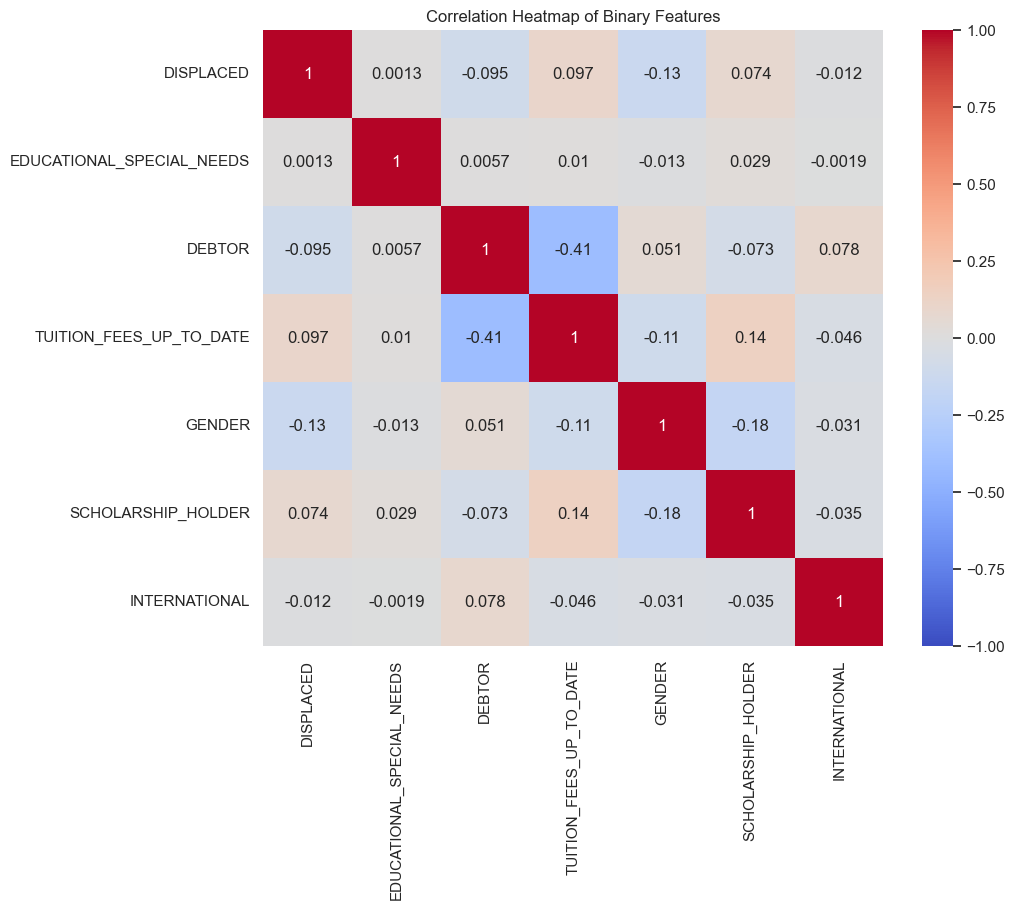

In [ ]:
# Convert binary features to 1 and 0
binary_features = ['DISPLACED', 'EDUCATIONAL_SPECIAL_NEEDS', 'DEBTOR', 'TUITION_FEES_UP_TO_DATE', 'GENDER', 'SCHOLARSHIP_HOLDER', 'INTERNATIONAL']

# Ensure binary features are in 1 and 0 format
data_vis[binary_features] = data_vis[binary_features].apply(lambda x: x.map({'yes': 1, 'no': 0, 'male': 1, 'female': 0}))

# Calculate the Pearson correlation matrix
correlation_matrix = data_vis[binary_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Binary Features')
plt.show()

#### Comments about the continuous data 
- No null/NaN/infinite data values found
- Grade values are inside defined boundaries
- There are 180 students with a mix of Target data results but with no curricular unit data. This could distort the analysis results.
  - Action: Drop those rows.


In [ ]:
# drop the rows with no unit enrollment in the 1st semester as that will drop all of the rows with missing curricular unit data
rows_count_before = data.shape[0]
data = data.drop(data[data['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] == 0].index)
rows_count_after = data.shape[0]
print(f"Dropped {rows_count_before-rows_count_after} rows ")

Dropped 180 rows 


#### Feature creation

##### AGE_GROUP_AT_ENROLLMENT

In [ ]:
# Create the age group at enrollment feature by binning the AGE_AT_ENROLLMENT values

# Define the bins and labels
bins = [0, 18, 20, 30, float('inf')]  # age bins
labels = ['Under 19', '19-20', '21-30', 'Over 30']  # bin labels

# Create a new column for the binned age groups
data['AGE_GROUP_AT_ENROLLMENT'] = pd.cut(data['AGE_AT_ENROLLMENT'], bins=bins, labels=labels).astype(str)

# Count the occurrences of each Age_Group
age_counts = data['AGE_GROUP_AT_ENROLLMENT'].value_counts().reset_index()
age_counts.columns = ['AGE_GROUP_AT_ENROLLMENT', 'Count']  # Rename columns

# Add the column to the categorical columns
categorical_columns.append('AGE_GROUP_AT_ENROLLMENT')

# Display the DataFrame
print(age_counts)

  AGE_GROUP_AT_ENROLLMENT  Count
0                   19-20   1437
1                   21-30   1174
2                Under 19    978
3                 Over 30    655


#### Feature transformation

# Outliers

Handling Outliers with Transformation

In [ ]:
from scipy.stats import boxcox

# Apply log transformation to continuous columns
data[continuous_columns] = data[continuous_columns].apply(lambda x: np.log1p(x))

# Apply square root transformation to continuous columns
data[continuous_columns] = data[continuous_columns].apply(lambda x: np.sqrt(x))

# Apply box-cox transformation to continuous columns
for col in continuous_columns:
    if (data[col] > 0).all():  # Box-Cox requires all positive values
        data[col], _ = boxcox(data[col])

# Display the first few rows of the transformed dataframe
print(data.head())

   MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
1             0.0               5.0                0.0    10.0   
2             0.0               0.0                4.0     4.0   
3             0.0               7.0                1.0    14.0   
4             1.0              11.0                0.0     2.0   
5             1.0              11.0                0.0    16.0   

   DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
1                         1.0                     0.0   
2                         1.0                     0.0   
3                         1.0                     0.0   
4                         0.0                     0.0   
5                         0.0                    11.0   

   PREVIOUS_QUALIFICATION_GRADE  NATIONALITY  MOTHER_QUALIFICATION  \
1                      1.066048          0.0                   0.0   
2                           NaN          0.0                  21.0   
3                           NaN          0.0      

c:\Users\aidan_1k98io6\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\aidan_1k98io6\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Define the continuous columns
continuous_columns = [
    'PREVIOUS_QUALIFICATION_GRADE',
    'ADMISSION_GRADE',
    'AGE_AT_ENROLLMENT',
    'CURRICULAR_UNITS_1ST_SEM_CREDITED',
    'CURRICULAR_UNITS_1ST_SEM_ENROLLED',
    'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS',
    'CURRICULAR_UNITS_1ST_SEM_APPROVED',
    'CURRICULAR_UNITS_1ST_SEM_GRADE',
    'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS',
    'CURRICULAR_UNITS_2ND_SEM_CREDITED',
    'CURRICULAR_UNITS_2ND_SEM_ENROLLED',
    'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS',
    'CURRICULAR_UNITS_2ND_SEM_APPROVED',
    'CURRICULAR_UNITS_2ND_SEM_GRADE',
    'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS',
    'UNEMPLOYMENT_RATE',
    'INFLATION_RATE',
    'GDP'
]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[continuous_columns], data['TARGET'], test_size=0.2, random_state=42)

# Impute missing values in the continuous columns
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fit linear regression model on original data
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on test data
y_pred_original = linear_reg.predict(X_test)

# Calculate R-squared score for original data
r2_original = r2_score(y_test, y_pred_original)

# Apply log transformation to continuous columns
X_train_log = pd.DataFrame(X_train, columns=continuous_columns)
X_test_log = pd.DataFrame(X_test, columns=continuous_columns)
X_train_log[continuous_columns] = X_train_log[continuous_columns].apply(np.log1p)
X_test_log[continuous_columns] = X_test_log[continuous_columns].apply(np.log1p)

# Fit linear regression model on log-transformed data
linear_reg_log = LinearRegression()
linear_reg_log.fit(X_train_log, y_train)

# Predict on test data
y_pred_log = linear_reg_log.predict(X_test_log)

# Calculate R-squared score for log-transformed data
r2_log = r2_score(y_test, y_pred_log)

print(f"R-squared score without log transform: {r2_original}")
print(f"R-squared score with log transform: {r2_log}")

R-squared score without log transform: 0.522353166093816
R-squared score with log transform: 0.5376891951374824


In [132]:
import numpy as np

std_error = np.std(y_pred_knn, ddof=1) / np.sqrt(len(y_pred_knn))
print(std_error)

0.030170430784597736


In [133]:
import numpy as np
from scipy.stats import t

# Calculate the mean and standard error of the predictions
mean_pred = np.mean(y_pred_knn)
std_error = np.std(y_pred_knn, ddof=1) / np.sqrt(len(y_pred_knn))

# Define the confidence level
confidence_level = 0.95

# Calculate the critical value from the t-distribution
degrees_of_freedom = len(y_pred_knn) - 1
critical_value = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the prediction interval
lower_bound = mean_pred - margin_of_error
upper_bound = mean_pred + margin_of_error

print(f"Prediction Interval: [{lower_bound}, {upper_bound}]")

Prediction Interval: [1.2051927485382494, 1.3236208107837846]


In [ ]:
# Apply logarithmic transformation to highly skewed features
# Check the skewness of the continuous columns
skewed_features = data[continuous_columns].skew().sort_values(ascending=False)
print("Skewness of continuous features:")
print(skewed_features)

# Select features with high skewness (e.g., skewness > 1 or < -1)
high_skewness_features = skewed_features[abs(skewed_features) > 1].index

# Apply logarithmic transformation to these features
data[high_skewness_features] = data[high_skewness_features].apply(lambda x: np.log1p(x))

# Display the first few rows of the transformed dataframe
print(data[high_skewness_features].head())

Skewness of continuous features:
CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS    0.962781
CURRICULAR_UNITS_1ST_SEM_ENROLLED               0.931738
CURRICULAR_UNITS_2ND_SEM_ENROLLED               0.623061
CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS    0.610556
CURRICULAR_UNITS_1ST_SEM_APPROVED               0.539785
CURRICULAR_UNITS_2ND_SEM_APPROVED               0.295899
CURRICULAR_UNITS_2ND_SEM_EVALUATIONS            0.234735
CURRICULAR_UNITS_1ST_SEM_EVALUATIONS            0.138956
PREVIOUS_QUALIFICATION_GRADE                    0.024054
UNEMPLOYMENT_RATE                              -0.002157
ADMISSION_GRADE                                -0.073509
CURRICULAR_UNITS_2ND_SEM_CREDITED              -0.195908
INFLATION_RATE                                 -0.273631
AGE_AT_ENROLLMENT                              -0.277913
CURRICULAR_UNITS_1ST_SEM_CREDITED              -0.411429
GDP                                            -0.445818
CURRICULAR_UNITS_1ST_SEM_GRADE                 -0.45279

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Initialize the power transformer
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Apply the power transformation to the continuous columns
data[continuous_columns] = power_transformer.fit_transform(data[continuous_columns])

# Display the first few rows of the transformed dataframe
print(data.head())

   MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
1             0.0               5.0                0.0    10.0   
2             0.0               0.0                4.0     4.0   
3             0.0               7.0                1.0    14.0   
4             1.0              11.0                0.0     2.0   
5             1.0              11.0                0.0    16.0   

   DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
1                         1.0                     0.0   
2                         1.0                     0.0   
3                         1.0                     0.0   
4                         0.0                     0.0   
5                         0.0                    11.0   

   PREVIOUS_QUALIFICATION_GRADE  NATIONALITY  MOTHER_QUALIFICATION  \
1                      1.504572          0.0                   0.0   
2                           NaN          0.0                  21.0   
3                           NaN          0.0      

In [ ]:
# # Define the lower and upper quantiles for capping
# lower_quantile = 0.01
# upper_quantile = 0.99

# # Cap the outliers in the continuous columns
# for col in continuous_columns:
#     lower_bound = data[col].quantile(lower_quantile)
#     upper_bound = data[col].quantile(upper_quantile)
#     data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# # Display the first few rows of the capped dataframe
# print(data[continuous_columns].head())

   PREVIOUS_QUALIFICATION_GRADE  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
1                      1.504572         0.714970                NaN   
2                           NaN              NaN                NaN   
3                           NaN              NaN                NaN   
4                           NaN         0.640067           1.323695   
5                     -1.343961              NaN           1.595598   

   CURRICULAR_UNITS_1ST_SEM_CREDITED  CURRICULAR_UNITS_1ST_SEM_ENROLLED  \
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   
5                                NaN                                NaN   

   CURRICULAR_UNITS_1ST_SEM_EVALUATIONS  CURRICULAR_UNITS_1ST_SEM_APPROVED  \
1                                   NaN     

In [ ]:
# Winsorizing

In [ ]:
# Feature Selection and Dimensionality

# Select the top 10 features using RFE with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
X_rfe = rfe_selector.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[rfe_selector.get_support()]
print("Selected features using RFE:")
print(selected_features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Print explained variance ratio
print("Explained variance ratio by PCA components:")
print(pca.explained_variance_ratio_)

Selected features using RFE:
Index(['PREVIOUS_QUALIFICATION_GRADE', 'ADMISSION_GRADE',
       'CURRICULAR_UNITS_1ST_SEM_GRADE', 'CURRICULAR_UNITS_2ND_SEM_APPROVED',
       'CURRICULAR_UNITS_2ND_SEM_GRADE', 'Dropout_Flag',
       'TOTAL_UNITS_APPROVED', 'APPROVAL_RATE', 'GRADE_CHANGE', 'IS_DROPOUT'],
      dtype='object')
Explained variance ratio by PCA components:
[9.96794324e-01 1.20584503e-03 1.07524279e-03 3.40590137e-04
 2.69239410e-04 1.01728673e-04 7.20636017e-05 5.54119935e-05
 4.02732228e-05 2.29877434e-05]


                                              PREVIOUS_QUALIFICATION_GRADE  \
PREVIOUS_QUALIFICATION_GRADE                                      1.000000   
ADMISSION_GRADE                                                   0.394061   
AGE_AT_ENROLLMENT                                                -0.168010   
CURRICULAR_UNITS_1ST_SEM_CREDITED                                -0.077683   
CURRICULAR_UNITS_1ST_SEM_ENROLLED                                 0.144328   
CURRICULAR_UNITS_1ST_SEM_EVALUATIONS                             -0.025747   
CURRICULAR_UNITS_1ST_SEM_APPROVED                                 0.186589   
CURRICULAR_UNITS_1ST_SEM_GRADE                                    0.272892   
CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS                     -0.059850   
CURRICULAR_UNITS_2ND_SEM_CREDITED                                -0.047502   
CURRICULAR_UNITS_2ND_SEM_ENROLLED                                 0.180537   
CURRICULAR_UNITS_2ND_SEM_EVALUATIONS                            

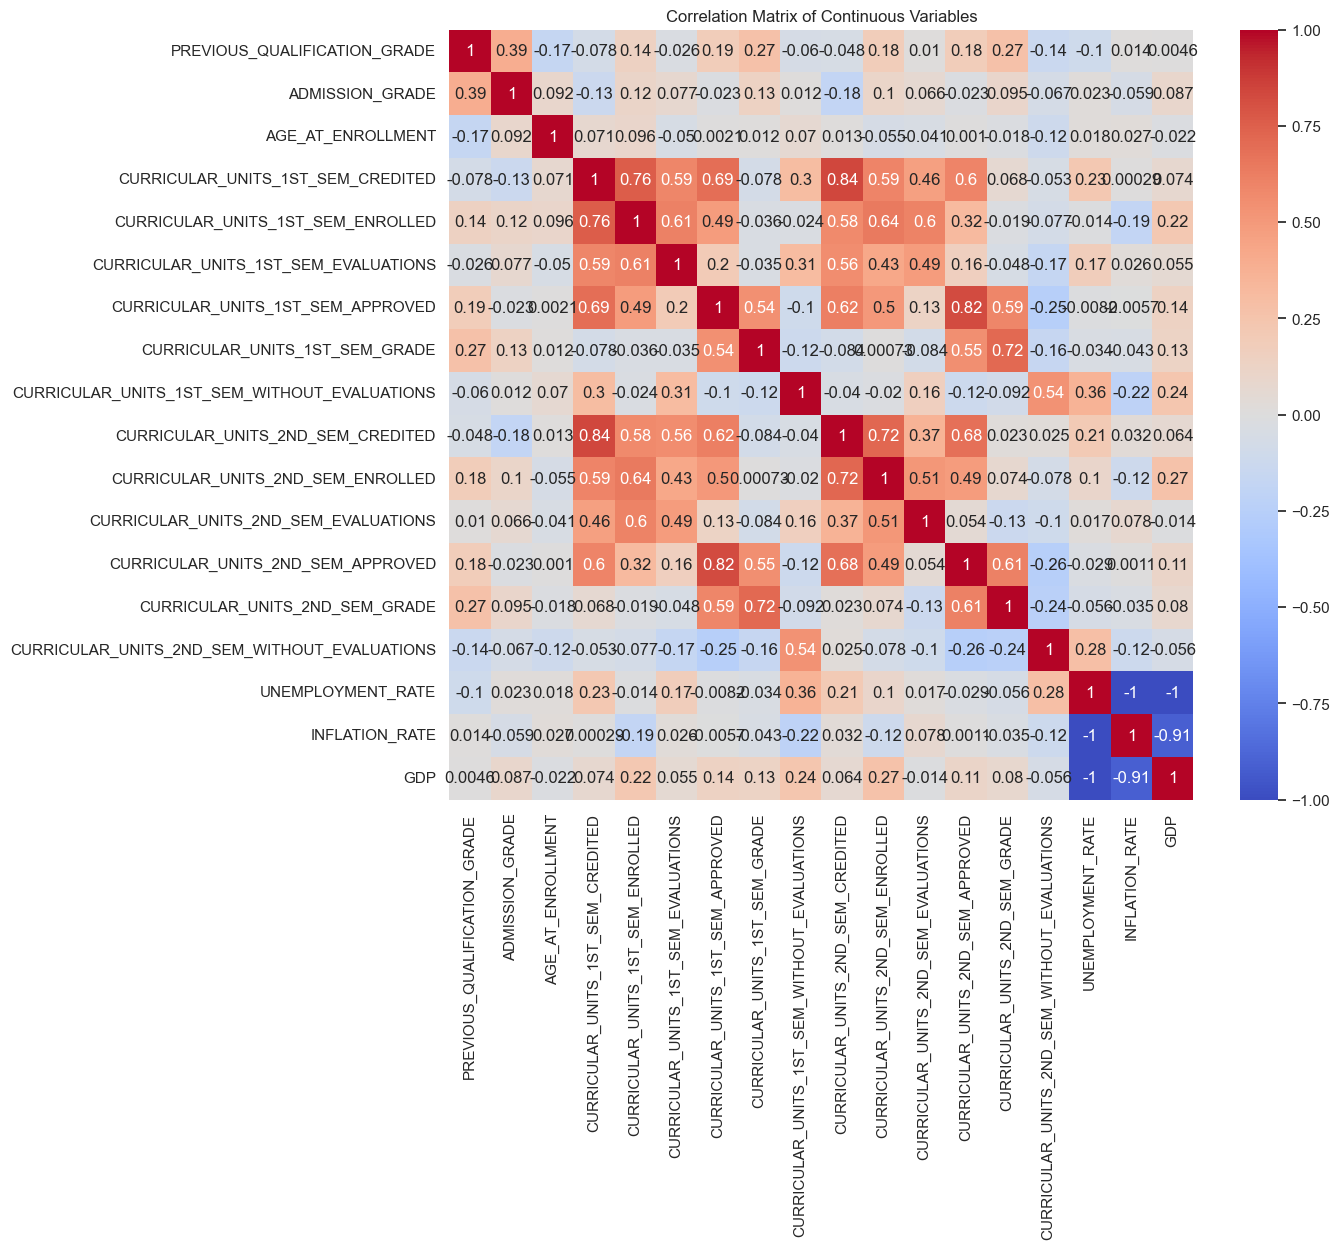

In [ ]:
# Calculate the correlation matrix for continuous variables
correlation_matrix = data[continuous_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create a DataFrame to display the scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': mi_scores})

# Sort the DataFrame by the scores in descending order
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information Score', ascending=False)

# Display the DataFrame
print(mi_scores_df)

                                         Feature  Mutual Information Score
37                                  Dropout_Flag                  0.620948
43                                    IS_DROPOUT                  0.618017
41                                 APPROVAL_RATE                  0.417702
39                          TOTAL_UNITS_APPROVED                  0.354583
30             CURRICULAR_UNITS_2ND_SEM_APPROVED                  0.352747
31                CURRICULAR_UNITS_2ND_SEM_GRADE                  0.284617
24             CURRICULAR_UNITS_1ST_SEM_APPROVED                  0.272549
25                CURRICULAR_UNITS_1ST_SEM_GRADE                  0.218444
29          CURRICULAR_UNITS_2ND_SEM_EVALUATIONS                  0.117410
42                                  GRADE_CHANGE                  0.117027
23          CURRICULAR_UNITS_1ST_SEM_EVALUATIONS                  0.097828
16                       TUITION_FEES_UP_TO_DATE                  0.085731
3                        

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                                         Feature  Importance
43                                    IS_DROPOUT    0.194097
37                                  Dropout_Flag    0.193520
41                                 APPROVAL_RATE    0.102976
39                          TOTAL_UNITS_APPROVED    0.069838
30             CURRICULAR_UNITS_2ND_SEM_APPROVED    0.053260
24             CURRICULAR_UNITS_1ST_SEM_APPROVED    0.038946
25                CURRICULAR_UNITS_1ST_SEM_GRADE    0.036779
31                CURRICULAR_UNITS_2ND_SEM_GRADE    0.033985
29          CURRICULAR_UNITS_2ND_SEM_EVALUATIONS    0.019857
42                                  GRADE_CHANGE    0.018195
12                               ADMISSION_GRADE    0.017634
19                             AGE_AT_ENROLLMENT    0.016727
23          CURRICULAR_UNITS_1ST_SEM_EVALUATIONS    0.016586
16                       TUITION_FEES_UP_TO_DATE    0.016247
3                                         COURSE    0.014302
6                   PREV

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the continuous features
data[continuous_columns] = min_max_scaler.fit_transform(data[continuous_columns])

# Display the first few rows of the scaled dataframe
print(data.head())

   MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
1             0.0               5.0                0.0    10.0   
2             0.0               0.0                4.0     4.0   
3             0.0               7.0                1.0    14.0   
4             1.0              11.0                0.0     2.0   
5             1.0              11.0                0.0    16.0   

   DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
1                         1.0                     0.0   
2                         1.0                     0.0   
3                         1.0                     0.0   
4                         0.0                     0.0   
5                         0.0                    11.0   

   PREVIOUS_QUALIFICATION_GRADE  NATIONALITY  MOTHER_QUALIFICATION  \
1                      0.904162          0.0                   0.0   
2                           NaN          0.0                  21.0   
3                           NaN          0.0      

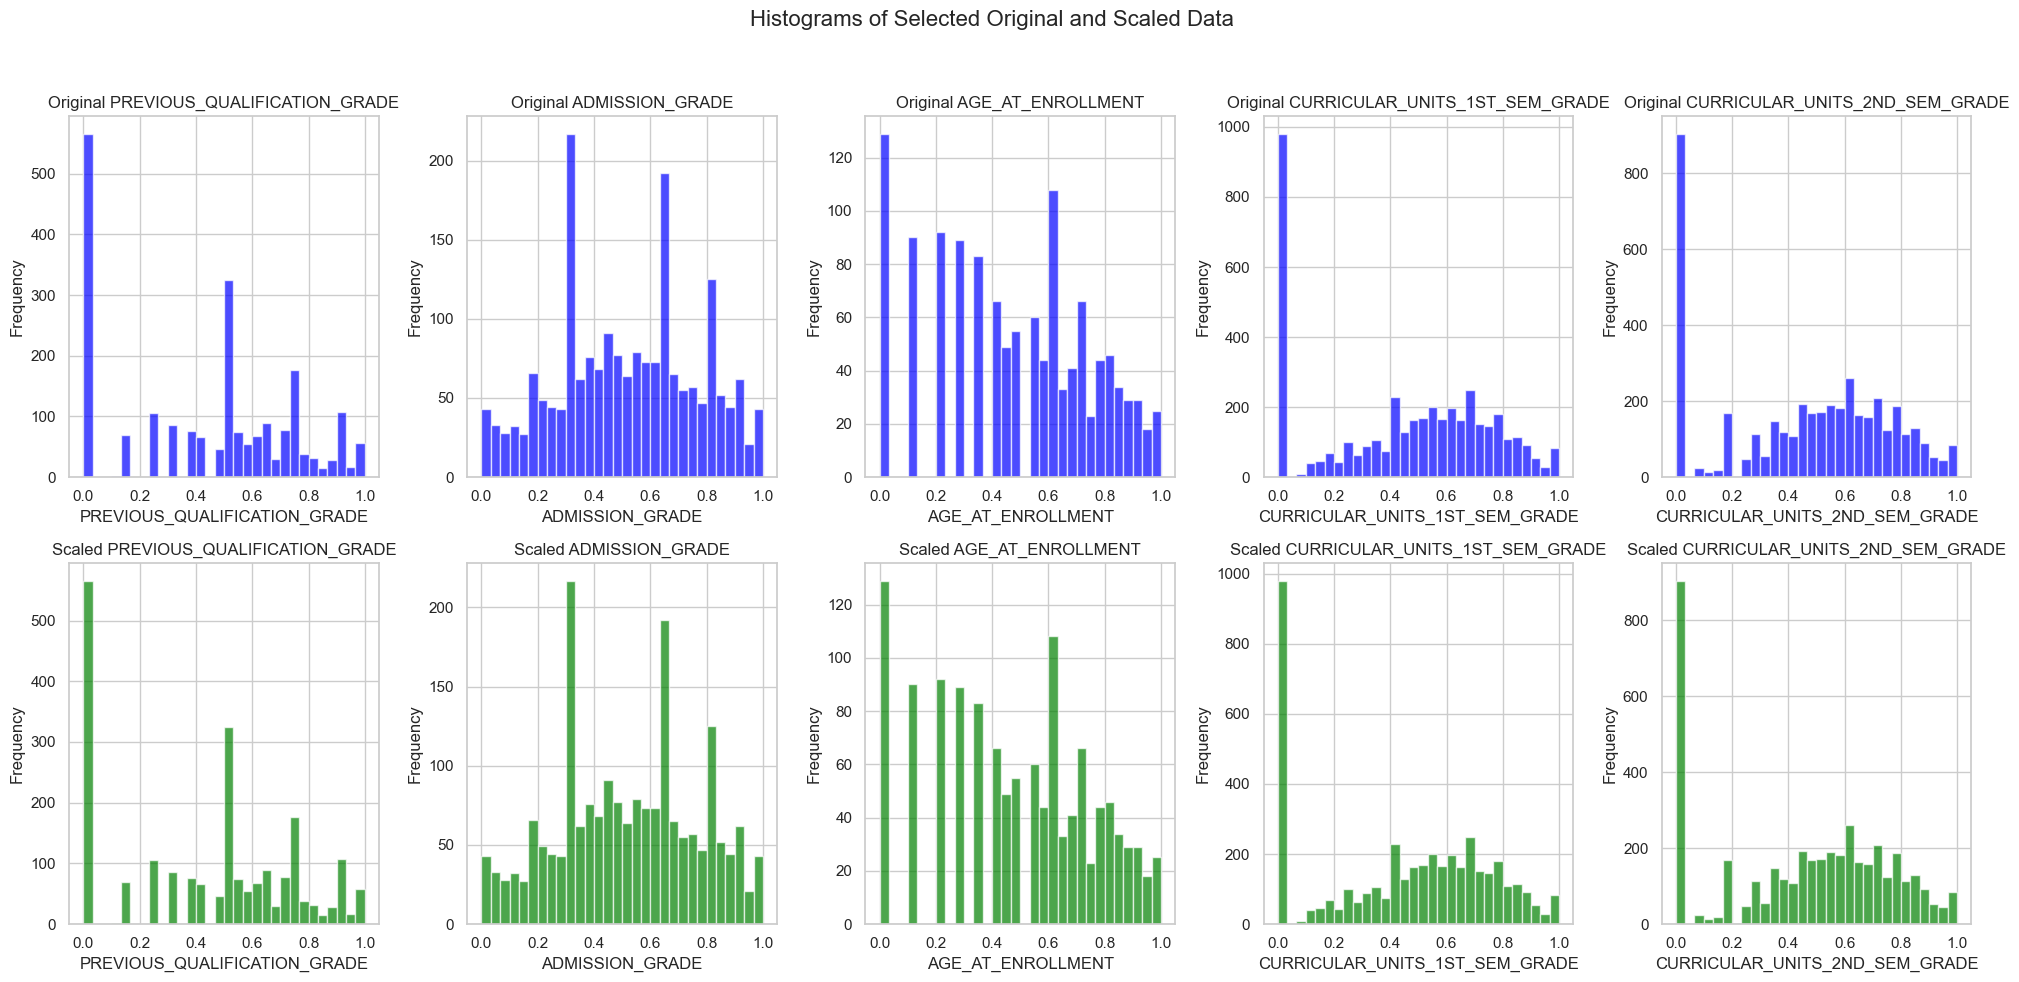

In [ ]:
# Select a subset of continuous columns to plot
selected_columns = [
    'PREVIOUS_QUALIFICATION_GRADE', 
    'ADMISSION_GRADE', 
    'AGE_AT_ENROLLMENT', 
    'CURRICULAR_UNITS_1ST_SEM_GRADE', 
    'CURRICULAR_UNITS_2ND_SEM_GRADE'
]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=len(selected_columns), figsize=(20, 10))
fig.suptitle('Histograms of Selected Original and Scaled Data', fontsize=16)

# Plot histograms of original data
for i, col in enumerate(selected_columns):
    axes[0, i].hist(data[col], bins=30, color='blue', alpha=0.7)
    axes[0, i].set_title(f'Original {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')

# Plot histograms of scaled data
for i, col in enumerate(selected_columns):
    axes[1, i].hist(data[col], bins=30, color='green', alpha=0.7)
    axes[1, i].set_title(f'Scaled {col}')
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Ensure the column name matches exactly
column_name = 'ADMISSION GRADE'

# Fit and transform the ADMISSION GRADE column
data[column_name] = scaler.fit_transform(data[[column_name]])

# Display the first few rows of the normalized dataframe
print(data[[column_name]].head())

   ADMISSION GRADE
0         0.022229
1         1.071926
2        -0.150419
3        -0.509526
4         1.002867


## 4) Data Exploration

### Improve readability of Nominal Data for Data Exploration
- Create 'data_vis' as a copy of the data for visualisation
- label the encoded nominal variables
- 'data' will continue to be used for machine learning

In [ ]:
# create the 'data_vis' data
data_vis = data.copy()

print(data_vis)

      MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
5                  2                39                  1    9991   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
1                              1                       1   
2                              1                   

##### 'Marital status' column

In [ ]:
# Use labels from the Dataset definition
marital_status_labels = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

# Map the labels to the data values
data_vis['MARITAL_STATUS'] = data_vis['MARITAL_STATUS'].map(marital_status_labels)

##### 'Application mode' column

In [ ]:
# Use labels from the Dataset definition
application_mode_labels = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

# Map the labels to the data values
data_vis['APPLICATION_MODE'] = data_vis['APPLICATION_MODE'].map(application_mode_labels)

##### 'Application order' is Ordinal (1 is first choice, 9 is last choice) so values left as numbers

##### 'Course' column

In [ ]:
# Use labels from the Dataset definition
course_labels = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Map the labels to the data values
data_vis['COURSE'] = data_vis['COURSE'].map(course_labels)

##### 'Daytime/evening attendance' column

In [ ]:
# Use labels from the Dataset definition
daytime_evening_labels = {
    1: 'daytime',
    0: 'evening'
}

# Map the labels to the data values
data_vis['DAYTIME/EVENING_ATTENDANCE'] = data_vis['DAYTIME/EVENING_ATTENDANCE'].map(daytime_evening_labels)

##### 'Previous qualification' column

In [ ]:
# Use labels from the Dataset definition
previous_qualification_labels = {
    1: 'Secondary education',
    2: 'Higher education - bachelor\'s degree',
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

# Map the labels to the data values
data_vis['PREVIOUS_QUALIFICATION'] = data_vis['PREVIOUS_QUALIFICATION'].map(previous_qualification_labels)

##### 'Nationality' column

In [ ]:
# Use labels from the Dataset definition
nationality_labels = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

# Map the labels to the data values
data_vis['NATIONALITY'] = data_vis['NATIONALITY'].map(nationality_labels)

##### 'Mother's  and Father's qualification' columns

In [ ]:
# Use labels from the Dataset definition
qualification_labels = {
    1: "Secondary Education - 12th Year of Schooling or Eq.", 
    2: "Higher Education - Bachelor's Degree", 
    3: "Higher Education - Degree", 
    4: "Higher Education - Master's", 
    5: "Higher Education - Doctorate", 
    6: "Frequency of Higher Education", 
    9: "12th Year of Schooling - Not Completed", 
    10: "11th Year of Schooling - Not Completed", 
    11: "7th Year (Old)", 
    12: "Other - 11th Year of Schooling", 
    13: "2nd year complementary high school course", 
    14: "10th Year of Schooling", 
    18: "General commerce course", 
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.", 
    20: "Complementary High School Course", 
    22: "Technical-professional course", 
    25: "Complementary High School Course - not concluded", 
    26: "7th year of schooling", 
    27: "2nd cycle of the general high school course", 
    29: "9th Year of Schooling - Not Completed", 
    30: "8th year of schooling", 
    31: "General Course of Administration and Commerce", 
    33: "Supplementary Accounting and Administration", 
    34: "Unknown", 
    35: "Can't read or write", 
    36: "Can read without having a 4th year of schooling", 
    37: "Basic education 1st cycle (4th/5th year) or equiv.", 
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.", 
    39: "Technological specialization course", 
    40: "Higher education - degree (1st cycle)", 
    41: "Specialized higher studies course", 
    42: "Professional higher technical course", 
    43: "Higher Education - Master (2nd cycle)", 
    44: "Higher Education - Doctorate (3rd cycle)"
}

# Map the labels to the data values
data_vis['MOTHER_QUALIFICATION'] = data_vis['MOTHER_QUALIFICATION'].map(qualification_labels)
data_vis['FATHER_QUALIFICATION'] = data_vis['FATHER_QUALIFICATION'].map(qualification_labels)

##### TODO Idea for feature: group qualifications into standards of education (perhaps five groups?)

##### 'Mother's  and Father's occupation' columns

In [ ]:
# Use labels from the Dataset definition
occupation_labels = {
    0: "Student", 
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers", 
    2: "Specialists in Intellectual and Scientific Activities", 
    3: "Intermediate Level Technicians and Professions", 
    4: "Administrative staff", 
    5: "Personal Services, Security and Safety Workers and Sellers", 
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry", 
    7: "Skilled Workers in Industry, Construction and Craftsmen", 
    8: "Installation and Machine Operators and Assembly Workers", 
    9: "Unskilled Workers", 
    10: "Armed Forces Professions", 
    90: "Other Situation", 
    99: "(blank)", 
    101: "Armed Forces Officers", 
    102: "Armed Forces Sergeants", 
    103: "Other Armed Forces personnel", 
    112: "Directors of administrative and commercial services", 
    114: "Hotel, catering, trade and other services directors", 
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques", 
    122: "Health professionals", 
    123: "Teachers", 
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations", 
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions", 
    132: "Technicians and professionals, of intermediate level of health", 
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services", 
    135: "Information and communication technology technicians", 
    141: "Office workers, secretaries in general and data processing operators", 
    143: "Data, accounting, statistical, financial services and registry-related operators", 
    144: "Other administrative support staff", 
    151: "Personal service workers", 
    152: "Sellers", 
    153: "Personal care workers and the like", 
    154: "Protection and security services personnel", 
    161: "Market-oriented farmers and skilled agricultural and animal production workers", 
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence", 
    171: "Skilled construction workers and the like, except electricians", 
    172: "Skilled workers in metallurgy, metalworking and similar", 
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like", 
    174: "Skilled workers in electricity and electronics", 
    175: "Workers in food processing, woodworking, clothing and other industries and crafts", 
    181: "Fixed plant and machine operators", 
    182: "Assembly workers", 
    183: "Vehicle drivers and mobile equipment operators", 
    191: "Cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry", 
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport", 
    194: "Meal preparation assistants", 
    195: "Street vendors (except food) and street service providers"
}

data_vis['MOTHER_OCCUPATION'] = data_vis['MOTHER_OCCUPATION'].map(occupation_labels)
data_vis['FATHER_OCCUPATION'] = data_vis['FATHER_OCCUPATION'].map(occupation_labels)


##### Dichotomous columns: 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'GENDER', 'Scholarship holder' and 'International'

In [ ]:
# Use labels from the Dataset definition
binary_labels = {1: 'yes', 0: 'no'}
gender_labels = {1: 'male', 0: 'female'}

# Map the labels to the data values
data_vis['DISPLACED'] = data_vis['DISPLACED'].map(binary_labels)
data_vis['EDUCATIONAL_SPECIAL_NEEDS'] = data_vis['EDUCATIONAL_SPECIAL_NEEDS'].map(binary_labels)
data_vis['DEBTOR'] = data_vis['DEBTOR'].map(binary_labels)
data_vis['TUITION_FEES_UP_TO_DATE'] = data_vis['TUITION_FEES_UP_TO_DATE'].map(binary_labels)
data_vis['GENDER'] = data_vis['GENDER'].map(gender_labels)
data_vis['SCHOLARSHIP_HOLDER'] = data_vis['SCHOLARSHIP_HOLDER'].map(binary_labels)
data_vis['INTERNATIONAL'] = data_vis['INTERNATIONAL'].map(binary_labels)

### Statistical Summary

##### Display tables of Categorical data count & relative percentage information

In [ ]:
show_value_counts_in_table(data_vis, categorical_columns)
show_value_percent_in_table(data_vis, categorical_columns)

##### Display a table of Continuous data Summary information

In [ ]:
data[continuous_columns].describe()

PREVIOUS_QUALIFICATION_GRADE  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
count                   4244.000000      4244.000000        4244.000000   
mean                     132.373115       126.607163          23.397738   
std                       13.059485        14.281839           7.684054   
min                       95.000000        95.000000          17.000000   
25%                      124.000000       117.800000          19.000000   
50%                      133.000000       125.800000          20.000000   
75%                      140.000000       134.100000          25.000000   
max                      190.000000       190.000000          70.000000   

       CURRICULAR_UNITS_1ST_SEM_CREDITED  CURRICULAR_UNITS_1ST_SEM_ENROLLED  \
count                        4244.000000                        4244.000000   
mean                            0.740104                           6.536522   
std                             2.405427                           2.161810   
min                             0.000000                           1.000000   
25%                             0.000000                           6.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            20.000000                          26.000000   

       CURRICULAR_UNITS_1ST_SEM_EVALUATIONS  \
count                           4244.000000   
mean                               8.651037   
std                                3.893594   
min                                0.000000   
25%                                7.000000   
50%                                8.000000   
75%                               10.000000   
max                               45.000000   

       CURRICULAR_UNITS_1ST_SEM_APPROVED  CURRICULAR_UNITS_1ST_SEM_GRADE  \
count                        4244.000000                     4244.000000   
mean                            4.906221                       11.092129   
std                             3.000144                        4.410127   
min                             0.000000                        0.000000   
25%                             3.000000                       11.250000   
50%                             5.000000                       12.333333   
75%                             6.000000                       13.428571   
max                            26.000000                       18.875000   

       CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS  \
count                                   4244.000000   
mean                                       0.143497   
std                                        0.704788   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       12.000000   

       CURRICULAR_UNITS_2ND_SEM_CREDITED  CURRICULAR_UNITS_2ND_SEM_ENROLLED  \
count                        4244.000000                        4244.000000   
mean                            0.564797                           6.496466   
std                             1.955502                           1.819121   
min                             0.000000                           1.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          23.000000   

       CURRICULAR_UNITS_2ND_SEM_EVALUATIONS  \
count                           4244.000000   
mean                               8.405278   
std                                3.656824   
min                                0.000000   
25%                                6.000000   
50%                 

### Visualisation

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_47888\4217721927.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=data_vis, palette='viridis')


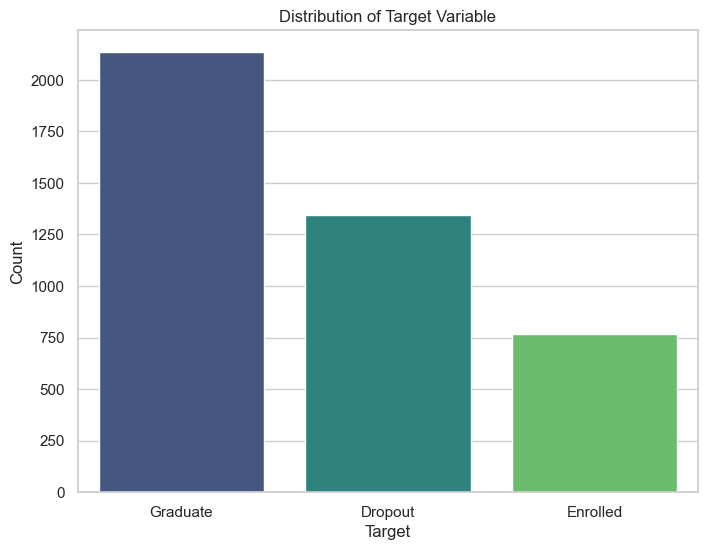

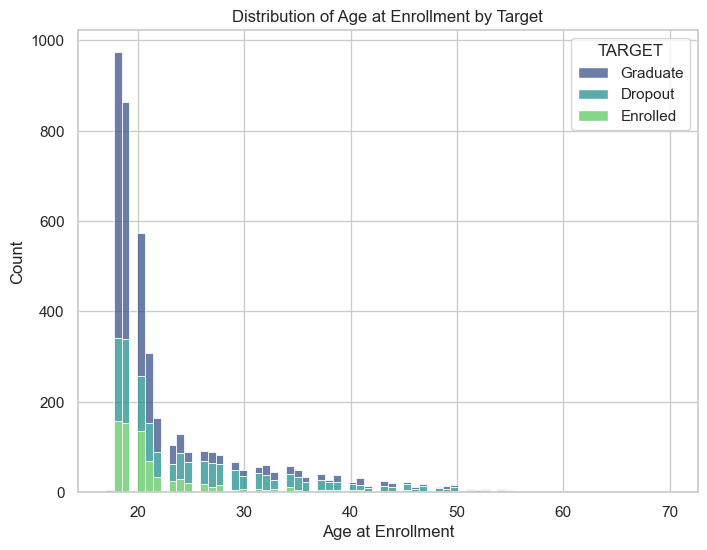

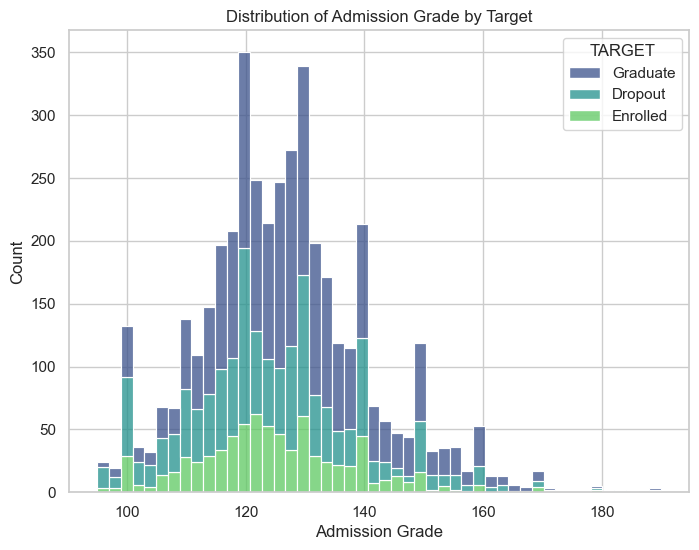

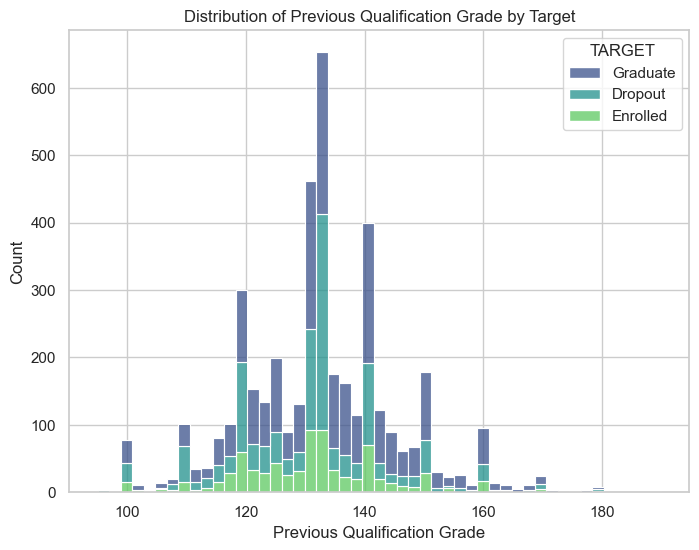

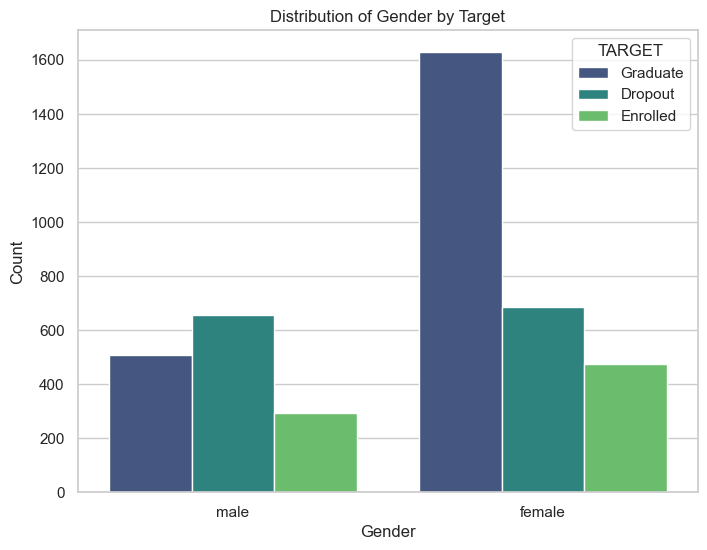

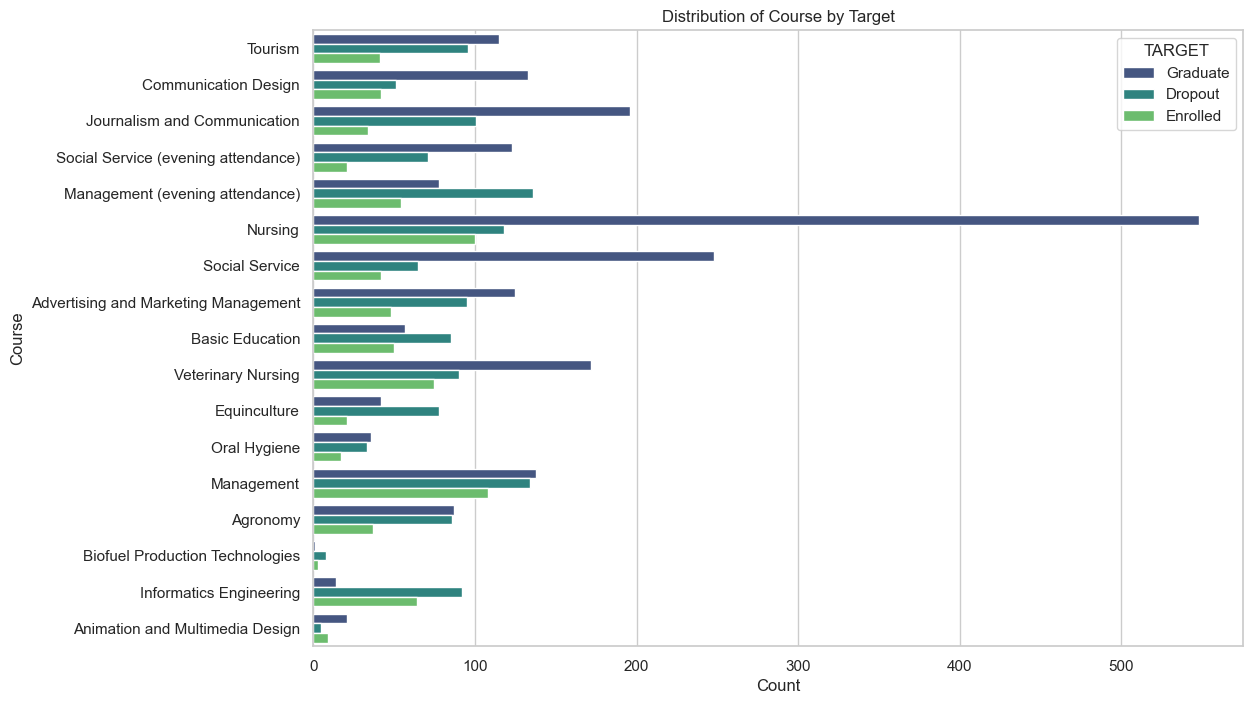

In [ ]:
import seaborn as sns

# Import necessary libraries
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=data_vis, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Plot the distribution of age at enrollment
plt.figure(figsize=(8, 6))
sns.histplot(data=data_vis, x='AGE_AT_ENROLLMENT', hue='TARGET', multiple='stack', palette='viridis')
plt.title('Distribution of Age at Enrollment by Target')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
plt.show()

# Plot the distribution of admission grade
plt.figure(figsize=(8, 6))
sns.histplot(data=data_vis, x='ADMISSION_GRADE', hue='TARGET', multiple='stack', palette='viridis')
plt.title('Distribution of Admission Grade by Target')
plt.xlabel('Admission Grade')
plt.ylabel('Count')
plt.show()

# Plot the distribution of previous qualification grade
plt.figure(figsize=(8, 6))
sns.histplot(data=data_vis, x='PREVIOUS_QUALIFICATION_GRADE', hue='TARGET', multiple='stack', palette='viridis')
plt.title('Distribution of Previous Qualification Grade by Target')
plt.xlabel('Previous Qualification Grade')
plt.ylabel('Count')
plt.show()

# Plot the distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='GENDER', hue='TARGET', data=data_vis, palette='viridis')
plt.title('Distribution of Gender by Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot the distribution of course
plt.figure(figsize=(12, 8))
sns.countplot(y='COURSE', hue='TARGET', data=data_vis, palette='viridis')
plt.title('Distribution of Course by Target')
plt.xlabel('Count')
plt.ylabel('Course')
plt.show()

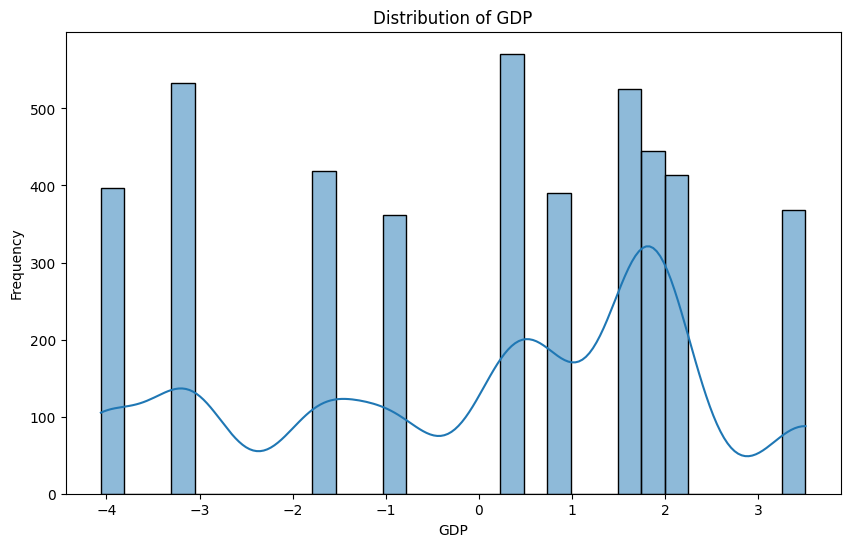

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure continuous_columns and categorical_columns are populated
if not continuous_columns:
    continuous_columns = [
        'PREVIOUS_QUALIFICATION_GRADE', 'ADMISSION_GRADE', 'AGE_AT_ENROLLMENT',
        'CURRICULAR_UNITS_1ST_SEM_CREDITED', 'CURRICULAR_UNITS_1ST_SEM_ENROLLED',
        'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS', 'CURRICULAR_UNITS_1ST_SEM_APPROVED',
        'CURRICULAR_UNITS_1ST_SEM_GRADE', 'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS',
        'CURRICULAR_UNITS_2ND_SEM_CREDITED', 'CURRICULAR_UNITS_2ND_SEM_ENROLLED',
        'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS', 'CURRICULAR_UNITS_2ND_SEM_APPROVED',
        'CURRICULAR_UNITS_2ND_SEM_GRADE', 'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS',
        'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP'
    ]

if not categorical_columns:
    categorical_columns = [
        'MARITAL_STATUS', 'APPLICATION_MODE', 'APPLICATION_ORDER', 'COURSE',
        'DAYTIME/EVENING_ATTENDANCE', 'PREVIOUS_QUALIFICATION', 'NATIONALITY',
        'MOTHER_QUALIFICATION', 'FATHER_QUALIFICATION', 'MOTHER_OCCUPATION',
        'FATHER_OCCUPATION', 'DISPLACED', 'EDUCATIONAL_SPECIAL_NEEDS', 'DEBTOR',
        'TUITION_FEES_UP_TO_DATE', 'GENDER', 'SCHOLARSHIP_HOLDER', 'INTERNATIONAL',
        'TARGET'
    ]

# Univariate Analysis (distributions)

# Plot histograms for continuous variables
for column in continuous_columns:
    if column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Plot count plots for categorical variables
for column in categorical_columns:
    if column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=data)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

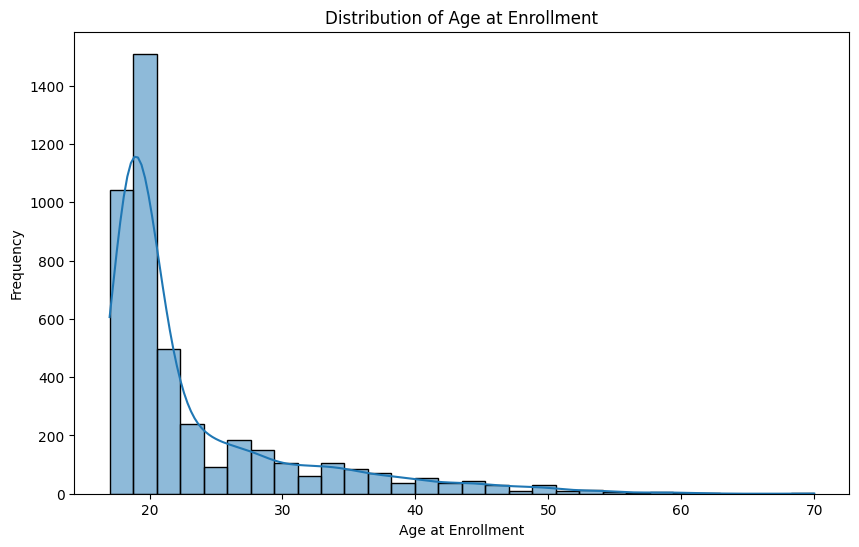

In [61]:
# Plot histogram for AGE_AT_ENROLLMENT
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE AT ENROLLMENT'], kde=True, bins=30)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_81420\3452007386.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='APPLICATION MODE', data=data, palette='viridis')


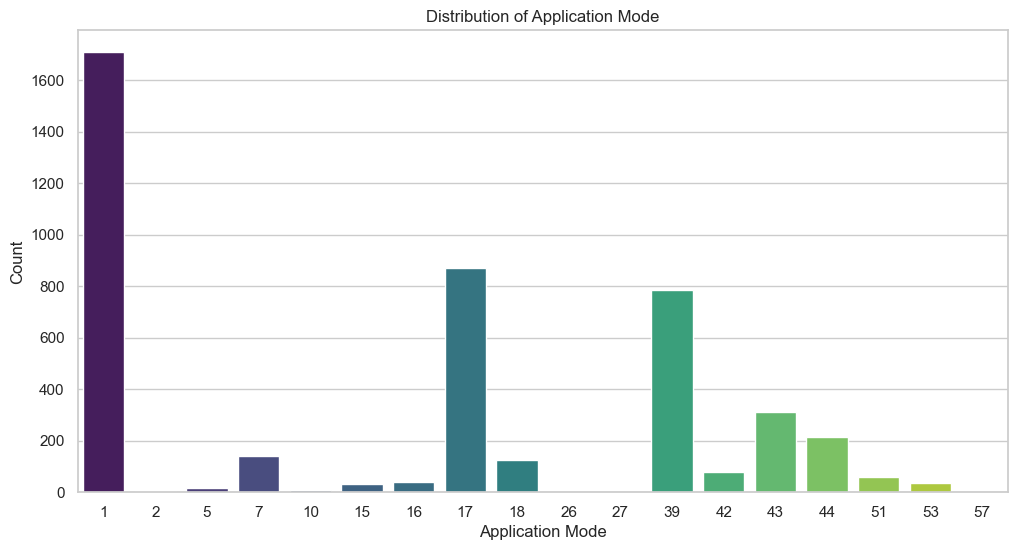

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of application mode
plt.figure(figsize=(12, 6))
sns.countplot(x='APPLICATION MODE', data=data, palette='viridis')
plt.title('Distribution of Application Mode')
plt.xlabel('Application Mode')
plt.ylabel('Count')
plt.show()

Missing columns in the DataFrame: ['PREVIOUS_QUALIFICATION_GRADE', 'ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'CURRICULAR_UNITS_1ST_SEM_CREDITED', 'CURRICULAR_UNITS_1ST_SEM_ENROLLED', 'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS', 'CURRICULAR_UNITS_1ST_SEM_APPROVED', 'CURRICULAR_UNITS_1ST_SEM_GRADE', 'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS', 'CURRICULAR_UNITS_2ND_SEM_CREDITED', 'CURRICULAR_UNITS_2ND_SEM_ENROLLED', 'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS', 'CURRICULAR_UNITS_2ND_SEM_APPROVED', 'CURRICULAR_UNITS_2ND_SEM_GRADE', 'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS', 'UNEMPLOYMENT_RATE', 'INFLATION_RATE']
Correlation of continuous variables with the target variable:
TARGET    1.000000
GDP       0.044135
Name: TARGET, dtype: float64


C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_81420\2118051171.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')


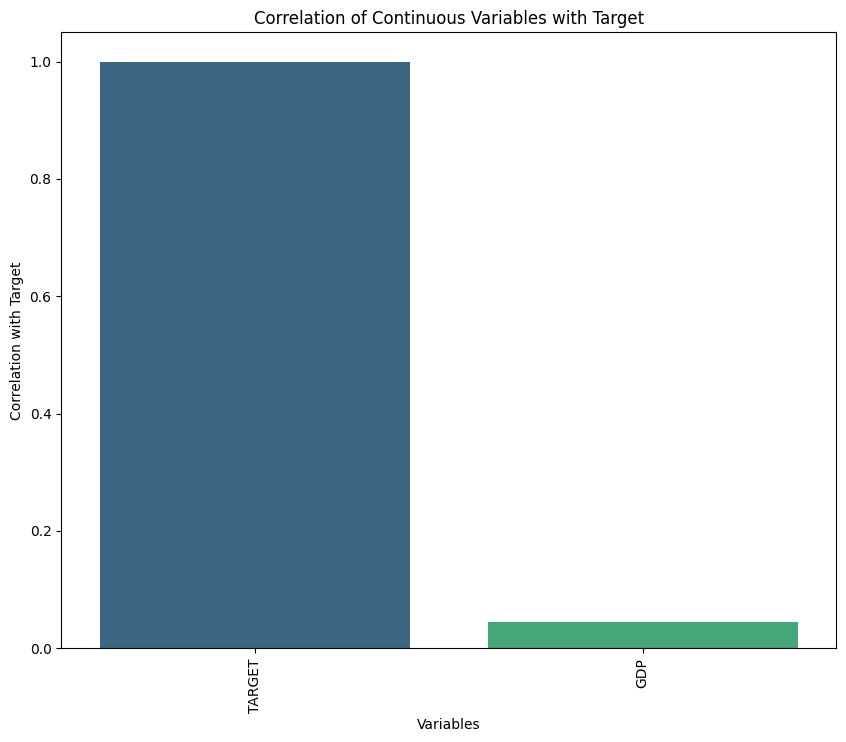

In [55]:
#  Bivariate Analysis (correlations with target)

from sklearn.preprocessing import LabelEncoder

# Ensure the column names are in uppercase and match the DataFrame
data.columns = data.columns.str.upper()
continuous_columns_upper = [col.upper() for col in continuous_columns]

# Check if all columns in continuous_columns_upper are present in the DataFrame
missing_columns = [col for col in continuous_columns_upper if col not in data.columns]
if missing_columns:
	print(f"Missing columns in the DataFrame: {missing_columns}")
	# Remove missing columns from the list
	continuous_columns_upper = [col for col in continuous_columns_upper if col in data.columns]

# Encode the target variable
label_encoder = LabelEncoder()
data['TARGET'] = label_encoder.fit_transform(data['TARGET'])

# Calculate the correlation matrix for continuous variables with the target variable
correlation_with_target = data[continuous_columns_upper + ['TARGET']].corr()['TARGET'].sort_values(ascending=False)

# Display the correlation values
print("Correlation of continuous variables with the target variable:")
print(correlation_with_target)

# Plot the correlation values
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.title('Correlation of Continuous Variables with Target')
plt.xlabel('Variables')
plt.ylabel('Correlation with Target')
plt.xticks(rotation=90)
plt.show()

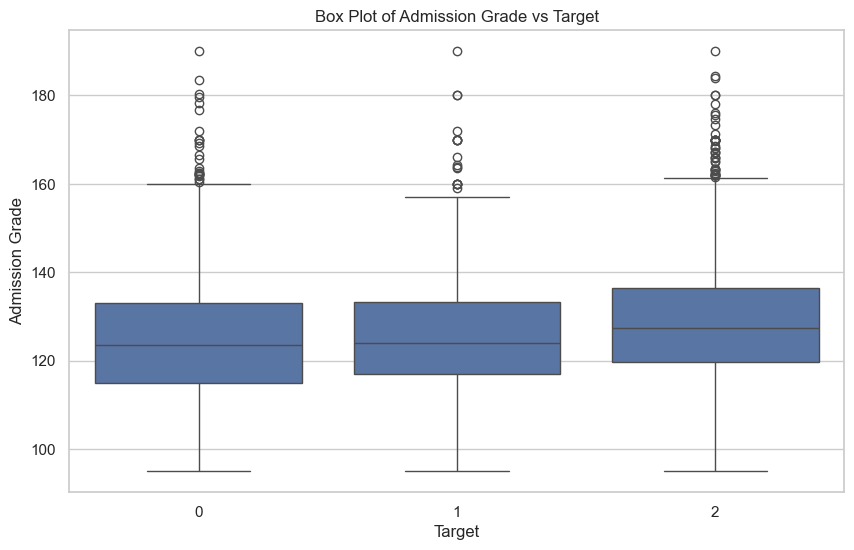

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a box plot for Admission Grade vs Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='ADMISSION GRADE', data=data)
plt.title('Box Plot of Admission Grade vs Target')
plt.xlabel('Target')
plt.ylabel('Admission Grade')
plt.show()

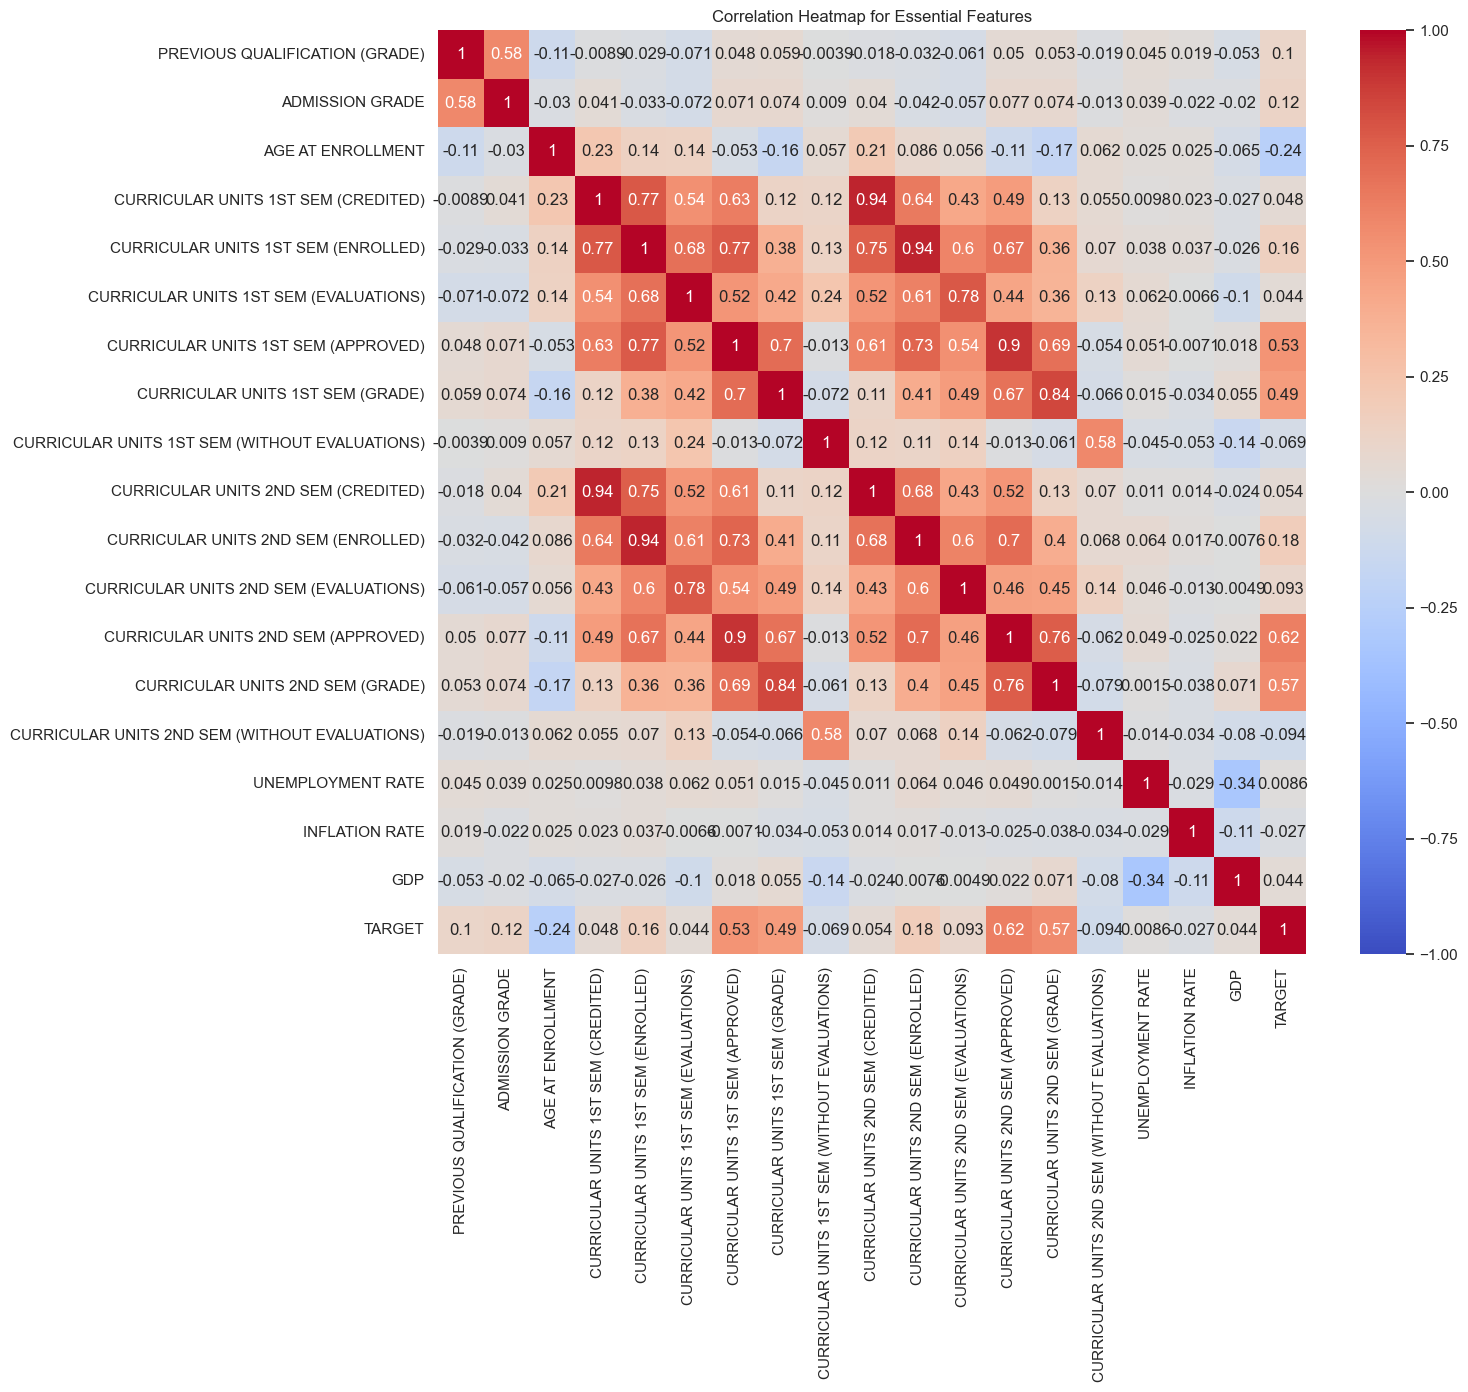

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the essential features
essential_features = [
    'PREVIOUS QUALIFICATION (GRADE)', 'ADMISSION GRADE', 'AGE AT ENROLLMENT',
    'CURRICULAR UNITS 1ST SEM (CREDITED)', 'CURRICULAR UNITS 1ST SEM (ENROLLED)',
    'CURRICULAR UNITS 1ST SEM (EVALUATIONS)', 'CURRICULAR UNITS 1ST SEM (APPROVED)',
    'CURRICULAR UNITS 1ST SEM (GRADE)', 'CURRICULAR UNITS 1ST SEM (WITHOUT EVALUATIONS)',
    'CURRICULAR UNITS 2ND SEM (CREDITED)', 'CURRICULAR UNITS 2ND SEM (ENROLLED)',
    'CURRICULAR UNITS 2ND SEM (EVALUATIONS)', 'CURRICULAR UNITS 2ND SEM (APPROVED)',
    'CURRICULAR UNITS 2ND SEM (GRADE)', 'CURRICULAR UNITS 2ND SEM (WITHOUT EVALUATIONS)',
    'UNEMPLOYMENT RATE', 'INFLATION RATE', 'GDP', 'TARGET'
]

# Calculate the correlation matrix for the essential features
correlation_matrix_essential = data[essential_features].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_essential, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Essential Features')
plt.show()

### Graphs etc

# Feature Engineering

In [ ]:
# Create new features based on existing data

# 1. Calculate the total number of curricular units enrolled in both semesters
data['TOTAL_UNITS_ENROLLED'] = data['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] + data['CURRICULAR_UNITS_2ND_SEM_ENROLLED']

# 2. Calculate the total number of curricular units approved in both semesters
data['TOTAL_UNITS_APPROVED'] = data['CURRICULAR_UNITS_1ST_SEM_APPROVED'] + data['CURRICULAR_UNITS_2ND_SEM_APPROVED']

# 3. Calculate the total number of curricular units without evaluations in both semesters
data['TOTAL_UNITS_WITHOUT_EVALUATIONS'] = data['CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS'] + data['CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS']

# 4. Calculate the approval rate for both semesters
data['APPROVAL_RATE'] = np.where(
    data['TOTAL_UNITS_ENROLLED'] == 0,
    0,  # Set to 0 to avoid divide by zero error
    data['TOTAL_UNITS_APPROVED'] / data['TOTAL_UNITS_ENROLLED'] * 100
)

# 5. Calculate the change in grade between the first and second semesters
data['GRADE_CHANGE'] = data['CURRICULAR_UNITS_2ND_SEM_GRADE'] - data['CURRICULAR_UNITS_1ST_SEM_GRADE']

# 6. Create a binary feature indicating whether the student is a dropout
data['IS_DROPOUT'] = (data['TARGET'] == 'Dropout').astype(int)

# Display the first few rows of the updated dataframe
print(data.head())

   MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   

   DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   
5                           0                      19   

   PREVIOUS_QUALIFICATION_GRADE  NATIONALITY  MOTHER_QUALIFICATION  \
1                         160.0            1                     1   
2                         122.0            1                    37   
3                         122.0            1      

In [74]:
# Calculate the average grades for the first and second semesters
data['AVG_GRADE_1ST_SEM'] = data['CURRICULAR UNITS 1ST SEM (GRADE)']
data['AVG_GRADE_2ND_SEM'] = data['CURRICULAR UNITS 2ND SEM (GRADE)']

# Display the first few rows of the updated dataframe
print(data[['AVG_GRADE_1ST_SEM', 'AVG_GRADE_2ND_SEM']].head())

   AVG_GRADE_1ST_SEM  AVG_GRADE_2ND_SEM
0           0.000000           0.000000
1          14.000000          13.666667
2           0.000000           0.000000
3          13.428571          12.400000
4          12.333333          13.000000


In [ ]:
# Check for negative values in the grade columns
negative_grades_1st_sem = data[data['CURRICULAR_UNITS_1ST_SEM_GRADE'] < 0]
negative_grades_2nd_sem = data[data['CURRICULAR_UNITS_2ND_SEM_GRADE'] < 0]

# Check for negative values in the approved units columns
negative_units_1st_sem = data[data['CURRICULAR_UNITS_1ST_SEM_APPROVED'] < 0]
negative_units_2nd_sem = data[data['CURRICULAR_UNITS_2ND_SEM_APPROVED'] < 0]

print("Negative values in 1st semester grades:\n", negative_grades_1st_sem)
print("Negative values in 2nd semester grades:\n", negative_grades_2nd_sem)
print("Negative values in 1st semester approved units:\n", negative_units_1st_sem)
print("Negative values in 2nd semester approved units:\n", negative_units_2nd_sem)

Negative values in 1st semester grades:
       MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
2                0.0               0.0                4.0     4.0   
7                0.0               8.0                3.0    10.0   
12               0.0               0.0                1.0    15.0   
13               0.0              16.0                0.0    10.0   
35               0.0              11.0                0.0     0.0   
...              ...               ...                ...     ...   
4381             0.0               0.0                1.0     9.0   
4384             1.0               0.0                0.0     9.0   
4385             0.0               0.0                0.0     9.0   
4400             1.0              11.0                0.0    16.0   
4404             1.0              11.0                0.0     7.0   

      DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
2                            1.0                     0.0   
7         

In [ ]:
# Create new features for aggregated performance metrics

# 1. Calculate the overall academic performance score by averaging the first and second semester grades
data['OVERALL_GRADE'] = (data['CURRICULAR_UNITS_1ST_SEM_GRADE'] + data['CURRICULAR_UNITS_2ND_SEM_GRADE']) / 2

# 2. Calculate the total approved curricular units across both semesters
data['TOTAL_UNITS_APPROVED'] = data['CURRICULAR_UNITS_1ST_SEM_APPROVED'] + data['CURRICULAR_UNITS_2ND_SEM_APPROVED']

# Display the first few rows of the updated dataframe
print(data[['OVERALL_GRADE', 'TOTAL_UNITS_APPROVED']].head())

   OVERALL_GRADE  TOTAL_UNITS_APPROVED
1       0.638293              0.833791
2      -2.353668             -3.212068
3       0.443324              0.492838
4       0.380798              0.500434
5       0.172649              0.159481


In [ ]:
# TODO: drop row 2 (the one giving negative values or 0)

In [ ]:
# Create new features for aggregated performance metrics

# 1. Calculate the overall academic performance score by averaging the first and second semester grades
data['OVERALL_GRADE'] = (data['CURRICULAR_UNITS_1ST_SEM_GRADE'] + data['CURRICULAR_UNITS_2ND_SEM_GRADE']) / 2

# 2. Calculate the total approved curricular units across both semesters
data['TOTAL_UNITS_APPROVED'] = data['CURRICULAR_UNITS_1ST_SEM_APPROVED'] + data['CURRICULAR_UNITS_2ND_SEM_APPROVED']

# Ensure no negative values
data['OVERALL_GRADE'] = data['OVERALL_GRADE'].abs()
data['TOTAL_UNITS_APPROVED'] = data['TOTAL_UNITS_APPROVED'].abs()

# Display the first few rows of the updated dataframe
print(data[['OVERALL_GRADE', 'TOTAL_UNITS_APPROVED']].head())

   OVERALL_GRADE  TOTAL_UNITS_APPROVED
1       0.638293              0.833791
2       0.000000              0.000000
3       0.443324              0.492838
4       0.380798              0.500434
5       0.172649              0.159481


In [ ]:
# Calculate the pass rate for each student
data['PASS_RATE'] = np.where(
    data['TOTAL_UNITS_ENROLLED'] == 0,
    0,  # Set to 0 to avoid divide by zero error
    data['TOTAL_UNITS_APPROVED'] / data['TOTAL_UNITS_ENROLLED'] * 100
)

# Display the first few rows of the updated dataframe
print(data[['TOTAL_UNITS_ENROLLED', 'TOTAL_UNITS_APPROVED', 'PASS_RATE']].head())

   TOTAL_UNITS_ENROLLED  TOTAL_UNITS_APPROVED  PASS_RATE
1                    12              0.833791   6.948256
2                    12              0.000000   0.000000
3                    12              0.492838   4.106980
4                    12              0.500434   4.170285
5                    10              0.159481   1.594810


In [ ]:
# Create new features based on economic variables

# 1. Calculate the ratio of Unemployment Rate to GDP
data['UNEMPLOYMENT_GDP_RATIO'] = data['UNEMPLOYMENT_RATE'] / data['GDP']

# 2. Calculate the difference between Unemployment Rate and Inflation Rate
data['UNEMPLOYMENT_INFLATION_DIFF'] = data['UNEMPLOYMENT_RATE'] - data['INFLATION_RATE']

# Display the first few rows of the updated dataframe
print(data[['UNEMPLOYMENT_RATE', 'GDP', 'INFLATION_RATE', 'UNEMPLOYMENT_GDP_RATIO', 'UNEMPLOYMENT_INFLATION_DIFF']].head())

   UNEMPLOYMENT_RATE       GDP  INFLATION_RATE  UNEMPLOYMENT_GDP_RATIO  \
1           0.878221  0.338406       -1.110024                2.595169   
2          -0.285651  0.756406        0.124081               -0.377643   
3          -0.811271 -1.381994       -1.472996                0.587029   
4           0.878221  0.338406       -1.110024                2.595169   
5           1.741740 -0.413994       -0.674457               -4.207160   

   UNEMPLOYMENT_INFLATION_DIFF  
1                     1.988245  
2                    -0.409732  
3                     0.661724  
4                     1.988245  
5                     2.416197  


In [ ]:
# encoding categorical variables

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoders = {}

# Encode categorical columns in the data
for column in categorical_columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Display the first few rows of the updated dataframe
print(data.head())

   MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   

   DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   
5                           0                      19   

   PREVIOUS_QUALIFICATION_GRADE  NATIONALITY  MOTHER_QUALIFICATION  \
1                         160.0            1                     1   
2                         122.0            1                    37   
3                         122.0            1      

In [ ]:
# Define X by dropping the 'TARGET' column from data
X = data.drop(columns=['TARGET'])

# Ensure 'TARGET' is not in categorical_columns
categorical_columns = [col for col in categorical_columns if col != 'TARGET']

# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Display the first few rows of the encoded dataframe
print(X_encoded.head())

   PREVIOUS_QUALIFICATION_GRADE  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
1                      2.115714         1.112932          -0.572387   
2                     -0.794391        -0.126551          -0.572387   
3                     -0.794391        -0.490692          -0.442232   
4                     -2.479189         1.042904           2.811642   
5                      0.055666        -0.826823           3.462417   

   CURRICULAR_UNITS_1ST_SEM_CREDITED  CURRICULAR_UNITS_1ST_SEM_ENROLLED  \
1                          -0.307717                          -0.248211   
2                          -0.307717                          -0.248211   
3                          -0.307717                          -0.248211   
4                          -0.307717                          -0.248211   
5                          -0.307717                          -0.710841   

   CURRICULAR_UNITS_1ST_SEM_EVALUATIONS  CURRICULAR_UNITS_1ST_SEM_APPROVED  \
1                             -0.680952     

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical columns
data[categorical_columns] = ordinal_encoder.fit_transform(data[categorical_columns])

# Display the first few rows of the updated dataframe
print(data.head())

   MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
1             0.0               5.0                0.0    10.0   
2             0.0               0.0                4.0     4.0   
3             0.0               7.0                1.0    14.0   
4             1.0              11.0                0.0     2.0   
5             1.0              11.0                0.0    16.0   

   DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
1                         1.0                     0.0   
2                         1.0                     0.0   
3                         1.0                     0.0   
4                         0.0                     0.0   
5                         0.0                    11.0   

   PREVIOUS_QUALIFICATION_GRADE  NATIONALITY  MOTHER_QUALIFICATION  \
1                      2.115714          0.0                   0.0   
2                     -0.794391          0.0                  21.0   
3                     -0.794391          0.0      

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the continuous features
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

# Display the first few rows of the scaled dataframe
print(data.head())

   MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   

   DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   
5                           0                      19   

   PREVIOUS_QUALIFICATION_GRADE  NATIONALITY  MOTHER_QUALIFICATION  \
1                      2.115714            1                     1   
2                     -0.794391            1                    37   
3                     -0.794391            1      

## 5) Experiments

In [ ]:
# Try under sampling the data to level the imbalanced target

from imblearn.under_sampling import RandomUnderSampler

# Split features and target
X = data.drop(columns=['TARGET'])
y = data['TARGET']

# Apply undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Create a balanced dataset
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['TARGET'] = y_resampled

# Print class distribution
print("Original class distribution:\n", y.value_counts())
print("New class distribution after undersampling:\n", y_resampled.value_counts())

Original class distribution:
 TARGET
Graduate    2134
Dropout     1344
Enrolled     766
Name: count, dtype: int64
New class distribution after undersampling:
 TARGET
Dropout     766
Enrolled    766
Graduate    766
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# SMOTE 

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Create a balanced dataset
balanced_data_smote = pd.DataFrame(X_smote, columns=X.columns)
balanced_data_smote['TARGET'] = y_smote

# Print class distribution
print("Original class distribution:\n", y.value_counts())
print("New class distribution after SMOTE:\n", y_smote.value_counts())

Original class distribution:
 TARGET
Graduate    2134
Dropout     1344
Enrolled     766
Name: count, dtype: int64
New class distribution after SMOTE:
 TARGET
Graduate    2134
Dropout     2134
Enrolled    2134
Name: count, dtype: int64


In [ ]:
# define a utility function to display the index against the column name

def print_column_indexes(title, data):
    # print the index of each column of a dataframe
    if isinstance(data, pd.DataFrame) and not data.empty:
        print("Contents of " + title + ":")
        for idx, col in enumerate(data.columns):
            print(f"Index {idx}: {col}")
    # else print the index of each column of an index
    elif isinstance(data, pd.Index) and not data.empty:
        print("Contents of " + title + ":")
        for idx, col in enumerate(data):
            print(f"Index {idx}: {col}")
    # else assume no data
    else:
        print(title + " is empty")

In [ ]:
def run_chi_square_tests_against_target(data, columns, target_column="TARGET" ):
    results = []  
    
    for col in columns:
        if (col != target_column):  # skip the target_column itself
            # Create a contingency table
            ct = pd.crosstab(data[col], data[target_column])
        
            # Chi-Square Test
            chi2, p, fr, ex = st.chi2_contingency(ct)
        
            if (p <= 0.05):
                relation = "Related"
            else:
                relation = "Not Related"


            # Store results
            results.append({"Column": col, "Chi-Square": chi2, "P-value": p, "Result": relation})
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by p-value (ascending)
    results_df = results_df.sort_values(by="P-value", ascending=True)
    
    return results_df

In [ ]:
# Perform Chi-Squared tests on each of the categorical columns to how dependant Target is on them
chi_results_table = run_chi_square_tests_against_target(data, categorical_columns, "TARGET")
chi_results_table

Column  Chi-Square        P-value       Result
14     TUITION_FEES_UP_TO_DATE  807.250736  5.101876e-176      Related
3                       COURSE  560.113058   9.749804e-98      Related
16          SCHOLARSHIP_HOLDER  402.312967   4.353608e-88      Related
18     AGE_GROUP_AT_ENROLLMENT  398.182886   6.872626e-83      Related
1             APPLICATION_MODE  470.481740   3.091870e-78      Related
13                      DEBTOR  251.147448   2.910882e-55      Related
15                      GENDER  238.037257   2.045815e-52      Related
9            MOTHER_OCCUPATION  301.061083   4.228094e-33      Related
5       PREVIOUS_QUALIFICATION  220.686059   4.635128e-30      Related
7         MOTHER_QUALIFICATION  213.061696   3.666417e-20      Related
10           FATHER_OCCUPATION  266.871976   2.034002e-19      Related
8         FATHER_QUALIFICATION  219.403740   2.351395e-18      Related
11                   DISPLACED   60.780531   6.333960e-14      Related
0               MARITAL_STATUS   66.413560   2.172834e-10      Related
2            APPLICATION_ORDER   65.984314   1.792162e-09      Related
4   DAYTIME/EVENING_ATTENDANCE   31.609155   1.368230e-07      Related
6                  NATIONALITY   45.699474   2.472954e-01  Not Related
17               INTERNATIONAL    2.252968   3.241711e-01  Not Related
12   EDUCATIONAL_SPECIAL_NEEDS    0.562144   7.549738e-01  Not Related

In [ ]:
# Now try on the balanced data
chi_results_table = run_chi_square_tests_against_target(balanced_data, categorical_columns, "TARGET")
chi_results_table

Column  Chi-Square       P-value       Result
14     TUITION_FEES_UP_TO_DATE  402.897127  3.250876e-88      Related
16          SCHOLARSHIP_HOLDER  233.475385  2.002001e-51      Related
3                       COURSE  281.430305  1.110063e-41      Related
18     AGE_GROUP_AT_ENROLLMENT  205.505771  1.276438e-41      Related
1             APPLICATION_MODE  247.267175  5.726726e-37      Related
9            MOTHER_OCCUPATION  230.322008  8.747455e-22      Related
13                      DEBTOR   96.194663  1.292987e-21      Related
15                      GENDER   94.812444  2.580711e-21      Related
7         MOTHER_QUALIFICATION  175.771803  4.678517e-17      Related
5       PREVIOUS_QUALIFICATION  134.354370  3.676733e-15      Related
8         FATHER_QUALIFICATION  147.077437  1.713141e-11      Related
10           FATHER_OCCUPATION  184.423733  2.113404e-11      Related
11                   DISPLACED   24.560137  4.643379e-06      Related
2            APPLICATION_ORDER   34.955511  4.760097e-04      Related
0               MARITAL_STATUS   30.122987  8.178436e-04      Related
4   DAYTIME/EVENING_ATTENDANCE   13.386662  1.239148e-03      Related
12   EDUCATIONAL_SPECIAL_NEEDS    5.418953  6.657165e-02  Not Related
17               INTERNATIONAL    2.050870  3.586404e-01  Not Related
6                  NATIONALITY   28.092537  5.655329e-01  Not Related

In [ ]:
# Try creating a feature which is just binary between dropout and not dropped out. (So graduate and enrolled are combined )
data_vis["DROPOUT_FLAG"] = (data_vis["TARGET"] == "Dropout").astype(int)

# and Chi-Square test against that flag
# Perform Chi-Squared tests on each of the categorical columns to how dependant Target is on them
chi_results_table2 = run_chi_square_tests_against_target(data_vis, categorical_columns, "DROPOUT_FLAG")
chi_results_table2

Column   Chi-Square        P-value       Result
18                      TARGET  4244.000000   0.000000e+00      Related
14     TUITION_FEES_UP_TO_DATE   795.148198  6.122577e-175      Related
19     AGE_GROUP_AT_ENROLLMENT   355.403925   1.008176e-76      Related
1             APPLICATION_MODE   407.290412   5.540971e-76      Related
16          SCHOLARSHIP_HOLDER   261.007400   1.034972e-58      Related
3                       COURSE   301.665216   1.152815e-54      Related
13                      DEBTOR   223.509594   1.551953e-50      Related
15                      GENDER   185.148190   3.642897e-42      Related
5       PREVIOUS_QUALIFICATION   203.175239   1.807951e-34      Related
9            MOTHER_OCCUPATION   208.994512   2.714699e-28      Related
7         MOTHER_QUALIFICATION   183.014938   1.069356e-24      Related
8         FATHER_QUALIFICATION   181.527040   1.970328e-22      Related
10           FATHER_OCCUPATION   171.422135   1.209533e-16      Related
11                   DISPLACED    53.823786   2.193017e-13      Related
0               MARITAL_STATUS    62.438728   3.804496e-12      Related
4   DAYTIME/EVENING_ATTENDANCE    30.950970   2.646297e-08      Related
2            APPLICATION_ORDER    37.563442   1.367127e-06      Related
17               INTERNATIONAL     0.895934   3.438743e-01  Not Related
6                  NATIONALITY    17.412138   6.260724e-01  Not Related
12   EDUCATIONAL_SPECIAL_NEEDS     0.000000   1.000000e+00  Not Related

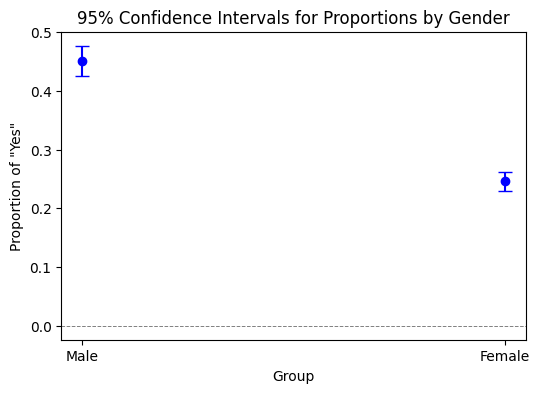

In [ ]:
# Advanced: Plot confidence intervals between Gender and Dropout flag

from statsmodels.stats.proportion import proportion_confint

# Create a contingency table between 'DROPOUT_FLAG' and 'GENDER'
contingency_table = pd.crosstab(data_vis['DROPOUT_FLAG'], data_vis['GENDER'])

# Calculate the number of 'Yes' and 'No' for each gender
yes_male = contingency_table.loc[1, 'male']
no_male = contingency_table.loc[0, 'male']
yes_female = contingency_table.loc[1, 'female']
no_female = contingency_table.loc[0, 'female']

# Total counts for males and females
total_male = yes_male + no_male
total_female = yes_female + no_female

# Calculate confidence intervals for proportions of 'Yes' for each gender
ci_male = proportion_confint(yes_male, total_male, alpha=0.05, method='normal')
ci_female = proportion_confint(yes_female, total_female, alpha=0.05, method='normal')

# Proportions
prop_male = yes_male / total_male
prop_female = yes_female / total_female

# Create a DataFrame for plotting
data_for_plot = pd.DataFrame({
    'Group': ['Male', 'Female'],
    'Proportion': [prop_male, prop_female],
    'CI Lower': [ci_male[0], ci_female[0]],
    'CI Upper': [ci_male[1], ci_female[1]]
})

# Plotting the confidence intervals
plt.figure(figsize=(6, 4))
plt.errorbar(data_for_plot['Group'], data_for_plot['Proportion'], 
             yerr=[data_for_plot['Proportion'] - data_for_plot['CI Lower'],
                   data_for_plot['CI Upper'] - data_for_plot['Proportion']], 
             fmt='o', capsize=5, color='blue', label='95% CI')

# Labels and title
plt.xlabel('Group')
plt.ylabel('Proportion of "Yes"')
plt.title('95% Confidence Intervals for Proportions by Gender')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.show()

In [124]:
import numpy as np

# Set the number of bootstrap iterations
n_bootstraps = 1000

# Use y_train_encoded as our sample data. (Replace with any numpy array of values)
data_array = y_train_encoded  

# Initialize arrays to store bootstrap estimates of the mean and median
boot_means = np.zeros(n_bootstraps)
boot_medians = np.zeros(n_bootstraps)

# Perform bootstrapping
for i in range(n_bootstraps):
    # Draw a bootstrap sample (with replacement) of the same size as data_array
    bootstrap_sample = np.random.choice(data_array, size=len(data_array), replace=True)
    # Compute the mean and median on the bootstrap sample
    boot_means[i] = np.mean(bootstrap_sample)
    boot_medians[i] = np.median(bootstrap_sample)

# Calculate the 95% confidence interval for the mean
ci_mean_lower = np.percentile(boot_means, 2.5)
ci_mean_upper = np.percentile(boot_means, 97.5)

# Calculate the 95% confidence interval for the median
ci_median_lower = np.percentile(boot_medians, 2.5)
ci_median_upper = np.percentile(boot_medians, 97.5)

print(f"Bootstrapped 95% Confidence Interval for the Mean: ({ci_mean_lower:.3f}, {ci_mean_upper:.3f})")
print(f"Bootstrapped 95% Confidence Interval for the Median: ({ci_median_lower:.3f}, {ci_median_upper:.3f})")

Bootstrapped 95% Confidence Interval for the Mean: (1.163, 1.219)
Bootstrapped 95% Confidence Interval for the Median: (1.000, 2.000)


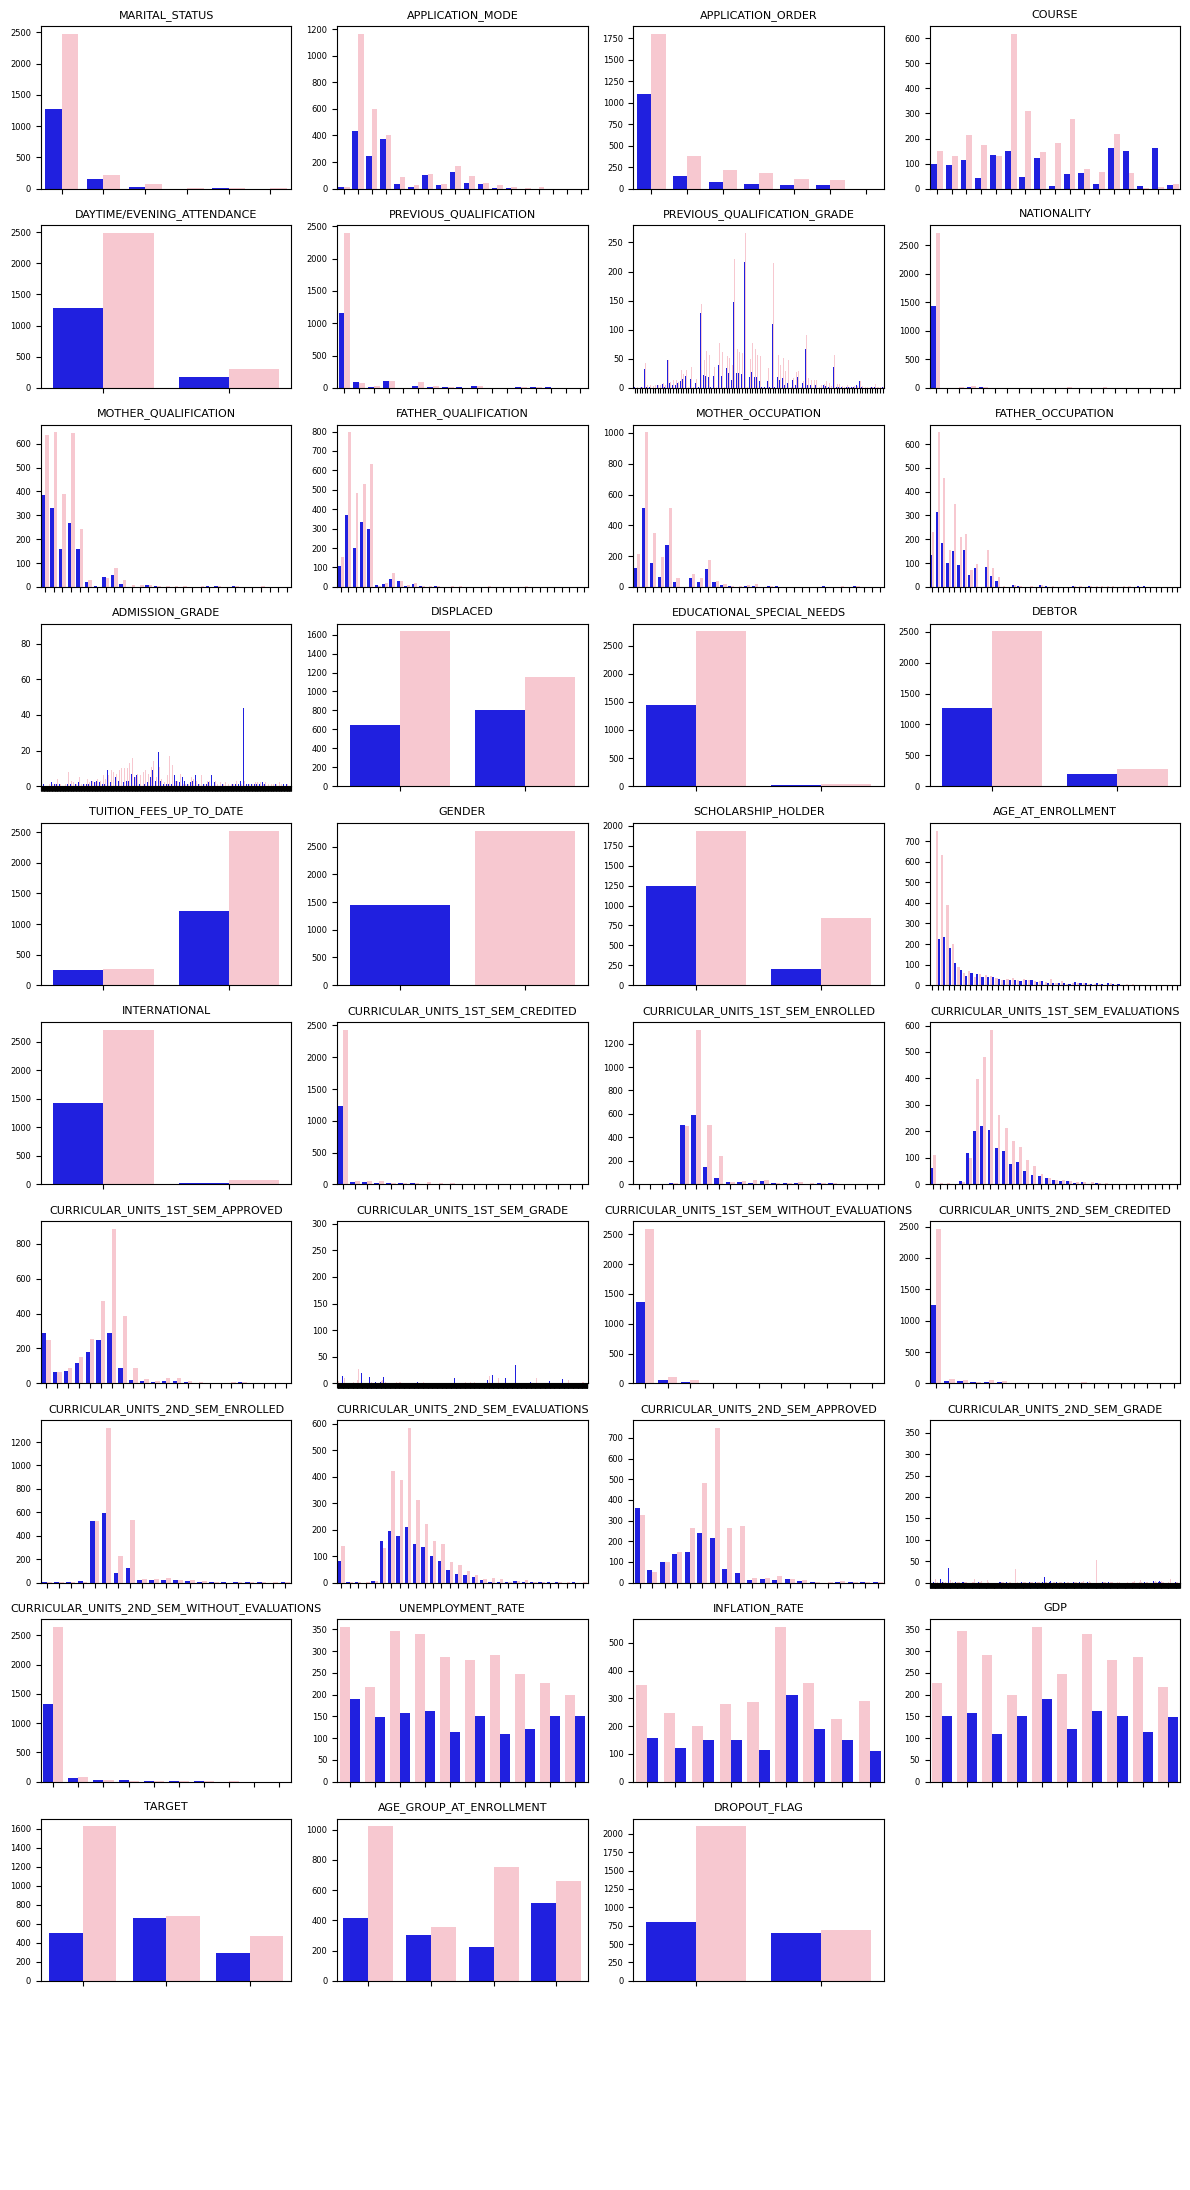

In [ ]:
# Create a grid of plots, 8 rows, 5 cols
nrows = 11
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 2*nrows))

#flatten the axs array
axs = axs.flatten()

# set colours for gender
gender_colours = {'female': 'pink', 'male': 'blue'}  # female is pink, male is blue

for i, col in enumerate(data_vis.columns):
    sns.countplot(x=data_vis[col], hue=data_vis['GENDER'], ax=axs[i], palette=gender_colours, legend=False)
    axs[i].set_title(col, fontsize=8)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_xticklabels([])  # Hide x-axis labels
    axs[i].tick_params(axis='y', labelsize=6)  # Reduce y-axis tick label font size

# Hide unused subplots
for i in range(len(data_vis.columns), nrows * ncols):
    axs[i].axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
# create columns that calculate how many enrolled units were not approved and the approval percentage
data_vis['1ST_SEM_NOT_APPROVED'] = data_vis['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] - data_vis['CURRICULAR_UNITS_1ST_SEM_APPROVED']
data_vis['1ST_SEM_NOT_APPROVAL_PERCENT'] = np.where(
    data_vis['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] == 0,
    0,  # Set to 0 to avoid divide by zero error
    data_vis['CURRICULAR_UNITS_1ST_SEM_APPROVED'] / data_vis['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] * 100)

data_vis['2ND_SEM_NOT_APPROVED'] = data_vis['CURRICULAR_UNITS_2ND_SEM_ENROLLED'] - data_vis['CURRICULAR_UNITS_2ND_SEM_APPROVED']
data_vis['2ND_SEM_NOT_APPROVAL_PERCENT'] = np.where(
    data_vis['CURRICULAR_UNITS_2ND_SEM_ENROLLED'] == 0,
    0,  # Set to 0 to avoid divide by zero error
    data_vis['CURRICULAR_UNITS_2ND_SEM_APPROVED'] / data_vis['CURRICULAR_UNITS_2ND_SEM_ENROLLED'] * 100)

# calculate the change in grade between semester 1 and 2
data_vis['GRADE_CHANGE'] = data_vis['CURRICULAR_UNITS_2ND_SEM_GRADE'] - data_vis['CURRICULAR_UNITS_1ST_SEM_GRADE']

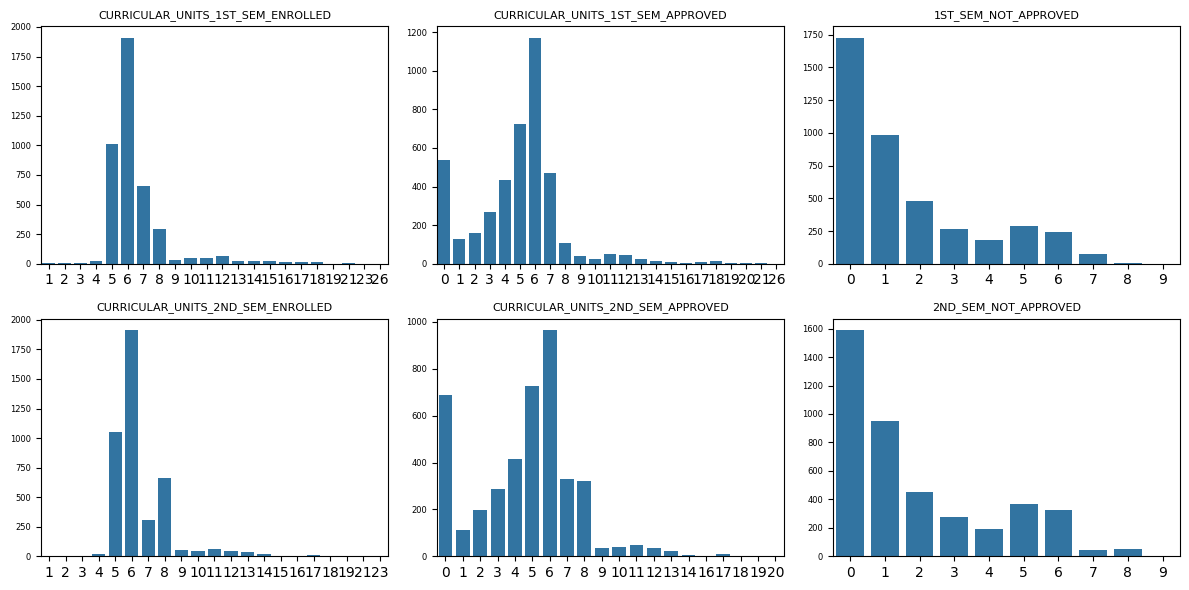

In [ ]:
# Subset of columns you're interested in
semCols = ['CURRICULAR_UNITS_1ST_SEM_ENROLLED', 'CURRICULAR_UNITS_1ST_SEM_APPROVED', '1ST_SEM_NOT_APPROVED',
                       'CURRICULAR_UNITS_2ND_SEM_ENROLLED', 'CURRICULAR_UNITS_2ND_SEM_APPROVED', '2ND_SEM_NOT_APPROVED']
dataSem = data_vis[semCols]

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

#flatten the axs array
axs = axs.flatten()

for i, col in enumerate(dataSem.columns):
    sns.countplot(x=dataSem[col], ax=axs[i], legend=False)
    axs[i].set_title(col, fontsize=8)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    #axs[i].set_xticklabels([])  # Hide x-axis labels
    axs[i].tick_params(axis='y', labelsize=6)  # Reduce y-axis tick label font size
    
plt.tight_layout()
plt.show()

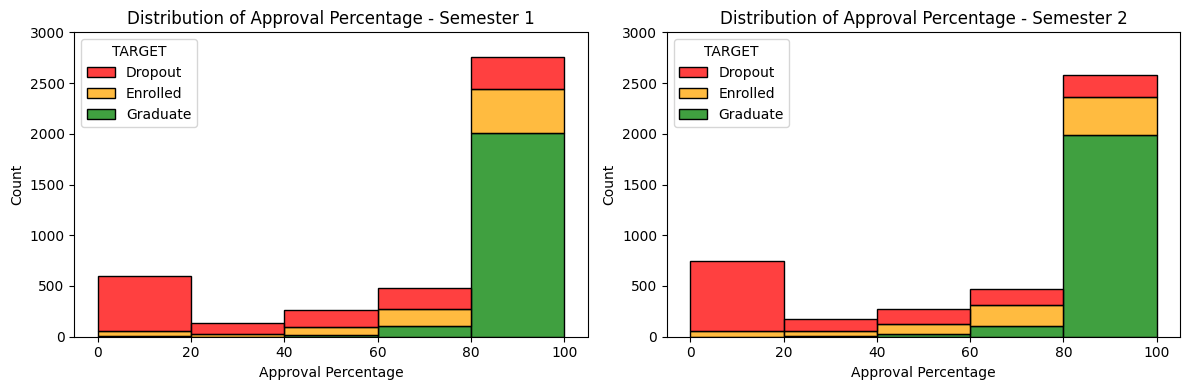

In [ ]:
target_palette = {
        'Dropout': 'red',      # Red for Dropout
        'Enrolled': 'orange',  # Orange for Enrolled
        'Graduate': 'green'    # Green for Graduate
}

# Define the display order for the Target categories
target_order = ['Dropout', 'Enrolled', 'Graduate']

# Create a figure with two subplots (side by side)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

sns.histplot(data=data_vis, x='1ST_SEM_NOT_APPROVAL_PERCENT', hue='TARGET', multiple='stack', bins=5, palette=target_palette, hue_order=target_order, ax=axs[0])
axs[0].set_title('Distribution of Approval Percentage - Semester 1')
axs[0].set_xlabel('Approval Percentage')
axs[0].set_ylabel('Count')
axs[0].set_ylim(0, 3000) # set axis limit to 3000 on both charts to make sure they line up

sns.histplot(data=data_vis, x='2ND_SEM_NOT_APPROVAL_PERCENT', hue='TARGET', multiple='stack', bins=5, palette=target_palette, hue_order=target_order, ax=axs[1])
axs[1].set_title('Distribution of Approval Percentage - Semester 2')
axs[1].set_xlabel('Approval Percentage')
axs[1].set_ylabel('Count')
axs[1].set_ylim(0, 3000) 

plt.tight_layout() 
plt.show()

In [ ]:
# Split the dataset into graduate and others
graduate_approval = data_vis[data_vis['TARGET'] == 'Graduate']['1ST_SEM_NOT_APPROVAL_PERCENT']
other_approval = data_vis[data_vis['TARGET'] != 'Graduate']['1ST_SEM_NOT_APPROVAL_PERCENT']

# T-test to compare the approval rates between graduate and others
t_stat, p_value = st.ttest_ind(graduate_approval, other_approval)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Calculate correlation
approval_correlation = data_vis['1ST_SEM_NOT_APPROVAL_PERCENT'].corr(data_vis['TARGET'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}))
print(f"Correlation between Semester 1 approval and graduate: {approval_correlation}")

T-statistic: 49.971934821636665, P-value: 0.0
Correlation between Semester 1 approval and graduate: 0.6788074213807872


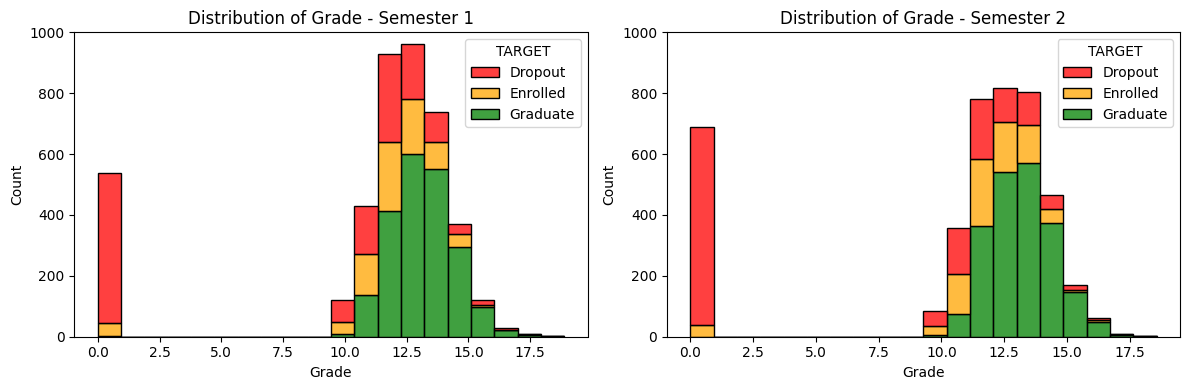

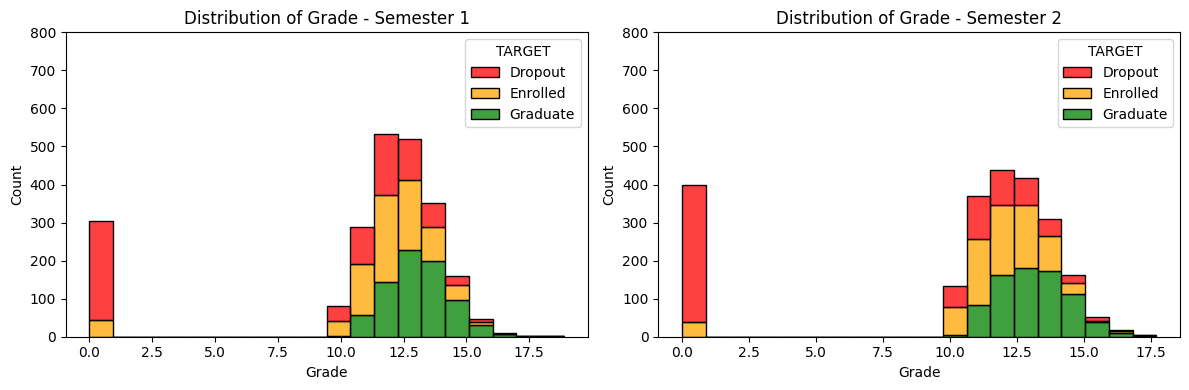

In [ ]:
def plot_distribution_of_grade( data, y_limit ):
    # Look in more detail about grade
    # Define the display order for the Target categories
    target_order = ['Dropout', 'Enrolled', 'Graduate']

    # Create a figure with two subplots (side by side)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(data=data, x='CURRICULAR_UNITS_1ST_SEM_GRADE', hue='TARGET', multiple='stack', bins=20, palette=target_palette, hue_order=target_order, ax=axs[0])
    axs[0].set_title('Distribution of Grade - Semester 1')
    axs[0].set_xlabel('Grade')
    axs[0].set_ylabel('Count')
    axs[0].set_ylim(0, y_limit) # set axis limit to y_limit on both charts to make sure they line up

    sns.histplot(data=data, x='CURRICULAR_UNITS_2ND_SEM_GRADE', hue='TARGET', multiple='stack', bins=20, palette=target_palette, hue_order=target_order, ax=axs[1])
    axs[1].set_title('Distribution of Grade - Semester 2')
    axs[1].set_xlabel('Grade')
    axs[1].set_ylabel('Count')
    axs[1].set_ylim(0, y_limit) 

    plt.tight_layout() 
    plt.show()

plot_distribution_of_grade( data, 1000 )
plot_distribution_of_grade( balanced_data, 800 )

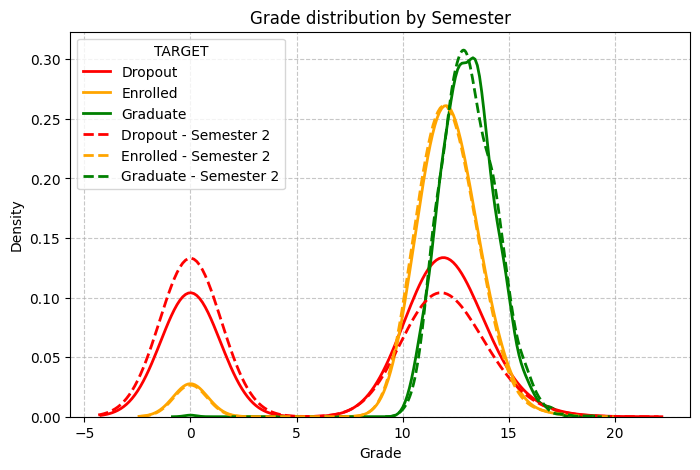

In [ ]:
plt.figure(figsize=(8,5))  # Set the figure size

# Loop through each target category and plot its line
for target, color in target_palette.items():
    subset = data_vis[data_vis['TARGET'] == target]  # Filter the data for the target category
    sns.kdeplot(
        data=subset, 
        x='CURRICULAR_UNITS_1ST_SEM_GRADE', 
        color=color, 
        label=target, 
        linewidth=2
    )

# Plot KDE for Semester 2 grades with dotted lines
for target, color in target_palette.items():
    subset = data_vis[data_vis['TARGET'] == target]  # Filter the data for the target category
    sns.kdeplot(
        data=subset, 
        x='CURRICULAR_UNITS_2ND_SEM_GRADE', 
        color=color, 
        linestyle='--',  # Dotted line
        label=f'{target} - Semester 2', 
        linewidth=2
    )    

plt.title('Grade distribution by Semester')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.legend(title='TARGET', loc='upper left')  # Add a legend in the top-left corner
plt.grid(True, linestyle='--', alpha=0.7)  # Optional: Add gridlines for better readability
plt.show()

Text(0, 0.5, 'Count')

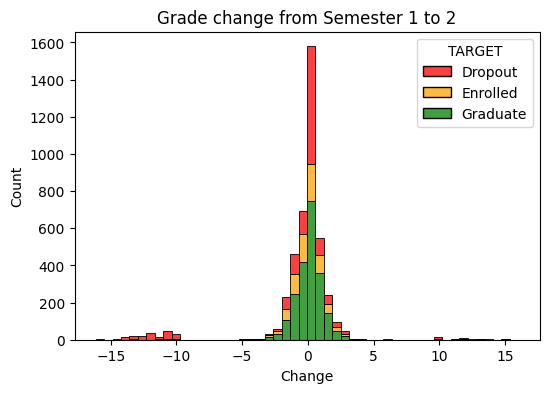

In [ ]:
plt.figure(figsize=(6, 4))  # Set the figure size
sns.histplot(data=data_vis, x='GRADE_CHANGE', hue='TARGET', multiple='stack', bins=50, palette=target_palette, hue_order=target_order)
plt.title('Grade change from Semester 1 to 2')
plt.xlabel('Change')
plt.ylabel('Count')
#axs[0].set_ylim(0, 3000) # set axis limit to 3000 on both charts to make sure they line up


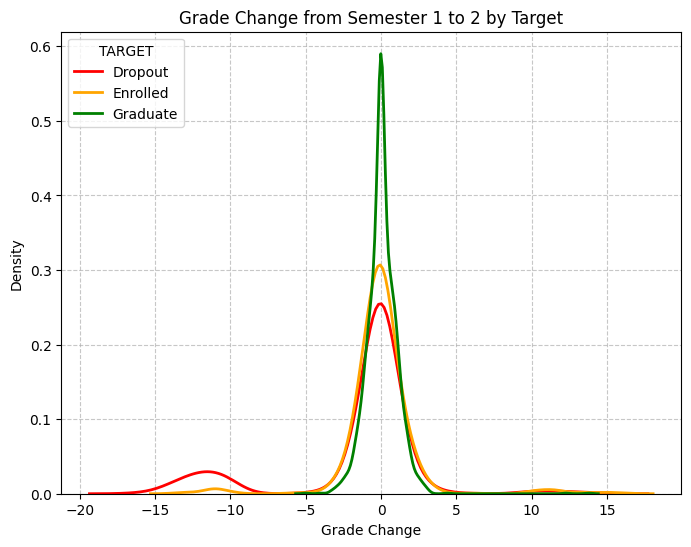

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Loop through each target category and plot its line
for target, color in target_palette.items():
    subset = data_vis[data_vis['TARGET'] == target]  # Filter the data for the target category
    sns.kdeplot(
        data=subset, 
        x='GRADE_CHANGE', 
        color=color, 
        label=target, 
        linewidth=2
    )

plt.title('Grade Change from Semester 1 to 2 by Target')
plt.xlabel('Grade Change')
plt.ylabel('Density')
plt.legend(title='TARGET', loc='upper left')  # Add a legend in the top-left corner
plt.grid(True, linestyle='--', alpha=0.7)  # Optional: Add gridlines for better readability
plt.show()

In [ ]:
# Now look at correlation for grade
# Split the dataset into graduate and others
graduate_grade = data_vis[data_vis['TARGET'] == 'Graduate']['CURRICULAR_UNITS_1ST_SEM_GRADE']
other_grade = data_vis[data_vis['TARGET'] != 'Graduate']['CURRICULAR_UNITS_1ST_SEM_GRADE']

# T-test to compare the grade between graduate and others
t_stat, p_value = st.ttest_ind(graduate_grade, other_grade)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Calculate correlation 
approval_correlation = data_vis['CURRICULAR_UNITS_1ST_SEM_GRADE'].corr(data_vis['TARGET'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}))
print(f"Correlation between Semester 1 grade and target: {approval_correlation}")

T-statistic: 33.296275597841316, P-value: 3.61433331268697e-216
Correlation between Semester 1 grade and target: 0.5341140860821387


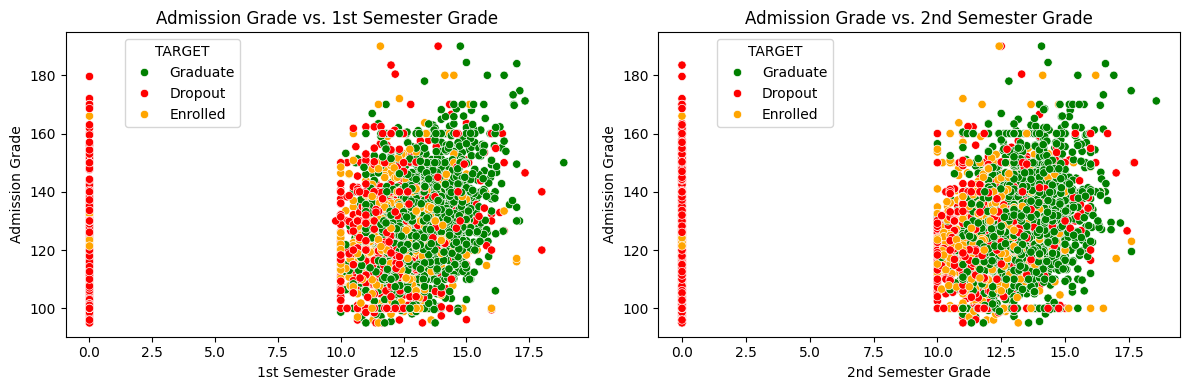

In [ ]:
# Create the scatter plot
# Create a figure with two subplots (side by side)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

sns.scatterplot(data=data_vis, x='CURRICULAR_UNITS_1ST_SEM_GRADE', y='ADMISSION_GRADE', hue='TARGET', palette=target_palette, ax=axs[0])
axs[0].set_title('Admission Grade vs. 1st Semester Grade')
axs[0].set_xlabel('1st Semester Grade')
axs[0].set_ylabel('Admission Grade')
axs[0].legend(title='TARGET', bbox_to_anchor=(0.1, 1.0))

sns.scatterplot(data=data_vis, x='CURRICULAR_UNITS_2ND_SEM_GRADE', y='ADMISSION_GRADE', hue='TARGET', palette=target_palette, ax=axs[1])
axs[1].set_title('Admission Grade vs. 2nd Semester Grade')
axs[1].set_xlabel('2nd Semester Grade')
axs[1].set_ylabel('Admission Grade')
axs[1].legend(title='TARGET', bbox_to_anchor=(0.1, 1.0))

plt.tight_layout() 
plt.show()

# Show the plot
#plt.legend(title='TARGET')


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Use data from data_vis for regression: 
# Use "AVG_GRADE_1ST_SEM" as x and "ADMISSION_GRADE" as y
df_reg = data_vis[['AVG_GRADE_1ST_SEM', 'ADMISSION_GRADE']].dropna()
x = df_reg['AVG_GRADE_1ST_SEM'].values
y = df_reg['ADMISSION_GRADE'].values

# For plotting the regression line and prediction interval, sort the data by x
sorted_idx = x.argsort()
x_sorted = x[sorted_idx]
y_sorted = y[sorted_idx]

# Fit regression model using statsmodels
X_sm = sm.add_constant(x_sorted)
model = sm.OLS(y_sorted, X_sm).fit()
pred = model.predict(X_sm)
pred_summary = model.get_prediction(X_sm).summary_frame(alpha=0.05)
ci_lower = pred_summary['obs_ci_lower']
ci_upper = pred_summary['obs_ci_upper']
std_errors = model.bse

# Plot scatter, regression line, and prediction interval
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Data')
plt.plot(x_sorted, pred, color='red', linewidth=2, label='Regression Line')
plt.fill_between(x_sorted, ci_lower, ci_upper, color='red', alpha=0.2, label='95% Prediction Interval')
plt.xlabel('1st Semester Grade')
plt.ylabel('Admission Grade')
plt.title('Regression Line with Prediction Interval')
plt.legend()
plt.show()

print("Standard Errors:", std_errors)

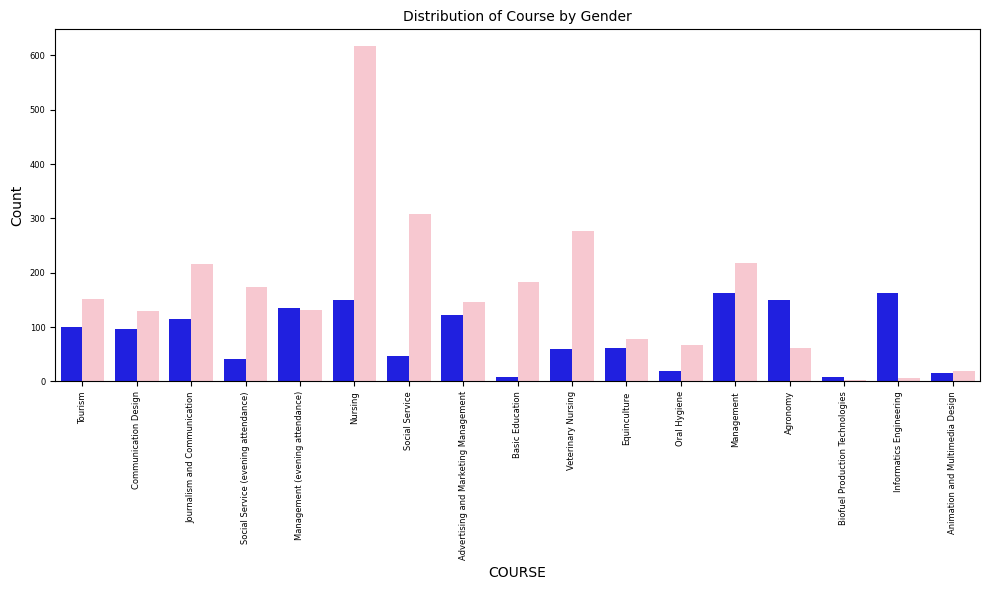

In [ ]:
# look at course in more details
# set colours for gender
gender_colours = {'female': 'pink', 'male': 'blue'}  # female/pink, male/blue
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x=data_vis['COURSE'], hue=data_vis['GENDER'], palette=gender_colours, legend=False)

plt.title('Distribution of Course by Gender', fontsize=10)
plt.ylabel('Count')
plt.tick_params(axis='y', labelsize=6)  # Reduce y-axis tick label font size
plt.tick_params(axis='x', labelsize=6)  # Reduce x-axis tick label font size
plt.xticks(rotation=90)  # Vertical x-axis labels

plt.tight_layout()
plt.show()

In [ ]:
def plot_course_split_by_target(data: pd.DataFrame): 
    target_palette = {
        'Dropout': 'red',      # Red for Dropout
        'Enrolled': 'orange',  # Orange for Enrolled
        'Graduate': 'green'    # Green for Graduate
    }

    # Define the display order for the Target categories
    target_order = ['Dropout', 'Enrolled', 'Graduate']
    
    plt.figure(figsize=(10, 7))  # Set the figure size
    sns.countplot(x=data['COURSE'], hue=data['TARGET'], palette=target_palette, hue_order=target_order)

    plt.title('Distribution of Course by Target', fontsize=10)
    plt.xticks(rotation=90)  # Vertical x-axis labels
    plt.ylabel('Count')
    plt.tick_params(axis='x', labelsize=6)  # Reduce x-axis tick label font size
    plt.tick_params(axis='y', labelsize=6)  # Reduce y-axis tick label font size

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_percent_course_split_by_target(data: pd.DataFrame): 
    target_palette = {
        'Dropout': 'red',      # Red for Dropout
        'Enrolled': 'orange',  # Orange for Enrolled
        'Graduate': 'green'    # Green for Graduate
    }

    # Define the display order for the Target categories
    target_order = ['Dropout', 'Enrolled', 'Graduate']

    # Calculate percentages
    grouped = data.groupby(['COURSE', 'TARGET']).size().unstack(fill_value=0)  # Group by Course and Target
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Convert to percentages

    # Reset index for Seaborn
    percentages = percentages.reset_index().melt(id_vars='COURSE', var_name='TARGET', value_name='Percentage')
    
    plt.figure(figsize=(10, 7))  # Set the figure size
    sns.barplot(x='COURSE', y='Percentage', hue='TARGET', data=percentages, palette=target_palette, hue_order=target_order)

    plt.title('Distribution of Course by Target (Percentage)', fontsize=10)
    plt.xticks(rotation=90)  # Vertical x-axis labels
    plt.ylabel('Percentage')
    plt.tick_params(axis='x', labelsize=6)  # Reduce x-axis tick label font size
    plt.tick_params(axis='y', labelsize=6)  # Reduce y-axis tick label font size

    plt.tight_layout()
    plt.show()

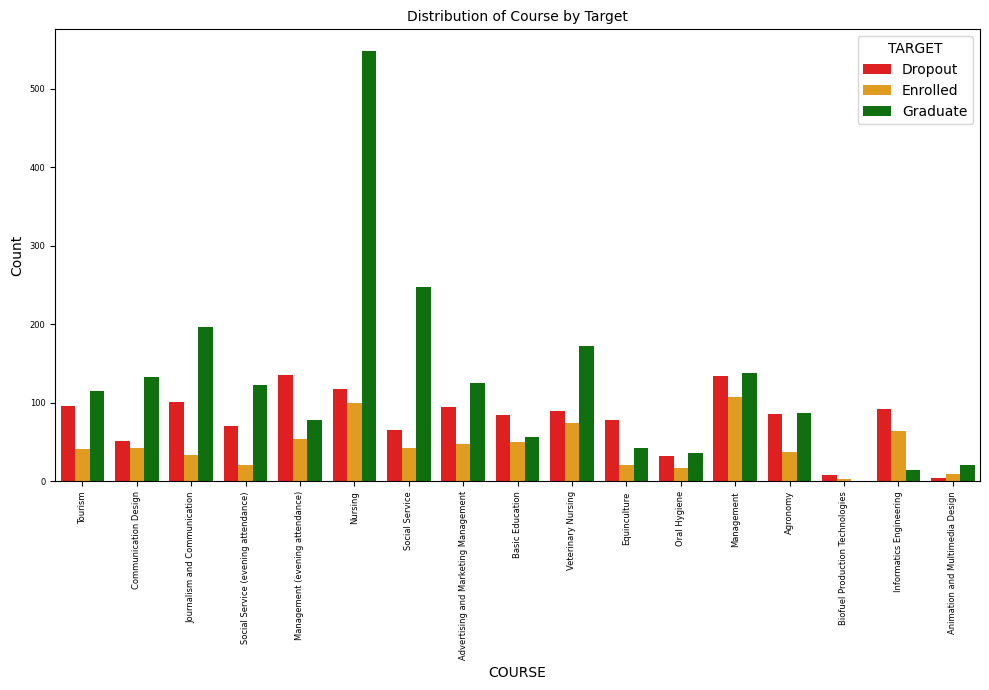

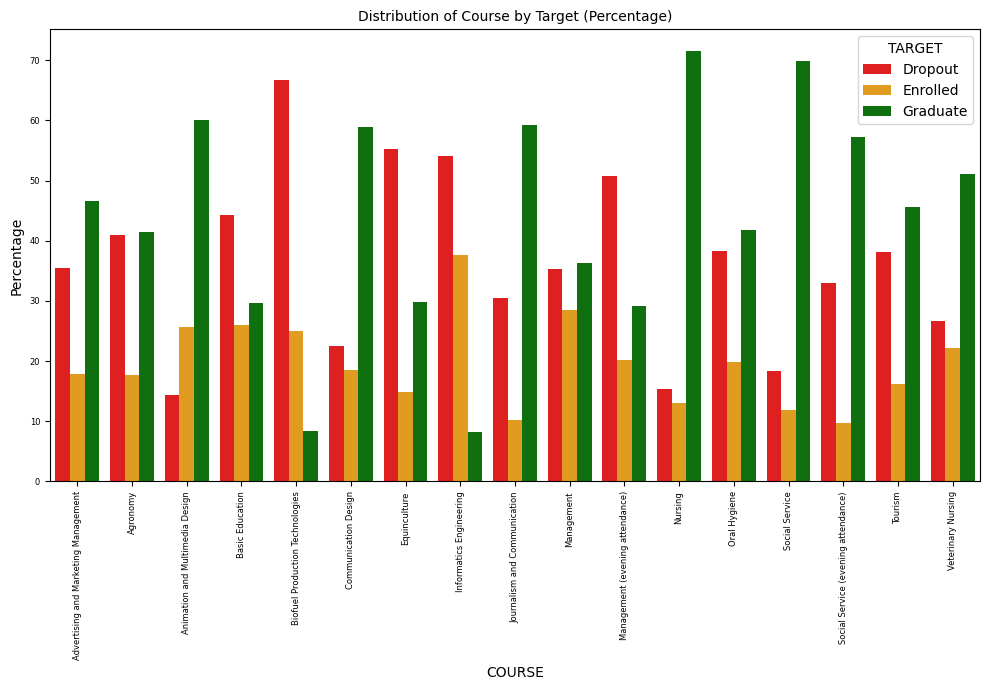

In [ ]:
plot_course_split_by_target(data_vis)
plot_percent_course_split_by_target(data_vis)

In [ ]:
# Split the data by gender
female_data = data_vis[data_vis['GENDER'] == 'female']  # Data for females
male_data = data_vis[data_vis['GENDER'] == 'male']    # Data for males

# Print the shapes of the split DataFrames
print(f"Female data shape: {female_data.shape}")
print(f"Male data shape: {male_data.shape}")

Female data shape: (2789, 44)
Male data shape: (1455, 44)


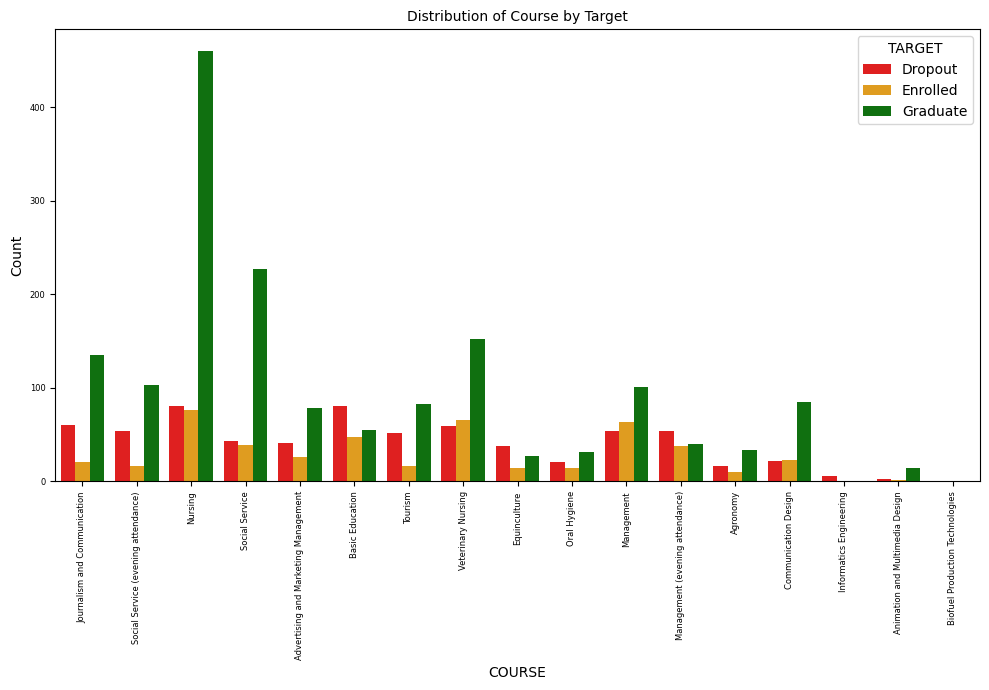

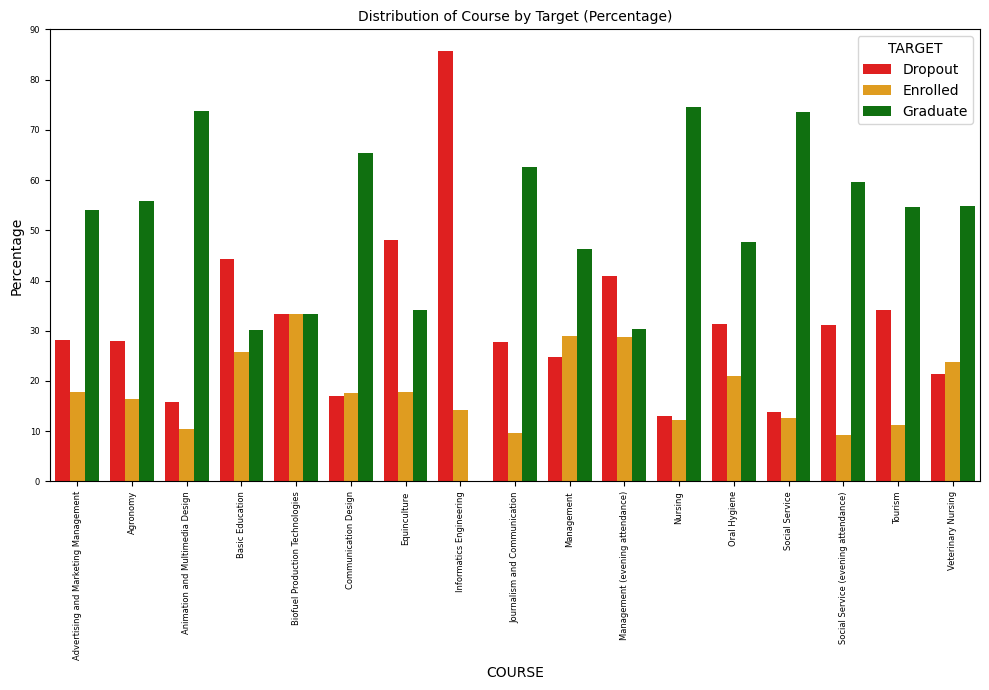

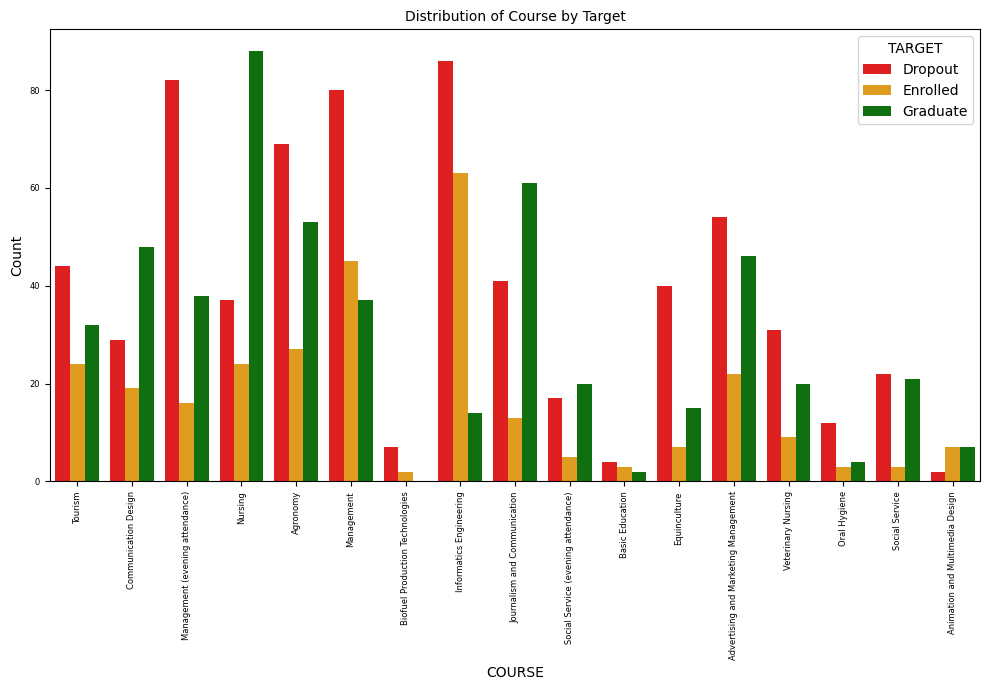

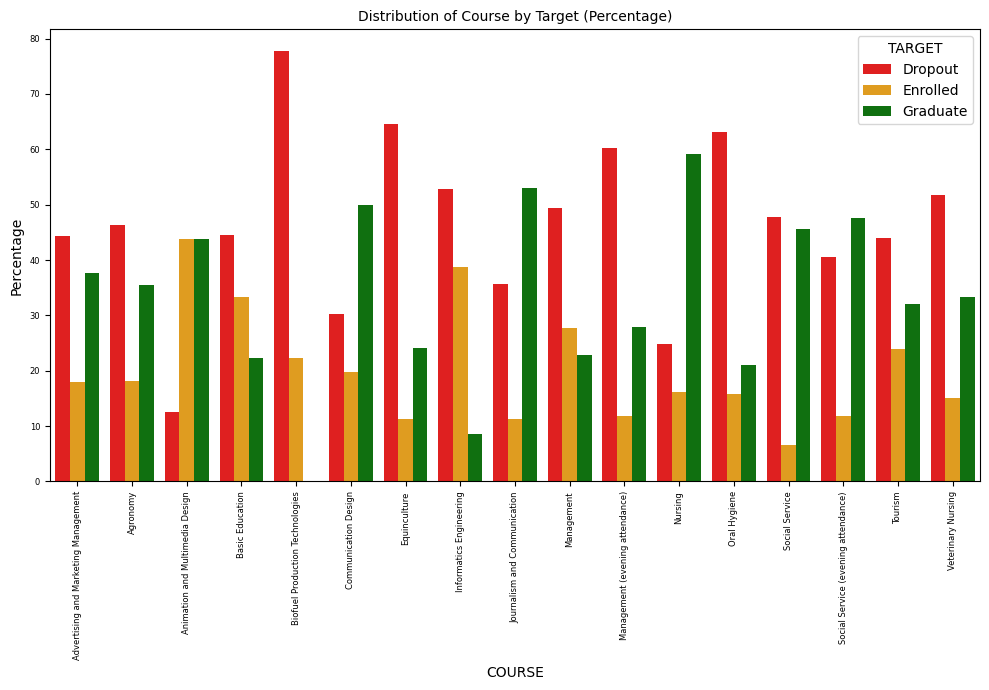

In [ ]:
plot_course_split_by_target(female_data)
plot_percent_course_split_by_target(female_data)
plot_course_split_by_target(male_data)
plot_percent_course_split_by_target(male_data)

In [ ]:
#TODO work out if dropout is more to do with gender or more to do with course.
#e.g. Course 9500 and 9238 has a lot of graduates but also has a lot of females.
# so perhaps rebase the graduation to dropout ratio per course based on the gender split
# so for each course, find percentage of graduates that were male and percentage of graduates that were female
# and same for enrolled and same for dropout

# TODO maybe a raw count of how many courses had more graduates than dropouts for females and for males.
# Heads towards the idea that regardless of course, the females are more likely to pass


In [ ]:
# Calculate the percentage of graduates, enrolled, and dropouts for each gender within each course
def calculate_percentage_by_gender_and_course(data):
    # Group by COURSE, GENDER, and TARGET
    grouped = data.groupby(['COURSE', 'GENDER', 'TARGET']).size().unstack(fill_value=0)
    
    # Calculate the total count for each COURSE and GENDER
    grouped['Total'] = grouped.sum(axis=1)
    
    # Calculate the percentage for each TARGET category
    grouped['Dropout_Percentage'] = (grouped['Dropout'] / grouped['Total']) * 100
    grouped['Enrolled_Percentage'] = (grouped['Enrolled'] / grouped['Total']) * 100
    grouped['Graduate_Percentage'] = (grouped['Graduate'] / grouped['Total']) * 100
    
    return grouped

# Apply the function to the data
percentage_by_gender_and_course = calculate_percentage_by_gender_and_course(data_vis)

# Display the result
print(percentage_by_gender_and_course[['Dropout_Percentage', 'Enrolled_Percentage', 'Graduate_Percentage']])

TARGET                                       Dropout_Percentage  \
COURSE                               GENDER                       
Advertising and Marketing Management female           28.082192   
                                     male             44.262295   
Agronomy                             female           27.868852   
                                     male             46.308725   
Animation and Multimedia Design      female           15.789474   
                                     male             12.500000   
Basic Education                      female           44.262295   
                                     male             44.444444   
Biofuel Production Technologies      female           33.333333   
                                     male             77.777778   
Communication Design                 female           16.923077   
                                     male             30.208333   
Equinculture                         female           48.10126

In [ ]:
# Calculate the raw count of courses with more graduates than dropouts for females and for males

# Group by COURSE, GENDER, then count the number of graduates and dropouts
grouped = data_vis.groupby(['COURSE', 'GENDER', 'TARGET']).size().unstack(fill_value=0)

# Calculate the number of courses with more graduates than dropouts for each gender
more_graduates_than_dropouts_female = (grouped.xs('female', level='GENDER')['Graduate'] > grouped.xs('female', level='GENDER')['Dropout']).sum()
more_graduates_than_dropouts_male = (grouped.xs('male', level='GENDER')['Graduate'] > grouped.xs('male', level='GENDER')['Dropout']).sum()

print(f"Number of courses with more graduates than dropouts for females: {more_graduates_than_dropouts_female}")
print(f"Number of courses with more graduates than dropouts for males: {more_graduates_than_dropouts_male}")

Number of courses with more graduates than dropouts for females: 12
Number of courses with more graduates than dropouts for males: 5


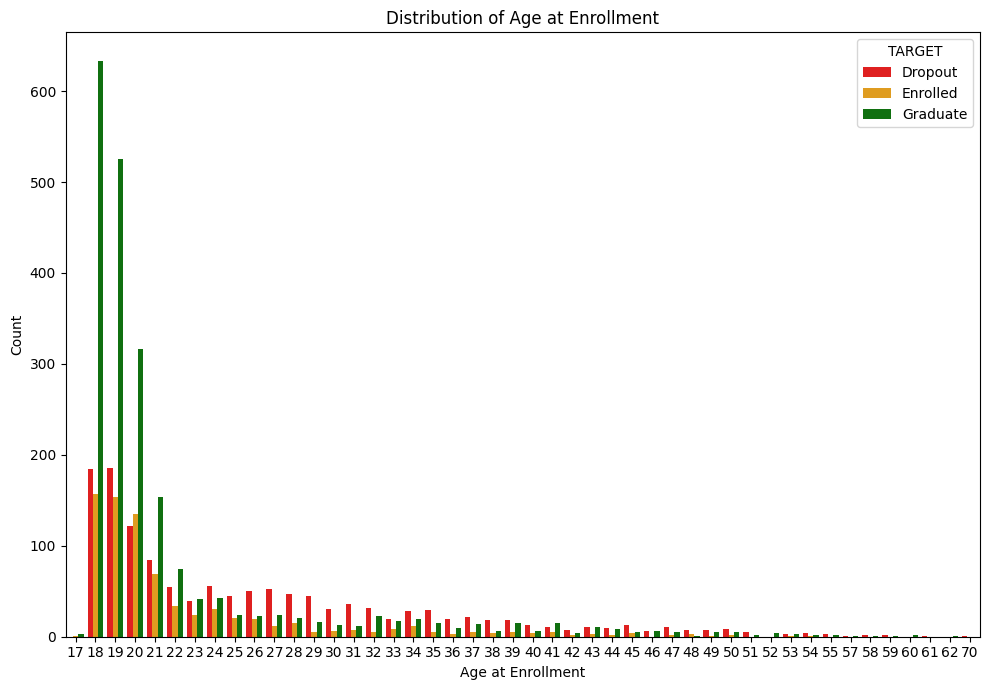

In [ ]:
# Target by Age At Enrollment
target_palette = {
        'Dropout': 'red',      # Red for Dropout
        'Enrolled': 'orange',  # Orange for Enrolled
        'Graduate': 'green'    # Green for Graduate
}

# Define the display order for the Target categories
target_order = ['Dropout', 'Enrolled', 'Graduate']

plt.figure(figsize=(10, 7))  # Set the figure size
sns.countplot(x='AGE_AT_ENROLLMENT', hue='TARGET', data=data_vis, palette=target_palette, hue_order=target_order)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
#axs[0].set_ylim(0, 3000) # set axis limit to 3000 on both charts to make sure they line up

plt.tight_layout() 
plt.show()

In [ ]:
# working area for AGE_GROUP_AT_ENROLLMENT settings

mean_age = data_vis['AGE_AT_ENROLLMENT'].mean()
median_age = data_vis['AGE_AT_ENROLLMENT'].median()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")

# Define the age groups
under_19 = (data_vis['AGE_AT_ENROLLMENT'] < 19).sum()
between_19_20 = ((data_vis['AGE_AT_ENROLLMENT'] >= 19) & (data_vis['AGE_AT_ENROLLMENT'] <= 20)).sum()
between_21_30 = ((data_vis['AGE_AT_ENROLLMENT'] >= 21) & (data_vis['AGE_AT_ENROLLMENT'] <= 30)).sum()
over_30 = (data_vis['AGE_AT_ENROLLMENT'] > 30).sum()

# Print the counts
print(f"Under 19: {under_19}")
print(f"19 to 20: {between_19_20}")
print(f"21 to 30: {between_21_30}")
print(f"Over 30: {over_30}")

Mean Age: 23.397737983034872
Median Age: 20.0
Under 19: 978
19 to 20: 1437
21 to 30: 1174
Over 30: 655


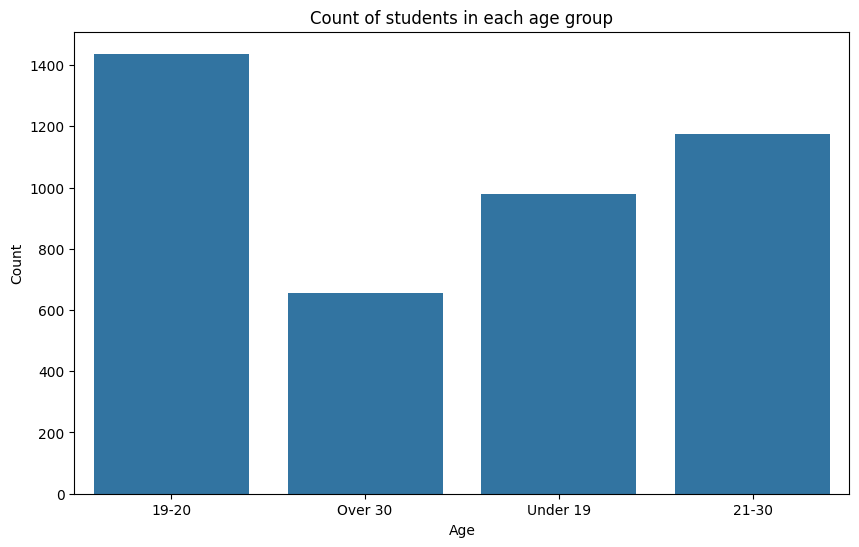

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='AGE_GROUP_AT_ENROLLMENT', data=data)

# Labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of students in each age group')

# Show the plot
plt.show()

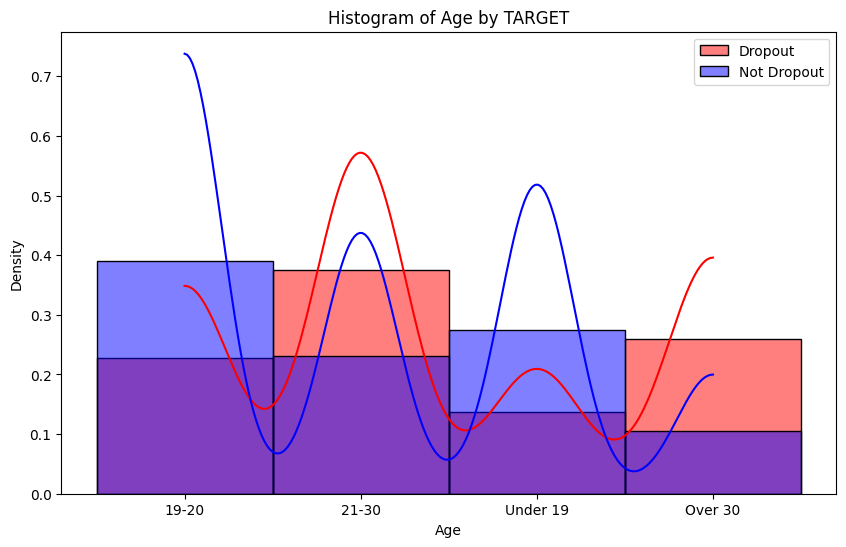

In [ ]:
dropout_age_group = data['AGE_GROUP_AT_ENROLLMENT'][data['TARGET'] == 'Dropout']
other_age_group = data['AGE_GROUP_AT_ENROLLMENT'][data['TARGET'] != 'Dropout']

# visually check the data for normality

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(dropout_age_group, kde=True, label='Dropout', color='red', bins=20, stat="density")
sns.histplot(other_age_group, kde=True, label='Not Dropout', color='blue', bins=20, stat="density")

# Labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Age by TARGET')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Additional Chi test
chi_results_table3 = run_chi_square_tests_against_target(data, ["AGE_GROUP_AT_ENROLLMENT"], "TARGET")
chi_results_table3

Column  Chi-Square       P-value   Result
0  AGE_GROUP_AT_ENROLLMENT  398.182886  6.872626e-83  Related

In [ ]:



# perform a t-test to see if Age at Enrollment is significantly related to Dropping out
dropout = data['AGE_AT_ENROLLMENT'][data['TARGET'] == 'Dropout']
other = data['AGE_AT_ENROLLMENT'][data['TARGET'] != 'Dropout']


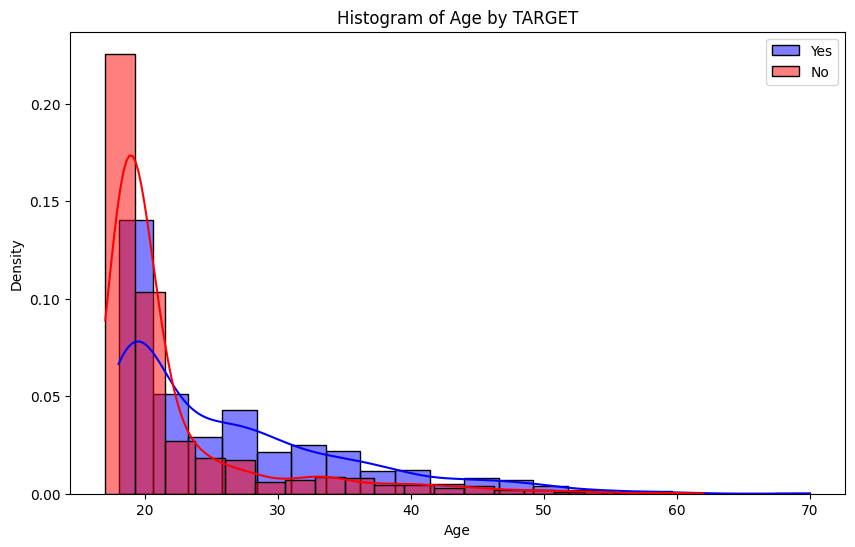

In [ ]:
# visually check the data for normality

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(dropout, kde=True, label='Yes', color='blue', bins=20, stat="density")
sns.histplot(other, kde=True, label='No', color='red', bins=20, stat="density")

# Labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Age by TARGET')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:

# Shapiro-Wilk Test for Normality
_, p_value_group1 = st.shapiro(dropout)
_, p_value_group2 = st.shapiro(other)

print(f"Group 1 Normality Test p-value: {p_value_group1}")
print(f"Group 2 Normality Test p-value: {p_value_group2}")

# Levene's Test for Equality of Variances
_, p_value = st.levene(dropout, other)
print(f"Levene's Test p-value: {p_value}")

if p_value < 0.05:
    print("The variances are significantly different. Consider using Welch's t-test.")
else:
    print("The variances are similar. You can proceed with the t-test.")

t_statistic, p_value = st.ttest_ind(dropout, other)

print(f"t_statistic: {t_statistic}")
print(f"p_value: {p_value}")

if p_value < 0.05:
    print("Significantly related")
else:
    print("Not Significantly related")

Group 1 Normality Test p-value: 6.378609338495223e-34
Group 2 Normality Test p-value: 3.6780508573762687e-62
Levene's Test p-value: 5.593884948658081e-49
The variances are significantly different. Consider using Welch's t-test.
t_statistic: 17.65484249159452
p_value: 2.2742635420558237e-67
Significantly related


In [ ]:
# As data isn't normally distributed, use a Mann-Whitney U test
stat, p_value = st.mannwhitneyu(dropout, other)
print(f"U-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("No significant difference between the two groups.")

U-statistic: 2637329.5, p-value: 1.4653203915307496e-78
There is a significant difference between the two groups.


In [116]:
# import numpy as np

# # p-hacking

# import scipy.stats as st

# # This only shows what p-hacking might look like.

# alpha = 0.05         # significance level
# max_attempts = 100   # maximum number of p-hacking attempts
# found_significant = False

# print("P-hacking demonstration: Trying different random subsamples to obtain a significant t-test result.\n")

# for attempt in range(max_attempts):
#     # Create a random subsample of 80% of the data (using a different seed each time)
#     sample = data_vis.sample(frac=0.8, random_state=attempt)
    
#     # Split the data into graduates and non-graduates based on 1st semester grade
#     # Using the correct grade column ('CURRICULAR_UNITS_1ST_SEM_GRADE') which must exist in the data.
#     grade_col = 'CURRICULAR_UNITS_1ST_SEM_GRADE'
#     group_grad = sample[sample['TARGET'] == 'Graduate'][grade_col]
#     group_other = sample[sample['TARGET'] != 'Graduate'][grade_col]

#     # Perform a two-sample t-test between the groups
#     t_stat, p_val = st.ttest_ind(group_grad, group_other, nan_policy='omit')

#     print(f"Attempt {attempt+1:3d}: p-value = {p_val:.4f}")

#     if p_val < alpha:
#         print("\nSignificant result (p-hacked):")
#         print(f"Attempt {attempt+1}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}\n")
#         found_significant = True
#         break

# if not found_significant:
#     print("\nNo significant p-value (< 0.05) was obtained after {} attempts.".format(max_attempts))

In [ ]:
# now do an ANOVA test for all three Target options
dropout_data = data['AGE_AT_ENROLLMENT'][data['TARGET'] == 'Dropout']
enrolled_data = data['AGE_AT_ENROLLMENT'][data['TARGET'] == 'Enrolled']
graduate_data = data['AGE_AT_ENROLLMENT'][data['TARGET'] == 'Graduate']

anova_result = st.f_oneway(dropout_data, enrolled_data, graduate_data)
print(anova_result) 

if anova_result.pvalue < 0.05:
    print("Significantly related")
else:
    print("Not Significantly related")

F_onewayResult(statistic=157.9995694618198, pvalue=6.573030631303049e-67)
Significantly related


In [121]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(y_pred_knn, y_pred_mlp, y_pred_voting, y_pred_xgb)

print(f"Kruskal-Wallis H-test statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between the predictions of the models.")
else:
    print("There is no significant difference between the predictions of the models.")

Kruskal-Wallis H-test statistic: 148.34961046818893
P-value: 5.980990638381136e-32
There is a significant difference between the predictions of the models.


In [ ]:
unique_count = data['DAYTIME/EVENING_ATTENDANCE'].nunique()

print(f"Number of unique values: {unique_count}")

Number of unique values: 2


In [ ]:


# Is there any correlation between course and target
contingency_table = pd.crosstab(data['DAYTIME/EVENING_ATTENDANCE'], data['TARGET'])
print(contingency_table)

TARGET                      Dropout  Enrolled  Graduate
DAYTIME/EVENING_ATTENDANCE                             
0                               207        75       201
1                              1137       691      1933


In [ ]:
# Perform Chi-Square test
chi2, p, dof, expected = st.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 31.60915491409512
P-value: 1.3682303559963448e-07


In [ ]:
n = np.sum(contingency_table.values)  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)))
print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.08630158159823063


In [ ]:

# Is there any correlation between gender and target
ct_gender_target = pd.crosstab(data['GENDER'], data['TARGET'])
print(ct_gender_target)
# Perform Chi-Square Test
chi2, p, dof, expected = st.chi2_contingency(ct_gender_target)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

TARGET  Dropout  Enrolled  Graduate
GENDER                             
0           687       474      1628
1           657       292       506
Chi-Square Statistic: 238.0372567778722
P-value: 2.0458154166207883e-52
Degrees of Freedom: 2
Expected Frequencies: [[ 883.2271442   503.38689915 1402.38595664]
 [ 460.7728558   262.61310085  731.61404336]]


In [ ]:
# Is there any correlation between course and target
ct_course_target = pd.crosstab(data['COURSE'], data['TARGET'])
print(ct_course_target)
# Perform Chi-Square Test
chi2, p, dof, expected = st.chi2_contingency(ct_course_target)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

TARGET  Dropout  Enrolled  Graduate
COURSE                             
33            8         3         1
171           5         9        21
8014         71        21       123
9003         86        37        87
9070         51        42       133
9085         90        75       172
9119         92        64        14
9130         78        21        42
9147        134       108       138
9238         65        42       248
9254         96        41       115
9500        118       100       548
9556         33        17        36
9670         95        48       125
9773        101        34       196
9853         85        50        57
9991        136        54        78
Chi-Square Statistic: 560.1130582746895
P-value: 9.749804450501862e-98
Degrees of Freedom: 32
Expected Frequencies: [[  3.8001885    2.16588124   6.03393025]
 [ 11.08388313   6.31715363  17.59896324]
 [ 68.08671065  38.80537229 108.10791706]
 [ 66.50329877  37.90292177 105.59377945]
 [ 71.57021678  40.79076343 113.

In [ ]:
data['Dropout_Flag'] = data['TARGET'].apply(lambda x: 'Dropout' if x == 'Dropout' else 'Other')

In [ ]:
# Is there any correlation between gender and dropout flag
ct_gender_target = pd.crosstab(data['GENDER'], data['Dropout_Flag'])
print(ct_gender_target)
# Perform Chi-Square Test
chi2, p, dof, expected = st.chi2_contingency(ct_gender_target)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Dropout_Flag  Dropout  Other
GENDER                      
0                 687   2102
1                 657    798
Chi-Square Statistic: 185.14818986935356
P-value: 3.642897318047374e-42
Degrees of Freedom: 1
Expected Frequencies: [[ 883.2271442 1905.7728558]
 [ 460.7728558  994.2271442]]


 # Additions

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
# Ensure all categorical variables are encoded
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9022379269729093
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       0.81      0.57      0.67       146
           2       0.87      0.95      0.91       426

    accuracy                           0.90       849
   macro avg       0.89      0.84      0.86       849
weighted avg       0.90      0.90      0.90       849

Confusion Matrix:
[[277   0   0]
 [  1  83  62]
 [  0  20 406]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Random Forest

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8287350338365435
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.90      0.78      0.83       643
    Enrolled       0.78      0.83      0.81       659
    Graduate       0.82      0.88      0.85       619

    accuracy                           0.83      1921
   macro avg       0.83      0.83      0.83      1921
weighted avg       0.83      0.83      0.83      1921



In [103]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the class distribution in the train and test sets
print("Class distribution in y_train:")
print(y_train.value_counts())
print("\nClass distribution in y_test:")
print(y_test.value_counts())

Class distribution in y_train:
Target
Graduate    1767
Dropout     1137
Enrolled     635
Name: count, dtype: int64

Class distribution in y_test:
Target
Graduate    442
Dropout     284
Enrolled    159
Name: count, dtype: int64


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define a function to evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("-" * 50)

# Evaluate KNN
evaluate_model(y_test_encoded, y_pred_knn, "KNN")

# Evaluate MLP
evaluate_model(y_test_encoded, y_pred_mlp, "MLP")

# Evaluate AdaBoost
evaluate_model(y_test_encoded, y_pred_proba_adaboost.argmax(axis=1), "AdaBoost")

# Evaluate Decision Tree
evaluate_model(y_test_encoded, y_pred_proba_dt.argmax(axis=1), "Decision Tree")

# Evaluate Voting Classifier
evaluate_model(y_test_encoded, y_pred_voting, "Voting Classifier")

# Evaluate XGBoost
evaluate_model(y_test_encoded, y_pred_xgb, "XGBoost")

Model: KNN
Accuracy: 0.6090
Precision: 0.5973
Recall: 0.6090
F1 Score: 0.5977

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.56      0.60       316
           1       0.36      0.26      0.31       151
           2       0.64      0.77      0.70       418

    accuracy                           0.61       885
   macro avg       0.55      0.53      0.54       885
weighted avg       0.60      0.61      0.60       885

--------------------------------------------------
Model: MLP
Accuracy: 0.6486
Precision: 0.7739
Recall: 0.6486
F1 Score: 0.5811

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.49      0.64       316
           1       1.00      0.01      0.03       151
           2       0.58      1.00      0.74       418

    accuracy                           0.65       885
   macro avg       0.83      0.50      0.47       885
weighted avg       0.77      0.65     

In [ ]:
import shap

# Ensure the model is trained
rf_classifier.fit(X_train, y_train)

# Initialize the SHAP explainer with the trained RandomForestClassifier model
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for the first class (e.g., 'Dropout')
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Plot the SHAP summary plot for all classes
shap.summary_plot(shap_values, X_test)

# Plot the SHAP dependence plot for a specific feature (e.g., 'AGE_AT_ENROLLMENT')
shap.dependence_plot("AGE_AT_ENROLLMENT", shap_values[1], X_test)

# Plot the SHAP force plot for a specific instance (e.g., the first instance in the test set)
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
from sklearn.metrics import f1_score

# F1 Score

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.8287813585087505


In [ ]:
# Columns related to the first year
first_year_columns = [
    'CURRICULAR_UNITS_1ST_SEM_CREDITED', 'CURRICULAR_UNITS_1ST_SEM_ENROLLED', 
    'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS', 'CURRICULAR_UNITS_1ST_SEM_APPROVED', 
    'CURRICULAR_UNITS_1ST_SEM_GRADE', 'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS'
]

# Columns related to the second year
second_year_columns = [
    'CURRICULAR_UNITS_2ND_SEM_CREDITED', 'CURRICULAR_UNITS_2ND_SEM_ENROLLED', 
    'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS', 'CURRICULAR_UNITS_2ND_SEM_APPROVED', 
    'CURRICULAR_UNITS_2ND_SEM_GRADE', 'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS'
]

# Create DataFrames for each half
first_year_data = data[first_year_columns]
second_year_data = data[second_year_columns]

# Display the first few rows of each DataFrame
print("First Year Data:")
print(first_year_data.head())

print("\nSecond Year Data:")
print(second_year_data.head())

First Year Data:
   CURRICULAR_UNITS_1ST_SEM_CREDITED  CURRICULAR_UNITS_1ST_SEM_ENROLLED  \
1                                  0                                  6   
2                                  0                                  6   
3                                  0                                  6   
4                                  0                                  6   
5                                  0                                  5   

   CURRICULAR_UNITS_1ST_SEM_EVALUATIONS  CURRICULAR_UNITS_1ST_SEM_APPROVED  \
1                                     6                                  6   
2                                     0                                  0   
3                                     8                                  6   
4                                     9                                  5   
5                                    10                                  5   

   CURRICULAR_UNITS_1ST_SEM_GRADE  \
1                       14

In [ ]:

import shap

# Initialize the SHAP explainer with the trained RandomForestClassifier
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for the first class (e.g., 'Dropout')
shap.summary_plot(shap_values[0], X_test, plot_type="bar")

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the Random Forest classifier
rfe = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['COURSE', 'PREVIOUS_QUALIFICATION_GRADE', 'ADMISSION_GRADE',
       'AGE_AT_ENROLLMENT', 'CURRICULAR_UNITS_1ST_SEM_APPROVED',
       'CURRICULAR_UNITS_1ST_SEM_GRADE',
       'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS',
       'CURRICULAR_UNITS_2ND_SEM_APPROVED', 'CURRICULAR_UNITS_2ND_SEM_GRADE',
       'GDP'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA

# Principal Component Analysis

# Initialize PCA with the number of components you want to keep
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Display the first few rows of the PCA DataFrame
print(pca_df.head())

Explained variance ratio: [0.99741121 0.0011874 ]
   Principal Component 1  Principal Component 2
0              28.951983             -13.674026
1            -154.976124              -2.128047
2             547.994165              -9.004794
3           -1211.031897              -0.499871
4             765.954760              -2.332416


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3395, 37)
X_test shape: (849, 37)
y_train shape: (3395,)
y_test shape: (849,)


Tree Based Methods

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize the classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
ada_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifiers
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
ada_classifier.fit(X_train, y_train)
bagging_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_ada = ada_classifier.predict(X_test)
y_pred_bagging = bagging_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the classifiers
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))

# Print classification reports
print("\nDecision Tree Classifier Report:\n", classification_report(y_test, y_pred_dt))
print("\nRandom Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))
print("\nAdaBoost Classifier Report:\n", classification_report(y_test, y_pred_ada))
print("\nBagging Classifier Report:\n", classification_report(y_test, y_pred_bagging))
print("\nGradient Boosting Classifier Report:\n", classification_report(y_test, y_pred_gb))

# Print confusion matrices
print("\nDecision Tree Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nRandom Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nAdaBoost Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("\nBagging Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("\nGradient Boosting Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Decision Tree Classifier Accuracy: 0.8680800942285041
Random Forest Classifier Accuracy: 0.9022379269729093
AdaBoost Classifier Accuracy: 0.8692579505300353
Bagging Classifier Accuracy: 0.8857479387514723
Gradient Boosting Classifier Accuracy: 0.8939929328621908

Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       0.61      0.63      0.62       146
           2       0.87      0.86      0.87       426

    accuracy                           0.87       849
   macro avg       0.83      0.83      0.83       849
weighted avg       0.87      0.87      0.87       849


Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       0.81      0.57      0.67       146
           2       0.87      0.95      0.91       426

    accuracy                           0.90       849
   macro avg  

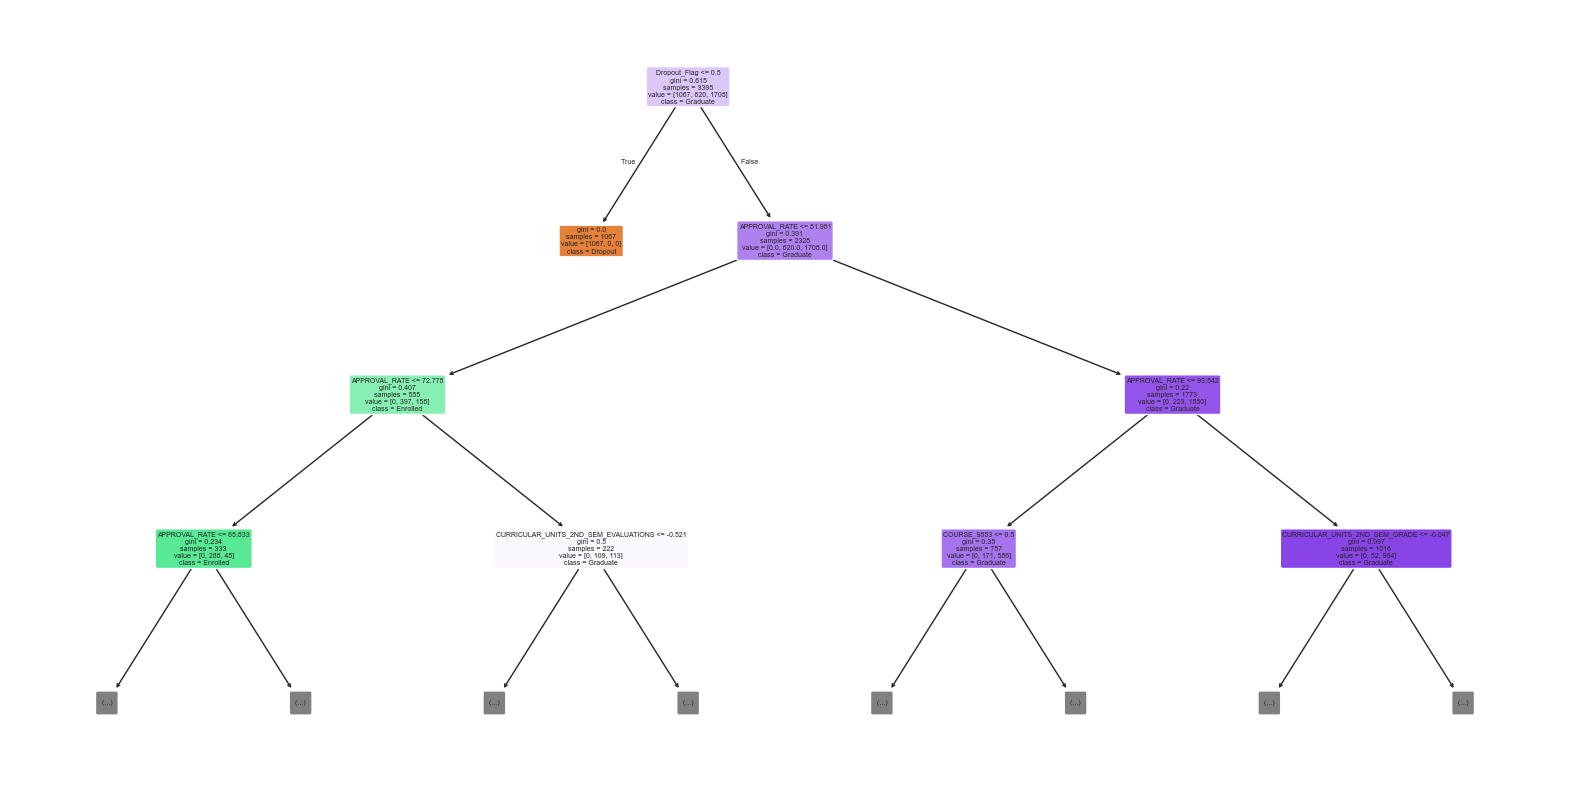

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Plot the decision tree with a limited depth
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, max_depth=3, filled=True, feature_names=X_train.columns, class_names=['Dropout', 'Enrolled', 'Graduate'], rounded=True)
plt.show()


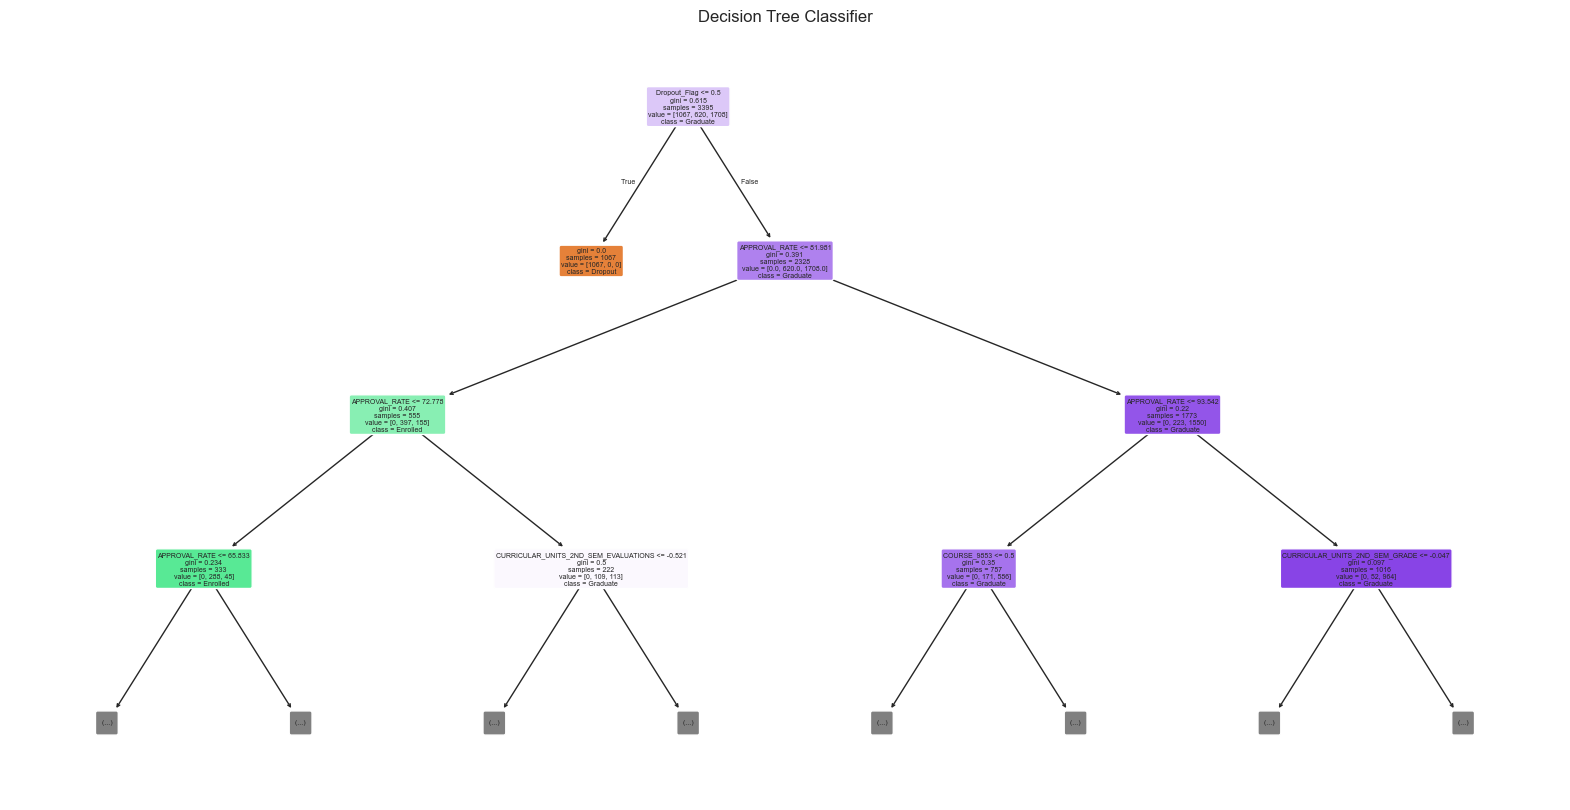

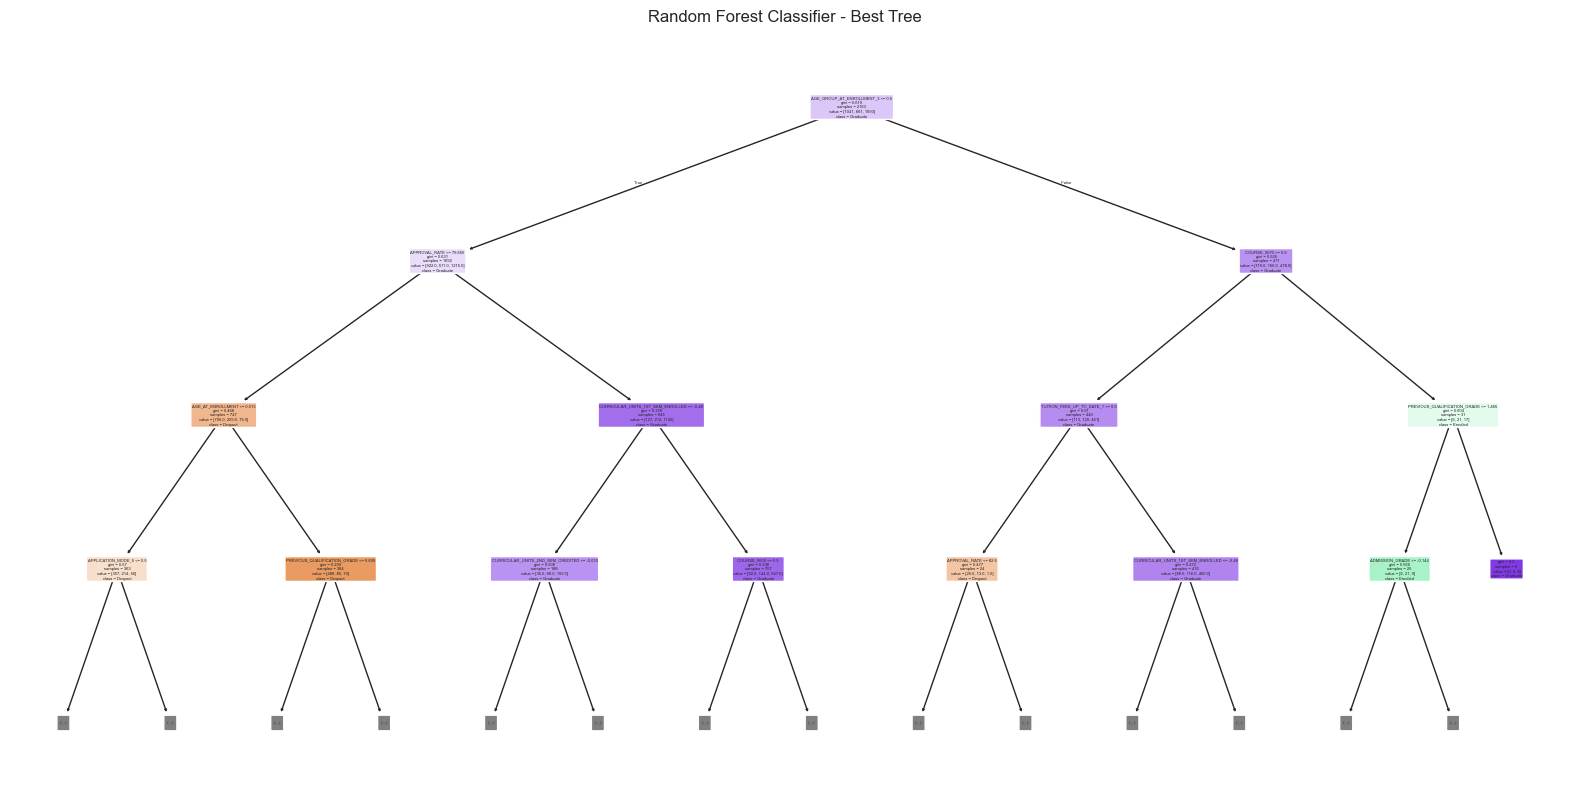

In [ ]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Plot the decision tree for the best DecisionTreeClassifier model
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, max_depth=3, filled=True, feature_names=X_train.columns, class_names=['Dropout', 'Enrolled', 'Graduate'], rounded=True)
plt.title('Decision Tree Classifier')
plt.show()

# Plot the decision tree for the best RandomForestClassifier model
# Extract a single tree from the RandomForestClassifier
best_tree = rf_classifier.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(best_tree, max_depth=3, filled=True, feature_names=X_train.columns, class_names=['Dropout', 'Enrolled', 'Graduate'], rounded=True)
plt.title('Random Forest Classifier - Best Tree')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.6996466431095406
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.74      0.72      0.73       277
    Enrolled       0.37      0.38      0.38       146
    Graduate       0.79      0.79      0.79       426

    accuracy                           0.70       849
   macro avg       0.63      0.63      0.63       849
weighted avg       0.70      0.70      0.70       849



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN classifier with a specified number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.6160188457008245
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.61      0.60      0.60       277
    Enrolled       0.33      0.21      0.26       146
    Graduate       0.68      0.77      0.72       426

    accuracy                           0.62       849
   macro avg       0.54      0.53      0.53       849
weighted avg       0.59      0.62      0.60       849



In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Bagging with Decision Tree
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Classifier Report:\n", classification_report(y_test, y_pred_bagging))

# AdaBoost with Decision Tree
adaboost_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred_adaboost = adaboost_clf.predict(X_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("AdaBoost Classifier Report:\n", classification_report(y_test, y_pred_adaboost))

# Voting Classifier with Random Forest, KNN, and Decision Tree
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42))
], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classifier Report:\n", classification_report(y_test, y_pred_voting))

Bagging Classifier Accuracy: 0.7773851590106007
Bagging Classifier Report:
               precision    recall  f1-score   support

     Dropout       0.82      0.76      0.79       277
    Enrolled       0.54      0.41      0.47       146
    Graduate       0.81      0.91      0.86       426

    accuracy                           0.78       849
   macro avg       0.72      0.70      0.71       849
weighted avg       0.77      0.78      0.77       849

AdaBoost Classifier Accuracy: 0.7137809187279152
AdaBoost Classifier Report:
               precision    recall  f1-score   support

     Dropout       0.76      0.71      0.73       277
    Enrolled       0.41      0.45      0.43       146
    Graduate       0.80      0.81      0.80       426

    accuracy                           0.71       849
   macro avg       0.66      0.66      0.65       849
weighted avg       0.72      0.71      0.72       849



c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier Accuracy: 0.7714958775029447
Voting Classifier Report:
               precision    recall  f1-score   support

     Dropout       0.77      0.81      0.79       277
    Enrolled       0.59      0.33      0.42       146
    Graduate       0.80      0.90      0.85       426

    accuracy                           0.77       849
   macro avg       0.72      0.68      0.69       849
weighted avg       0.76      0.77      0.76       849



In [ ]:

from xgboost import XGBClassifier
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit the model
xgb_classifier.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
acc_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))


XGBoost Accuracy: 0.8412285268089537
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.85       643
           1       0.81      0.82      0.82       659
           2       0.83      0.90      0.86       619

    accuracy                           0.84      1921
   macro avg       0.84      0.84      0.84      1921
weighted avg       0.84      0.84      0.84      1921



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Fit the model
mlp_classifier.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

Accuracy: 0.6089517078916372
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.53      0.83      0.64       277
    Enrolled       0.28      0.21      0.24       146
    Graduate       0.85      0.60      0.70       426

    accuracy                           0.61       849
   macro avg       0.55      0.55      0.53       849
weighted avg       0.64      0.61      0.60       849



In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7543171114599686
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.79      0.75      0.77       407
    Enrolled       0.43      0.30      0.35       221
    Graduate       0.81      0.91      0.86       646

    accuracy                           0.75      1274
   macro avg       0.67      0.65      0.66      1274
weighted avg       0.73      0.75      0.74      1274



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# linear models

# Initialise the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Re-split the data to ensure consistent number of samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8485086342229199
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.96      0.94      0.95       407
    Enrolled       0.61      0.53      0.57       221
    Graduate       0.85      0.90      0.87       646

    accuracy                           0.85      1274
   macro avg       0.81      0.79      0.80      1274
weighted avg       0.84      0.85      0.85      1274



c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Run Logistic Regression

# Identifying continuous and categorical columns
continuous_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Continuous columns:", continuous_columns)
print("Categorical columns:", categorical_columns)

Continuous columns: ['PREVIOUS_QUALIFICATION_GRADE', 'ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'CURRICULAR_UNITS_1ST_SEM_CREDITED', 'CURRICULAR_UNITS_1ST_SEM_ENROLLED', 'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS', 'CURRICULAR_UNITS_1ST_SEM_APPROVED', 'CURRICULAR_UNITS_1ST_SEM_GRADE', 'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS', 'CURRICULAR_UNITS_2ND_SEM_CREDITED', 'CURRICULAR_UNITS_2ND_SEM_ENROLLED', 'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS', 'CURRICULAR_UNITS_2ND_SEM_APPROVED', 'CURRICULAR_UNITS_2ND_SEM_GRADE', 'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS', 'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP']
Categorical columns: []


In [ ]:
from sklearn.impute import SimpleImputer

### Preprocessing continuous columns for this fold
# Step 1: Impute missing values for continuous columns with their mean
# Initialize the imputer with the strategy to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the continuous columns
X[continuous_columns] = imputer.fit_transform(X[continuous_columns])

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_47888\1650683034.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[continuous_columns] = imputer.fit_transform(X[continuous_columns])


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Identifying continuous and categorical columns
continuous_columns = ['PREVIOUS_QUALIFICATION_GRADE', 'ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 
                      'CURRICULAR_UNITS_1ST_SEM_CREDITED', 'CURRICULAR_UNITS_1ST_SEM_ENROLLED', 
                      'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS', 'CURRICULAR_UNITS_1ST_SEM_APPROVED', 
                      'CURRICULAR_UNITS_1ST_SEM_GRADE', 'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS', 
                      'CURRICULAR_UNITS_2ND_SEM_CREDITED', 'CURRICULAR_UNITS_2ND_SEM_ENROLLED', 
                      'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS', 'CURRICULAR_UNITS_2ND_SEM_APPROVED', 
                      'CURRICULAR_UNITS_2ND_SEM_GRADE', 'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS', 
                      'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP']
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing continuous columns
continuous_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine continuous and categorical preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, continuous_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

log_reg_pipeline.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = log_reg_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Append the results to scores and df_scores
scores = []
df_scores = pd.DataFrame()

scores.append(accuracy)
df_scores = pd.concat([df_scores, pd.DataFrame([{'Model': 'Logistic Regression', 'Accuracy': accuracy}])], ignore_index=True)


Logistic Regression Accuracy: 0.7314487632508834
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       277
           1       0.35      0.05      0.09       146
           2       0.79      0.92      0.85       426

    accuracy                           0.73       849
   macro avg       0.60      0.59      0.56       849
weighted avg       0.68      0.73      0.68       849



In [ ]:
########### Run Logistic regression ############

# Identifying continuous and categorical columns


### Preprocessing continuous columns for this fold
# Step 1: Impute missing values for continuous columns with their mean

# Step 2: Scale the continuous columns

# Step 3: Apply the same transformation to test data


### Preprocessing categorical columns for this fold
# Step 1: Impute missing values for categorical columns with the value 'missing'

# Step 2: Transform categorical columns using OneHotEncoder

# Step 3: Apply the same transformation to test data


### Combine continuous and categorical preprocessed columns


### Fit Logistic Regression model


### Predict and evaluate on the test set


# Append the results to scores and df_scores


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score

# Initialize the DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the DummyClassifier
dummy_clf.fit(X_train, y_train)

# Predict using the DummyClassifier
y_pred_dummy = dummy_clf.predict(X_test)

# Calculate accuracy and balanced accuracy for DummyClassifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
balanced_accuracy_dummy = balanced_accuracy_score(y_test, y_pred_dummy)

# Predict using the Logistic Regression model
y_pred_log_reg = log_reg_pipeline.predict(X_test)

# Calculate accuracy and balanced accuracy for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
balanced_accuracy_log_reg = balanced_accuracy_score(y_test, y_pred_log_reg)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "Model": ["Dummy Classifier", "Logistic Regression"],
    "Accuracy": [accuracy_dummy, accuracy_log_reg],
    "Balanced Accuracy": [balanced_accuracy_dummy, balanced_accuracy_log_reg]
})

print(results_df)

                 Model  Accuracy  Balanced Accuracy
0     Dummy Classifier  0.501767           0.333333
1  Logistic Regression  0.731449           0.591781


In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy and balanced accuracy for DummyClassifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
balanced_accuracy_dummy = balanced_accuracy_score(y_test, y_pred_dummy)

# Calculate accuracy and balanced accuracy for RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "Model": ["Dummy Classifier", "Random Forest"],
    "Accuracy": [accuracy_dummy, accuracy_rf],
    "Balanced Accuracy": [balanced_accuracy_dummy, balanced_accuracy_rf]
})

print(results_df)

              Model  Accuracy  Balanced Accuracy
0  Dummy Classifier  0.501767           0.333333
1     Random Forest  0.743227           0.643472


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Assuming X is your feature matrix
vif_df = calculate_vif(X)
print(vif_df)

c:\Users\aidan_1k98io6\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                         Feature        VIF
0                                 MARITAL_STATUS   1.428643
1                               APPLICATION_MODE   1.814380
2                              APPLICATION_ORDER   1.269161
3                                         COURSE   1.161805
4                     DAYTIME/EVENING_ATTENDANCE   1.401548
5                         PREVIOUS_QUALIFICATION   1.365209
6                   PREVIOUS_QUALIFICATION_GRADE   1.561645
7                                    NATIONALITY   2.620523
8                           MOTHER_QUALIFICATION   1.541064
9                           FATHER_QUALIFICATION   1.451270
10                             MOTHER_OCCUPATION   5.939270
11                             FATHER_OCCUPATION   5.917695
12                               ADMISSION_GRADE   1.586361
13                                     DISPLACED   1.311102
14                     EDUCATIONAL_SPECIAL_NEEDS   1.008109
15                                      

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, y_train_encoded)

# Make predictions
y_pred_linear_reg = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_encoded, y_pred_linear_reg)
r2 = r2_score(y_test_encoded, y_pred_linear_reg)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.09548608602305689
R-squared: 0.8793358347136455


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, y_train_encoded)

# Make predictions
y_pred_linear_reg = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_encoded, y_pred_linear_reg)
r2 = r2_score(y_test_encoded, y_pred_linear_reg)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.3806836768236361
R-squared: 0.5224935439589702


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming X and y are already defined

# Simple Linear Regression
# Using 'ADMISSION_GRADE' as the single predictor
X_simple = X[['ADMISSION_GRADE']]
y_simple = y

# Initialize the Linear Regression model
simple_linear_reg = LinearRegression()

# Fit the model
simple_linear_reg.fit(X_simple, y_simple)

# Make predictions
y_pred_simple = simple_linear_reg.predict(X_simple)

# Evaluate the model
mse_simple = mean_squared_error(y_simple, y_pred_simple)
r2_simple = r2_score(y_simple, y_pred_simple)

print("Simple Linear Regression")
print("Mean Squared Error:", mse_simple)
print("R-squared:", r2_simple)

# Multiple Linear Regression
# Using multiple predictors
X_multiple = X[['ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'CURRICULAR_UNITS_1ST_SEM_GRADE', 'CURRICULAR_UNITS_2ND_SEM_GRADE']]
y_multiple = y

# Initialize the Linear Regression model
multiple_linear_reg = LinearRegression()

# Fit the model
multiple_linear_reg.fit(X_multiple, y_multiple)

# Make predictions
y_pred_multiple = multiple_linear_reg.predict(X_multiple)

# Evaluate the model
mse_multiple = mean_squared_error(y_multiple, y_pred_multiple)
r2_multiple = r2_score(y_multiple, y_pred_multiple)

print("\nMultiple Linear Regression")
print("Mean Squared Error:", mse_multiple)
print("R-squared:", r2_multiple)

Simple Linear Regression
Mean Squared Error: 0.7848418841505236
R-squared: 2.2929903530366502e-05

Multiple Linear Regression
Mean Squared Error: 0.4903766959491159
R-squared: 0.3752047876630169


In [142]:
# Ensure the model is fitted
log_reg_pipeline.fit(X_train, y_train)

# Print the intercept and coefficients of the logistic regression model
intercept = log_reg_pipeline.named_steps['classifier'].intercept_
coefficients = log_reg_pipeline.named_steps['classifier'].coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

ValueError: A given column is not a column of the dataframe

In [ ]:
# multivariate linear regression

Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the dataset
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.7789296213922337


Cross-Validation

In [76]:
from sklearn.model_selection import cross_val_score

# Define the model (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.77175141 0.76723164 0.78305085 0.78305085 0.76244344]
Mean cross-validation score: 0.7735056369353478
Standard deviation of cross-validation scores: 0.008331082449528486


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.61016949 0.59887006 0.59435028 0.59322034 0.59276018]
Mean cross-validation score: 0.5978740700974001
Standard deviation of cross-validation scores: 0.006517599729406874


In [ ]:
# List of algorithms used in the notebook
algorithms = [
    "AdaBoostClassifier",
    "BaggingClassifier",
    "DecisionTreeClassifier",
    "KNeighborsClassifier",
    "PCA",
    "RFE",
    "RandomForestClassifier",
    "RandomUnderSampler",
    "SMOTE",
    "VotingClassifier",
    "XGBClassifier",
    "NeuralNetwork"
]

# Print the list of algorithms
print("Algorithms used in the notebook:")
for algo in algorithms:
    print(algo)

# Model Evaluation

In [ ]:
# Print the lengths of y_test and y_pred_adaboost
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred_adaboost: {len(y_pred_adaboost)}")

Length of y_test: 1274
Length of y_pred_adaboost: 849


In [ ]:
# Ensure lengths of y_test and y_pred_adaboost are the same
y_test = y_test.reset_index(drop=True)
y_pred_adaboost = pd.Series(y_pred_adaboost).reset_index(drop=True)

# Print the lengths to confirm
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred_adaboost: {len(y_pred_adaboost)}")


Length of y_test: 1274
Length of y_pred_adaboost: 849


In [ ]:
# Ensure X_test has the same features as X_train
X_test = X_test[X_train.columns]

# Display the first few rows of the updated X_test dataframe
print(X_test.head())

      MARITAL_STATUS  APPLICATION_MODE  APPLICATION_ORDER  COURSE  \
2517               1                 1                  3    9500   
1947               1                17                  1    9085   
3311               1                 1                  2    9085   
627                1                 1                  3    9500   
586                1                17                  1    9085   

      DAYTIME/EVENING_ATTENDANCE  PREVIOUS_QUALIFICATION  \
2517                           1                       1   
1947                           1                       1   
3311                           1                       1   
627                            1                       1   
586                            1                       1   

      PREVIOUS_QUALIFICATION_GRADE  NATIONALITY  MOTHER_QUALIFICATION  \
2517                      0.507498            1                    19   
1947                      0.201171            1                     1   
3311 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define a function to evaluate the model
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{report}")
    print("-" * 50)

# Evaluate each model
# Ensure lengths of y_test and y_pred_adaboost are the same
y_test = y_test.reset_index(drop=True)
y_pred_adaboost = pd.Series(y_pred_adaboost).reset_index(drop=True)

# Ensure lengths of y_test and y_pred_adaboost are the same
y_test = y_test[:len(y_pred_adaboost)]

# Ensure lengths of y_test and y_pred_log_reg are the same
y_test_log_reg = y_test[:len(y_pred_log_reg)]
y_pred_log_reg = y_pred_log_reg[:len(y_test_log_reg)]

# Ensure lengths of y_test_encoded and y_pred_xgb are the same
y_test_encoded = y_test_encoded[:len(y_pred_xgb)]

# Evaluate the model
evaluate_model(y_test, y_pred_adaboost, "AdaBoost Classifier")
evaluate_model(y_test, y_pred_dt, "Decision Tree Classifier")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Classifier")
evaluate_model(y_test_log_reg, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_mlp, "MLP Classifier")
evaluate_model(y_test, y_pred_voting, "Voting Classifier")
evaluate_model(y_test_encoded, y_pred_xgb, "XGBoost Classifier")

Model: AdaBoost Classifier
Accuracy: 0.7138
Precision: 0.7190
Recall: 0.7138
F1 Score: 0.7161
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.76      0.71      0.73       277
    Enrolled       0.41      0.45      0.43       146
    Graduate       0.80      0.81      0.80       426

    accuracy                           0.71       849
   macro avg       0.66      0.66      0.65       849
weighted avg       0.72      0.71      0.72       849

--------------------------------------------------
Model: Decision Tree Classifier
Accuracy: 0.6996
Precision: 0.7017
Recall: 0.6996
F1 Score: 0.7006
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.74      0.72      0.73       277
    Enrolled       0.37      0.38      0.38       146
    Graduate       0.79      0.79      0.79       426

    accuracy                           0.70       849
   macro avg       0.63      0.63      0.63       849
wei

Model: Logistic Regression
Accuracy: 0.8598
Precision: 0.8554
Recall: 0.8598
F1 Score: 0.8564
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.96      0.94      0.95       277
    Enrolled       0.65      0.55      0.60       146
    Graduate       0.85      0.91      0.88       426

    accuracy                           0.86       849
   macro avg       0.82      0.80      0.81       849
weighted avg       0.86      0.86      0.86       849

--------------------------------------------------
Model: MLP Classifier
Accuracy: 0.6090
Precision: 0.6444
Recall: 0.6090
F1 Score: 0.6050
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.53      0.83      0.64       277
    Enrolled       0.28      0.21      0.24       146
    Graduate       0.85      0.60      0.70       426

    accuracy                           0.61       849
   macro avg       0.55      0.55      0.53       849
weighted avg 

In [25]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3539, 36)
X_test shape: (885, 36)
y_train shape: (3539,)
y_test shape: (885,)


In [30]:
# Check the column names in X_train
print("Columns in X_train:")
print(X_train.columns)

# Check if all columns in continuous_columns are present in X_train
missing_columns = [col for col in continuous_columns if col not in X_train.columns]
if missing_columns:
    print("Missing columns in X_train:", missing_columns)
else:
    print("All continuous columns are present in X_train.")

Columns in X_train:
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       '

c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


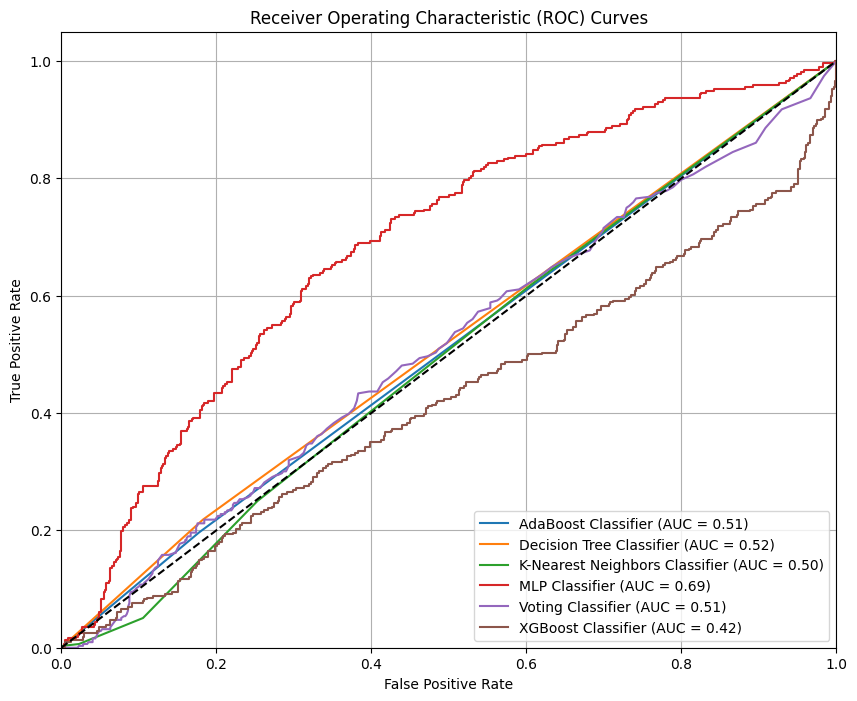

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=label_encoder.transform(['Dropout'])[0])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure X_test has the same features as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))

# AdaBoost Classifier
adaboost_clf.fit(X_train, y_train_encoded)
y_pred_proba_adaboost = adaboost_clf.predict_proba(X_test)
plot_roc_curve(y_test_encoded, y_pred_proba_adaboost, "AdaBoost Classifier")

# Decision Tree Classifier
dt_classifier.fit(X_train, y_train_encoded)
y_pred_proba_dt = dt_classifier.predict_proba(X_test)
plot_roc_curve(y_test_encoded, y_pred_proba_dt, "Decision Tree Classifier")

# K-Nearest Neighbors Classifier
knn_classifier.fit(X_train, y_train_encoded)
y_pred_proba_knn = knn_classifier.predict_proba(X_test)
plot_roc_curve(y_test_encoded, y_pred_proba_knn, "K-Nearest Neighbors Classifier")

# # Logistic Regression
# log_reg_pipeline.fit(X_train, y_train_encoded)
# y_pred_proba_log_reg = log_reg_pipeline.predict_proba(X_test)
# plot_roc_curve(y_test_encoded, y_pred_proba_log_reg, "Logistic Regression")

# MLP Classifier
mlp_classifier.fit(X_train, y_train_encoded)
y_pred_proba_mlp = mlp_classifier.predict_proba(X_test)
plot_roc_curve(y_test_encoded, y_pred_proba_mlp, "MLP Classifier")

# Voting Classifier with soft voting
voting_clf_soft = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42))
], voting='soft')

voting_clf_soft.fit(X_train, y_train_encoded)
y_pred_proba_voting = voting_clf_soft.predict_proba(X_test)
plot_roc_curve(y_test_encoded, y_pred_proba_voting, "Voting Classifier")

# XGBoost Classifier
xgb_classifier.fit(X_train, y_train_encoded)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)
plot_roc_curve(y_test_encoded, y_pred_proba_xgb, "XGBoost Classifier")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


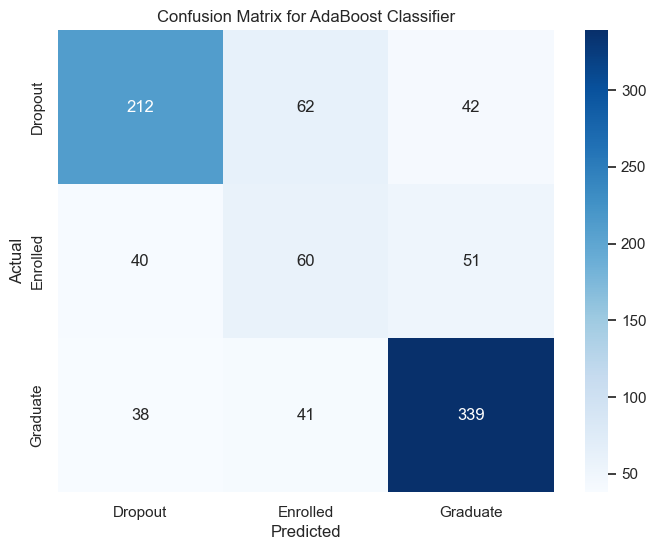

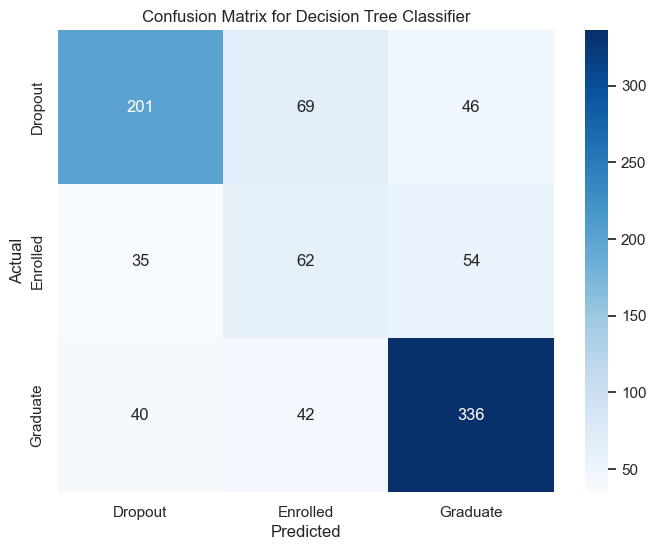

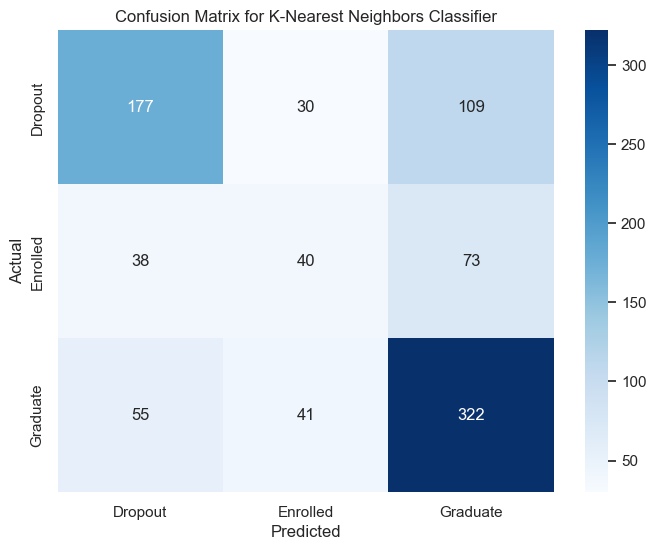

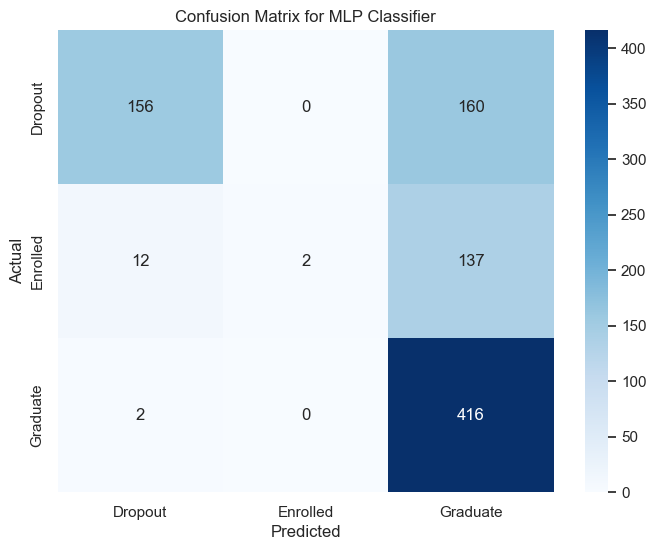

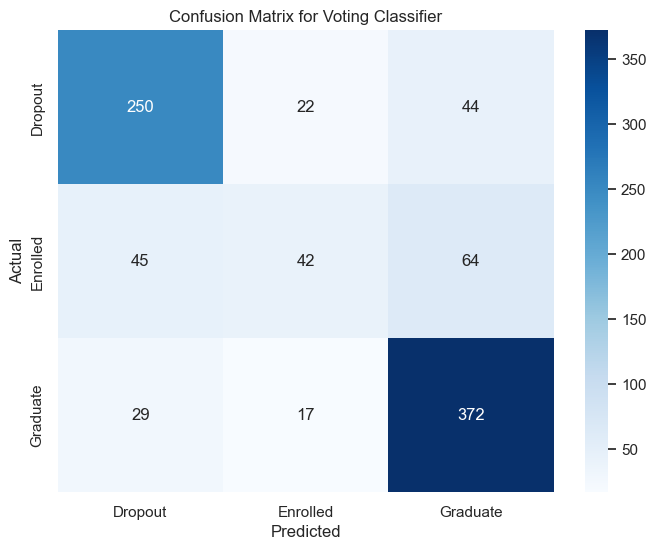

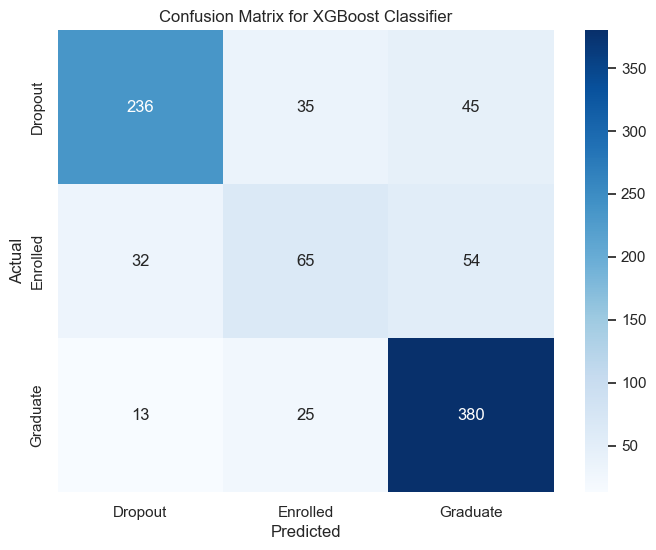

In [79]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Ensure y_test is encoded
y_test_encoded = label_encoder.transform(y_test)

# Make predictions for each model
y_pred_adaboost = adaboost_clf.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
# y_pred_log_reg = log_reg_pipeline.predict(X_test)
y_pred_mlp = mlp_classifier.predict(X_test)
y_pred_voting = voting_clf.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)

# Plot confusion matrices for each model
plot_confusion_matrix(y_test_encoded, y_pred_adaboost, "AdaBoost Classifier")
plot_confusion_matrix(y_test_encoded, y_pred_dt, "Decision Tree Classifier")
plot_confusion_matrix(y_test_encoded, y_pred_knn, "K-Nearest Neighbors Classifier")
# plot_confusion_matrix(y_test_encoded, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test_encoded, y_pred_mlp, "MLP Classifier")
plot_confusion_matrix(y_test_encoded, y_pred_voting, "Voting Classifier")
plot_confusion_matrix(y_test_encoded, y_pred_xgb, "XGBoost Classifier")

In [105]:
from scipy.stats import pearsonr, spearmanr

# Calculate Pearson correlation coefficient for KNN predictions
pearson_knn, _ = pearsonr(y_test_encoded, y_pred_knn)
print(f"Pearson correlation coefficient for KNN: {pearson_knn}")

# Calculate Spearman correlation coefficient for KNN predictions
spearman_knn, _ = spearmanr(y_test_encoded, y_pred_knn)
print(f"Spearman correlation coefficient for KNN: {spearman_knn}")

# Calculate Pearson correlation coefficient for MLP predictions
pearson_mlp, _ = pearsonr(y_test_encoded, y_pred_mlp)
print(f"Pearson correlation coefficient for MLP: {pearson_mlp}")

# Calculate Spearman correlation coefficient for MLP predictions
spearman_mlp, _ = spearmanr(y_test_encoded, y_pred_mlp)
print(f"Spearman correlation coefficient for MLP: {spearman_mlp}")

# Calculate Pearson correlation coefficient for Voting predictions
pearson_voting, _ = pearsonr(y_test_encoded, y_pred_voting)
print(f"Pearson correlation coefficient for Voting: {pearson_voting}")

# Calculate Spearman correlation coefficient for Voting predictions
spearman_voting, _ = spearmanr(y_test_encoded, y_pred_voting)
print(f"Spearman correlation coefficient for Voting: {spearman_voting}")

# Calculate Pearson correlation coefficient for XGB predictions
pearson_xgb, _ = pearsonr(y_test_encoded, y_pred_xgb)
print(f"Pearson correlation coefficient for XGB: {pearson_xgb}")

# Calculate Spearman correlation coefficient for XGB predictions
spearman_xgb, _ = spearmanr(y_test_encoded, y_pred_xgb)
print(f"Spearman correlation coefficient for XGB: {spearman_xgb}")

Pearson correlation coefficient for KNN: 0.4295091912807667
Spearman correlation coefficient for KNN: 0.42440436298677975
Pearson correlation coefficient for MLP: 0.5513049806468692
Spearman correlation coefficient for MLP: 0.5437735198838293
Pearson correlation coefficient for Voting: 0.7090844473181631
Spearman correlation coefficient for Voting: 0.7085200635718601
Pearson correlation coefficient for XGB: 0.7443746687599265
Spearman correlation coefficient for XGB: 0.7436068975225737


In [106]:
from scipy.stats import kendalltau

# Calculate Kendall's Tau correlation coefficient for KNN predictions
kendall_knn, _ = kendalltau(y_test_encoded, y_pred_knn)
print(f"Kendall's Tau correlation coefficient for KNN: {kendall_knn}")

# Calculate Kendall's Tau correlation coefficient for MLP predictions
kendall_mlp, _ = kendalltau(y_test_encoded, y_pred_mlp)
print(f"Kendall's Tau correlation coefficient for MLP: {kendall_mlp}")

# Calculate Kendall's Tau correlation coefficient for Voting predictions
kendall_voting, _ = kendalltau(y_test_encoded, y_pred_voting)
print(f"Kendall's Tau correlation coefficient for Voting: {kendall_voting}")

# Calculate Kendall's Tau correlation coefficient for XGB predictions
kendall_xgb, _ = kendalltau(y_test_encoded, y_pred_xgb)
print(f"Kendall's Tau correlation coefficient for XGB: {kendall_xgb}")

Kendall's Tau correlation coefficient for KNN: 0.395362437583864
Kendall's Tau correlation coefficient for MLP: 0.5182025833702228
Kendall's Tau correlation coefficient for Voting: 0.6687639030049346
Kendall's Tau correlation coefficient for XGB: 0.7027539958562851


# Feature Importance Analysis

                                 Feature  Importance
43                            IS_DROPOUT    0.201937
37                          Dropout_Flag    0.176840
41                         APPROVAL_RATE    0.121653
39                  TOTAL_UNITS_APPROVED    0.060843
30     CURRICULAR_UNITS_2ND_SEM_APPROVED    0.052776
24     CURRICULAR_UNITS_1ST_SEM_APPROVED    0.039718
25        CURRICULAR_UNITS_1ST_SEM_GRADE    0.036909
31        CURRICULAR_UNITS_2ND_SEM_GRADE    0.034624
29  CURRICULAR_UNITS_2ND_SEM_EVALUATIONS    0.020134
42                          GRADE_CHANGE    0.018353


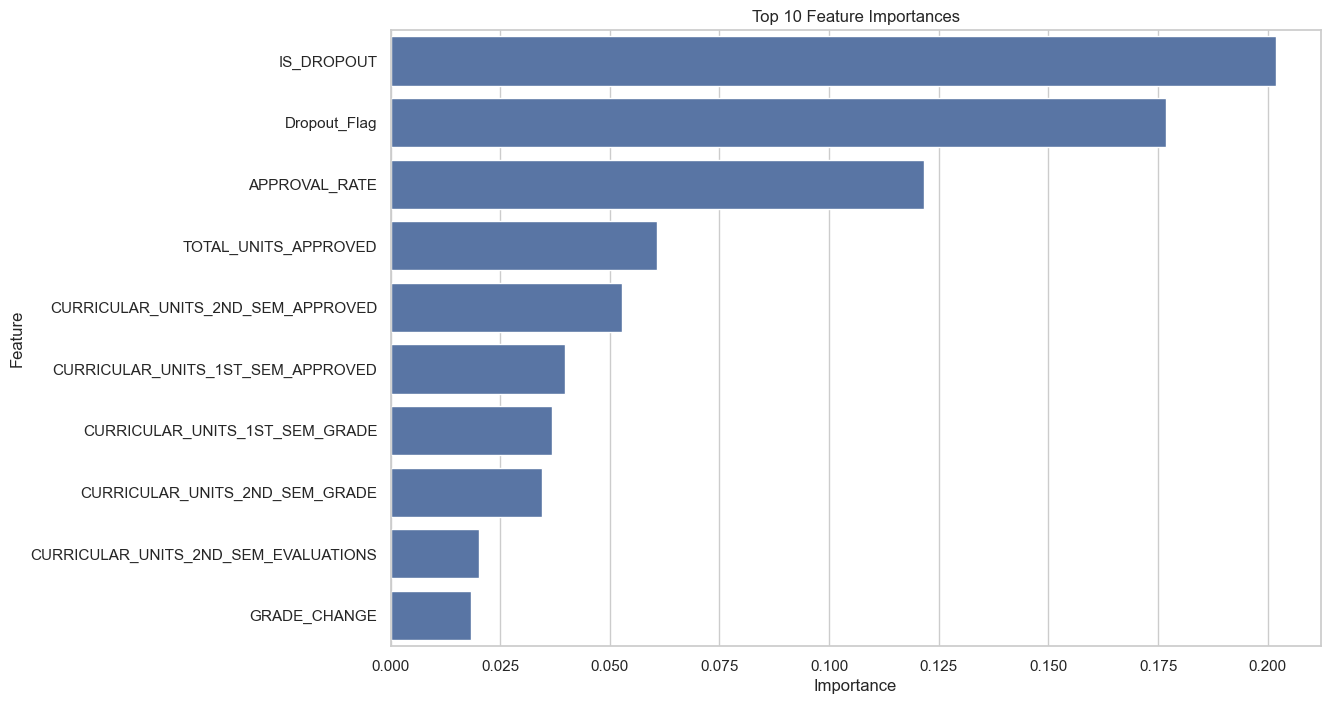

In [ ]:
# Get feature importances from the trained RandomForestClassifier
importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Feature ranking:
1. feature IS_DROPOUT (0.20193747237905416)
2. feature Dropout_Flag (0.17684022388021614)
3. feature APPROVAL_RATE (0.121653375719266)
4. feature TOTAL_UNITS_APPROVED (0.0608430076037775)
5. feature CURRICULAR_UNITS_2ND_SEM_APPROVED (0.052776244145816754)
6. feature CURRICULAR_UNITS_1ST_SEM_APPROVED (0.03971846577076902)
7. feature CURRICULAR_UNITS_1ST_SEM_GRADE (0.036909307448195934)
8. feature CURRICULAR_UNITS_2ND_SEM_GRADE (0.03462377088829436)
9. feature CURRICULAR_UNITS_2ND_SEM_EVALUATIONS (0.020134410578856034)
10. feature GRADE_CHANGE (0.018352816162205625)
11. feature CURRICULAR_UNITS_1ST_SEM_EVALUATIONS (0.016952533103117666)
12. feature ADMISSION_GRADE (0.01666563296082921)
13. feature TUITION_FEES_UP_TO_DATE (0.016167812134990307)
14. feature AGE_AT_ENROLLMENT (0.01592432513582145)
15. feature PREVIOUS_QUALIFICATION_GRADE (0.014271408197945432)
16. feature COURSE (0.013922461897835652)
17. feature FATHER_OCCUPATION (0.011583645488591978)
18. feature MOTHER_O

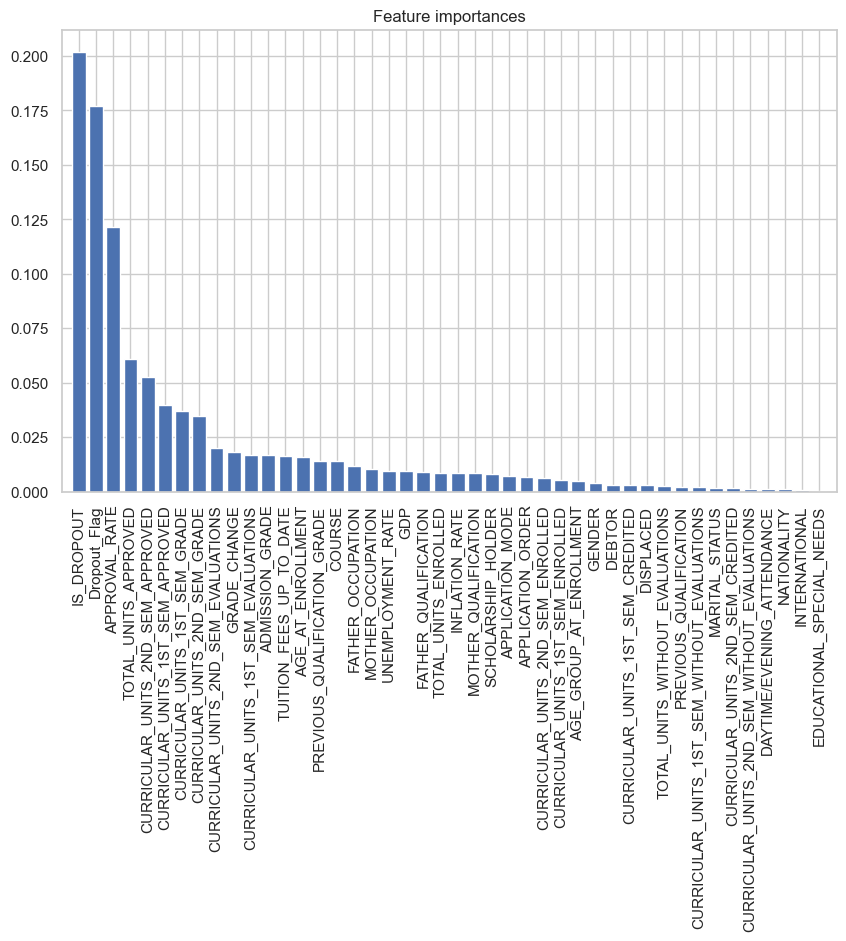

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_47888\1583071292.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(perm_importance.importances[perm_sorted_idx].T, vert=False, labels=X_train.columns[perm_sorted_idx])


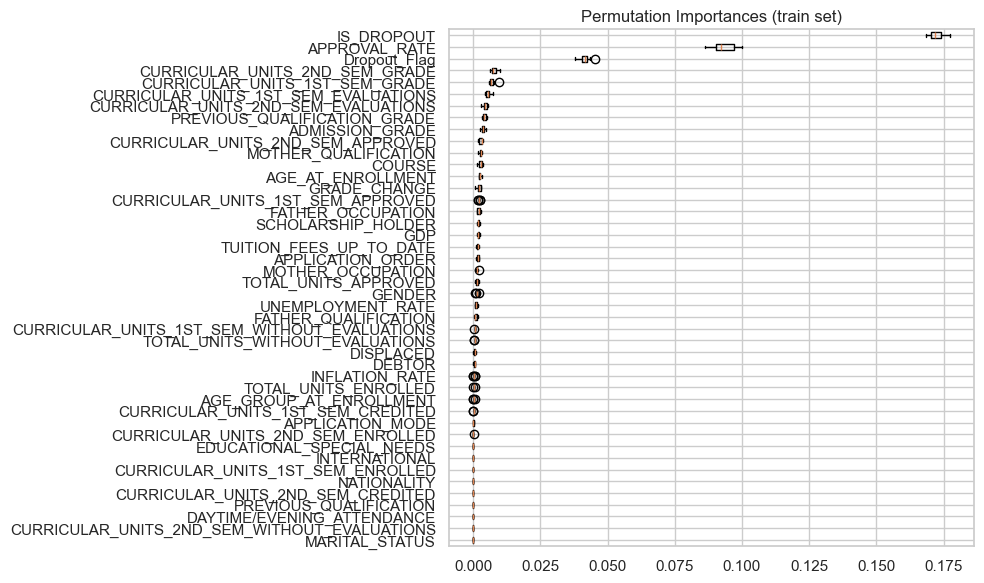

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import numpy as np

import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined and contain the training data

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get the built-in feature importances
feature_importances = rf_classifier.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({feature_importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Permutation importance
perm_importance = permutation_importance(rf_classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get the permutation importance scores
perm_sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation importances
plt.figure(figsize=(10, 6))
plt.boxplot(perm_importance.importances[perm_sorted_idx].T, vert=False, labels=X_train.columns[perm_sorted_idx])
plt.title("Permutation Importances (train set)")
plt.tight_layout()
plt.show()

                                   Feature  Importance
30     Curricular units 2nd sem (approved)    0.131092
31        Curricular units 2nd sem (grade)    0.111236
24     Curricular units 1st sem (approved)    0.097350
25        Curricular units 1st sem (grade)    0.063543
29  Curricular units 2nd sem (evaluations)    0.043673
16                 Tuition fees up to date    0.043162
12                         Admission grade    0.040832
6           Previous qualification (grade)    0.038131
23  Curricular units 1st sem (evaluations)    0.037368
19                       Age at enrollment    0.035585


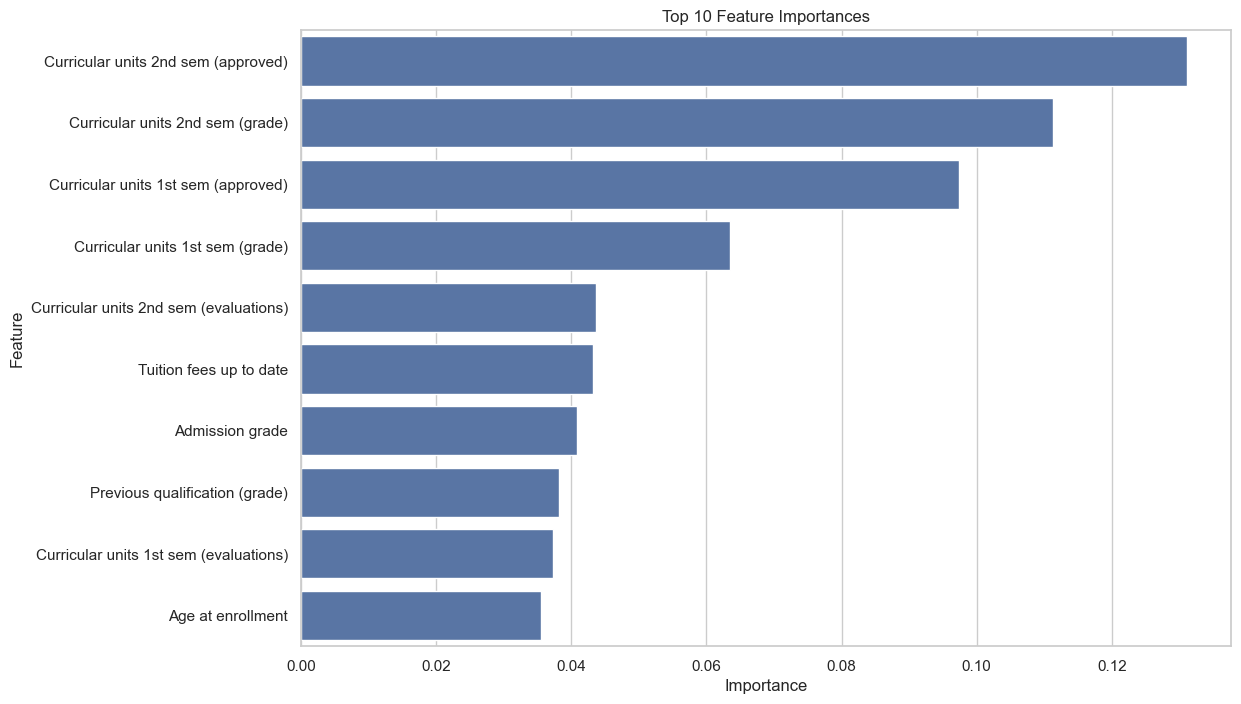

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained RandomForestClassifier
importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Statistical Significance Testing

Chi-Square Tests

In [84]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table using y_test and y_pred_knn
contingency_table = pd.crosstab(y_test, pd.Series(y_pred_knn, name='y_pred_knn'))

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-square Statistic: 5.062617698343505
p-value: 0.280932664031362
Degrees of Freedom: 4
Expected Frequencies:
[[18.37037037  8.         29.62962963]
 [12.13756614  5.28571429 19.57671958]
 [31.49206349 13.71428571 50.79365079]]


In [90]:
from scipy.stats import chi2_contingency

# List of categorical features
categorical_features = ['GENDER', 'COURSE']

# 'DAYTIME/EVENING_ATTENDANCE', 'AGE_GROUP_AT_ENROLLMENT'

# Function to perform Chi-Square test
def chi_square_test(data, feature, target):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Perform Chi-Square test for each categorical feature
for feature in categorical_features:
    chi2, p = chi_square_test(data, feature, 'TARGET')
    print(f"Feature: {feature}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}")
    print("-" * 50)

Feature: GENDER
Chi-Square Statistic: 233.26643249623856
P-value: 2.2224795668092454e-51
--------------------------------------------------
Feature: COURSE
Chi-Square Statistic: 558.2844739848134
P-value: 2.3165709040666167e-97
--------------------------------------------------


ANOVA

In [93]:
from scipy.stats import f_oneway

# Perform ANOVA test
anova_result = f_oneway(y_pred_knn, y_pred_mlp, y_pred_voting, y_pred_xgb)

print("ANOVA Result:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("There is a significant difference between the means of the predicted values from different models.")
else:
    print("There is no significant difference between the means of the predicted values from different models.")

ANOVA Result:
F-statistic: 45.14331922016543
P-value: 1.2701361192251252e-28
There is a significant difference between the means of the predicted values from different models.


Model Comparison

In [101]:
from statsmodels.stats.contingency_tables import mcnemar

# Create a contingency table
def create_contingency_table(y_true, y_pred1, y_pred2):
    table = [[0, 0], [0, 0]]
    for yt, yp1, yp2 in zip(y_true, y_pred1, y_pred2):
        if yp1 == yt and yp2 == yt:
            table[0][0] += 1  # Both classifiers are correct
        elif yp1 == yt and yp2 != yt:
            table[0][1] += 1  # Classifier 1 is correct, Classifier 2 is incorrect
        elif yp1 != yt and yp2 == yt:
            table[1][0] += 1  # Classifier 1 is incorrect, Classifier 2 is correct
        else:
            table[1][1] += 1  # Both classifiers are incorrect
    return table

# Create the contingency table for KNN and MLP classifiers
contingency_table_knn_mlp = create_contingency_table(y_test_encoded, y_pred_knn, y_pred_mlp)

# Perform McNemar's test
result = mcnemar(contingency_table_knn_mlp, exact=True)

print(f"McNemar's test statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

if result.pvalue < 0.05:
    print("There is a significant difference between the two classifiers.")
else:
    print("There is no significant difference between the two classifiers.")

McNemar's test statistic: 100.0
p-value: 0.02634971370824368
There is a significant difference between the two classifiers.
